In [1]:
import pandas as pd
import numpy as np

# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

# Make sure wide DataFrames don't wrap
pd.set_option("display.width", None)

# Show the full content of each column (no '...')
pd.set_option("display.max_colwidth", None)

# PREPROCESS

In [2]:
file_path = r"C:\Arun_MIX\DRGHistoricalReviewInformation_11182025.txt"

df_hist = pd.read_csv(file_path, sep='|', dtype=str, low_memory=False)

print(df_hist.info())
df_hist.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886092 entries, 0 to 886091
Columns: 282 entries, Payor to AdjustedSavings
dtypes: object(282)
memory usage: 1.9+ GB
None


,Payor,claimid,Client,Control_ID,Claim_Number,PaymentType,Group_Type,Payments,Tax_ID,Provider_ID,HospitalName,LOS,DISP_Code,ADRG,DischargeYear,DischargeMonth,AGE,A_CCCount,A_MCCCount,B_CCCount,B_MCCCount,LOB,MRREQ,MRREC,PRIM_DX,A_DX2,A_DX3,A_DX4,A_DX5,A_DX6,A_DX7,A_DX8,A_DX9,A_DX10,A_DX11,A_DX12,A_DX13,A_DX14,A_DX15,A_DX16,A_DX17,A_DX18,A_DX19,A_DX20,A_DX21,A_DX22,A_DX23,A_DX24,A_DX25,A_POA,A_POA2,A_POA3,A_POA4,A_POA5,A_POA6,A_POA7,A_POA8,A_POA9,A_POA10,A_POA11,A_POA12,A_POA13,A_POA14,A_POA15,A_POA16,A_POA17,A_POA18,A_POA19,A_POA20,A_POA21,A_POA22,A_POA23,A_POA24,A_POA25,A_PX1,A_PX2,A_PX3,A_PX4,A_PX5,A_PX6,A_PX7,A_PX8,A_PX9,A_PX10,A_PX11,A_PX12,A_PX13,A_PX14,A_PX15,A_PX16,A_PX17,A_PX18,A_PX19,A_PX20,A_PX21,A_PX22,A_PX23,A_PX24,A_PX25,B_DISPCode,B_DenialCode,B_DRG,B_PRIMDX,B_DX2,B_DX3,B_DX4,B_DX5,B_DX6,B_DX7,B_DX8,B_DX9,B_DX10,B_DX11,B_DX12,B_DX13,B_DX14,B_DX15,B_DX16,B_DX17,B_DX18,B_DX19,B_DX20,B_DX21,B_DX22,B_DX23,B_DX24,B_DX25,B_POA,B_POA2,B_POA3,B_POA4,B_POA5,B_POA6,B_POA7,B_POA8,B_POA9,B_POA10,B_POA11,B_POA12,B_POA13,B_POA14,B_POA15,B_POA16,B_POA17,B_POA18,B_POA19,B_POA20,B_POA21,B_POA22,B_POA23,B_POA24,B_POA25,B_PX1,B_PX2,B_PX3,B_PX4,B_PX5,B_PX6,B_PX7,B_PX8,B_PX9,B_PX10,B_PX11,B_PX12,B_PX13,B_PX14,B_PX15,B_PX16,B_PX17,B_PX18,B_PX19,B_PX20,B_PX21,B_PX22,B_PX23,B_PX24,B_PX25,A_PRIMDX_Desc,A_DX2_Desc,A_DX3_Desc,A_DX4_Desc,A_DX5_Desc,A_DX6_Desc,A_DX7_Desc,A_DX8_Desc,A_DX9_Desc,A_DX10_Desc,A_DX11_Desc,A_DX12_Desc,A_DX13_Desc,A_DX14_Desc,A_DX15_Desc,A_DX16_Desc,A_DX17_Desc,A_DX18_Desc,A_DX19_Desc,A_DX20_Desc,A_DX21_Desc,A_DX22_Desc,A_DX23_Desc,A_DX24_Desc,A_DX25_Desc,A_PX1_Desc,A_PX2_Desc,A_PX3_Desc,A_PX4_Desc,A_PX5_Desc,A_PX6_Desc,A_PX7_Desc,A_PX8_Desc,A_PX9_Desc,A_PX10_Desc,A_PX11_Desc,A_PX12_Desc,A_PX13_Desc,A_PX14_Desc,A_PX15_Desc,A_PX16_Desc,A_PX17_Desc,A_PX18_Desc,A_PX19_Desc,A_PX20_Desc,A_PX21_Desc,A_PX22_Desc,A_PX23_Desc,A_PX24_Desc,A_PX25_Desc,B_PRIMDX_Desc,B_DX2_Desc,B_DX3_Desc,B_DX4_Desc,B_DX5_Desc,B_DX6_Desc,B_DX7_Desc,B_DX8_Desc,B_DX9_Desc,B_DX10_Desc,B_DX11_Desc,B_DX12_Desc,B_DX13_Desc,B_DX14_Desc,B_DX15_Desc,B_DX16_Desc,B_DX17_Desc,B_DX18_Desc,B_DX19_Desc,B_DX20_Desc,B_DX21_Desc,B_DX22_Desc,B_DX23_Desc,B_DX24_Desc,B_DX25_Desc,B_PX1_Desc,B_PX2_Desc,B_PX3_Desc,B_PX4_Desc,B_PX5_Desc,B_PX6_Desc,B_PX7_Desc,B_PX8_Desc,B_PX9_Desc,B_PX10_Desc,B_PX11_Desc,B_PX12_Desc,B_PX13_Desc,B_PX14_Desc,B_PX15_Desc,B_PX16_Desc,B_PX17_Desc,B_PX18_Desc,B_PX19_Desc,B_PX20_Desc,B_PX21_Desc,B_PX22_Desc,B_PX23_Desc,B_PX24_Desc,B_PX25_Desc,InitialDeterminationDate,InitialDenialType,InitialDeterminationStatus,IDSavings,AdjustedSavings
0,UHC CSP,758656,NY,EXPR101623-340919,23N652771000,PrePay,01,15948.41,141340054,000334584002,ST LUKES CORNWALL HOSPITAL,9,02-TRNSF ACUTE CARE FAC,432,2023,9,69,2,2,2,2,NYCARE,2023-10-17 16:38:04.687000000,2023-11-08 00:00:00,K7030,I8511 - MCC,N170 - MCC,K766 - CC,D62 - CC,E119,K7682,F1010,I10,E039,Z794,K3189,E785,Z20822,Z87891,Z7984,Z751,Z741,Z7409,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,,Y,Y,Y,,,,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,30233N1,06L38CZ,06L38CZ,0BH17EZ,5A1945Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02-TRNSF ACUTE CARE FAC,NaN,432,K7030,I8511 - MCC,N170 - MCC,K766 - CC,D62 - CC,E119,K7682,F1010,I10,E039,Z794,K3189,E785,Z20822,Z87891,Z7984,Z751,Z741,Z7409,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,NaN,Y,Y,Y,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,30233N1,06L38CZ,06L38CZ,0BH17EZ,5A1945Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alcoholic cirrhosis of liver without ascites,Secondary esophageal varices with bleeding,Acute kidney failure with tubular necrosis,Portal hypertension,Acute posthemorrhagic anemia,Type 2 diabetes mellitus without complications,Hepatic encephalopathy,"Alcohol abuse, uncomplicated",Essential (primary) hypertension,"Hypothyroidism, unspecified",Long term (current) use of insulin,Other diseases of stomach and duodenum,"Hyperlipidemia, unspecified",Contact with and (suspected) exposure to COVID-19,Personal his

In [3]:
df1 = df_hist.copy()

df1['PaymentType'] = df1['PaymentType'].str.strip().str.lower()

print(df1['InitialDenialType'].value_counts())

df1 = df1[(df1["InitialDeterminationStatus"].isin(["Approved", "Denied"])) & (df1["InitialDenialType"] == "Substantive")]

cols_to_drop = [
    'claimid', 'Control_ID', 'Claim_Number', 'Tax_ID',
    'DISP_Code', 'DischargeYear', 'DischargeMonth',
    'MRREQ', 'MRREC', 
    'InitialDeterminationDate', 'InitialDenialType',
    
]

df1 = df1.drop(columns=cols_to_drop, errors='ignore')


adx_cols = [f"A_DX{i}" for i in range(2, 26)]
apx_cols = [f"A_PX{i}" for i in range(1, 26)]
bdx_cols = [f"B_DX{i}" for i in range(2, 26)]
bpx_cols = [f"B_PX{i}" for i in range(1, 26)]

df1["A_DX_List"] = df1[adx_cols].values.tolist()
df1["A_PX_List"] = df1[apx_cols].values.tolist()
df1["B_DX_List"] = df1[bdx_cols].values.tolist()
df1["B_PX_List"] = df1[bpx_cols].values.tolist()


df1["A_DX_List"] = df1["A_DX_List"].apply(lambda x: sorted([i for i in x if pd.notna(i)]))
df1["A_PX_List"] = df1["A_PX_List"].apply(lambda x: sorted([i for i in x if pd.notna(i)]))
df1["B_DX_List"] = df1["B_DX_List"].apply(lambda x: sorted([i for i in x if pd.notna(i)]))
df1["B_PX_List"] = df1["B_PX_List"].apply(lambda x: sorted([i for i in x if pd.notna(i)]))


columns_to_keep = [
    "Payor", "Client", "PaymentType", "Group_Type", "Payments",
    "Provider_ID", "HospitalName", "LOS", "ADRG", "AGE", "LOB",
    "PRIM_DX", "B_DRG", "B_PRIMDX",
    "InitialDeterminationStatus", "IDSavings", "AdjustedSavings",
    "A_DX_List", "A_PX_List", "B_DX_List", "B_PX_List"
]

df2 = df1[columns_to_keep]

def clean_sdx_list(lst):
    cleaned = []
    for item in lst:
        item = str(item).upper().strip()               # normalize
        item = item.replace("- MCC", "")               # remove MCC
        item = item.replace("- CC", "")                # remove CC
        item = item.replace("MCC", "")                 # safety
        item = item.replace("CC", "")                  # safety
        cleaned.append(item.strip().replace("-", ""))  # final cleanup
    return cleaned
df2["A_DX_List_Clean"] = df2["A_DX_List"].apply(clean_sdx_list)
df2["B_DX_List_Clean"] = df2["B_DX_List"].apply(clean_sdx_list)


def clean_dx_code(x):
    if pd.isna(x):
        return ""
    
    # Convert to string and normalize
    x = str(x).upper().strip()
    
    # Remove square brackets if any
    x = x.replace("[", "").replace("]", "")
    
    # Remove MCC / CC suffixes
    x = x.replace("- MCC", "").replace("- CC", "")
    x = x.replace("MCC", "").replace("CC", "")
    
    # Remove leftover hyphens
    x = x.replace("-", "")
    
    return x
df2["B_PRIMDX_Clean"] = df2["B_PRIMDX"].apply(clean_dx_code)

# ---------------------------------------------------------
# Step 1: Load MCC/CC Mapping File
# ---------------------------------------------------------
mccandcclist_df = pd.read_excel(r"C:\Arun_MIX\MCCCCList.xlsx")
mccandcclist_df['ICDCode'] = (
    mccandcclist_df['ICDCode']
    .astype(str)
    .str.strip()
    .str.upper()
)
mccandcclist = dict(zip(mccandcclist_df['ICDCode'], mccandcclist_df['MCCorCC']))
print(f"✅ Loaded MCC/CC list with {len(mccandcclist)} entries.")
mccandcclist_df.head()


def map_sdx_types(icd_list, lookup_dict):
    cleaned_list = []
    for code in icd_list:
        code_clean = str(code).strip().upper()  # normalize

        tag = lookup_dict.get(code_clean, "")  # MCC / CC / General
        cleaned_list.append(f"{code_clean} - {tag}")

    return cleaned_list

df2['A_DX_Type_list'] = df2['A_DX_List_Clean'].apply(lambda x: map_sdx_types(x, mccandcclist))
df2['B_DX_Type_list'] = df2['B_DX_List_Clean'].apply(lambda x: map_sdx_types(x, mccandcclist))


def extract_sdx_info(sdx_list):
    # Separate entries by type
    mcc = [x.split(" - ")[0] for x in sdx_list if "- MCC" in x]
    cc  = [x.split(" - ")[0] for x in sdx_list if "- CC" in x]
    #general  = [x.split(" - ")[0] for x in sdx_list if "- General" in x]
    other = [x.split(" - ")[0] for x in sdx_list if "- MCC" not in x and "- CC" not in x  ]

    # Determine SDX_Type and SDX_Set
    if mcc:
        return "MCC", mcc
    elif cc:
        return "CC", cc
    #elif general:
       # return "General", general
    
    else:
        return "General", other
    
# Apply the logic
df2[["A_DX_Type", "A_DX_Set"]] = df2["A_DX_Type_list"].apply(lambda x: pd.Series(extract_sdx_info(x)))

df2[["B_DX_Type", "B_DX_Set"]] = df2["B_DX_Type_list"].apply(lambda x: pd.Series(extract_sdx_info(x)))

# condition: SDX_Set empty AND SDX_Type == "General"
mask = (df2['A_DX_Set'].apply(lambda x: len(x) == 0)) & (df2['A_DX_Type'] == 'General')
mask = (df2['B_DX_Set'].apply(lambda x: len(x) == 0)) & (df2['B_DX_Type'] == 'General')
# update SDX_Type
df2.loc[mask, 'A_DX_Type'] = 'No A_DX'
df2.loc[mask, 'B_DX_Type'] = 'No B_DX'

df2["A_PX_count"]  = df2["A_PX_List"].apply(lambda x: len([i for i in x if pd.notna(i)]))
df2["B_PX_count"]  = df2["B_PX_List"].apply(lambda x: len([i for i in x if pd.notna(i)]))

df2["A_DX_Count"] = df2["A_DX_Set"].apply(lambda x: len([i for i in x if pd.notna(i)]))
df2["B_DX_Count"] = df2["B_DX_Set"].apply(lambda x: len([i for i in x if pd.notna(i)]))

cols_to_drop = [
    "A_DX_List", "B_DX_List",
    "A_DX_List_Clean", "B_DX_List_Clean",
    "A_DX_Type_list", "B_DX_Type_list"
]

df2 = df2.drop(columns=cols_to_drop, errors='ignore')

def compare_dx_sets(a, b):
    # Convert to string so list formatting does not matter
    a_str = str(a).strip()
    b_str = str(b).strip()

    if a_str == b_str:
        return "No Change"   # Or np.nan if you want blank
    else:
        return f"Change {a_str} → {b_str}"

df2["DX_Change_Status"] = df2.apply(lambda row: compare_dx_sets(row["PRIM_DX"], row["B_PRIMDX_Clean"]),axis=1)

df2 = df2.replace("No B_DX", "No A_DX")

df2["DX_Type_Status"] = df2.apply(lambda row: compare_dx_sets(row["A_DX_Type"], row["B_DX_Type"]),axis=1)

df2["DRG_Status"] = df2.apply(
    lambda row: compare_dx_sets(row["ADRG"], row["B_DRG"]),
    axis=1
)


def compare_dx_lists(a, b):
    # Handle None or NaN
    if a is None or (isinstance(a, float) and np.isnan(a)):
        a = []
    if b is None or (isinstance(b, float) and np.isnan(b)):
        b = []
    
    # Make sure both are lists
    if not isinstance(a, list):
        a = [a]
    if not isinstance(b, list):
        b = [b]
    
    # Normalize codes
    a_clean = [str(code).upper().strip() for code in a]
    b_clean = [str(code).upper().strip() for code in b]
    
    # Compare as sets (order-insensitive)
    if set(a_clean) == set(b_clean):
        return "No Change"
    else:
        return f"Change {a_clean} → {b_clean}"


# Apply to dataframe
df2["DX_Set_Change_Status"] = df2.apply(
    lambda row: compare_dx_lists(row["A_DX_Set"], row["B_DX_Set"]),
    axis=1
)

# Apply to dataframe
df2["PX_Set_Change_Status"] = df2.apply(
    lambda row: compare_dx_lists(row["A_PX_List"], row["B_PX_List"]),
    axis=1
)

# Ensure numeric
df2['Payments'] = pd.to_numeric(df2['Payments'], errors='coerce')
df2['IDSavings'] = pd.to_numeric(df2['IDSavings'], errors='coerce')
cols_to_drop = [
    'Payor', 'Group_Type', 'B_PRIMDX', 'A_PX_List',
    'B_PX_List', 'A_PX_count', 'B_PX_count',
    'PX_Set_Change_Status','LOB',
    
]

df_3 = df2.drop(columns=cols_to_drop, errors='ignore')
print(df_3.info())
df_3.head()


InitialDenialType
Substantive    772104
Assumptive     110464
Technical        3524
Name: count, dtype: int64


C:\Users\arunkumara\AppData\Local\Temp\4\ipykernel_28660\1435923538.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["A_DX_List_Clean"] = df2["A_DX_List"].apply(clean_sdx_list)
C:\Users\arunkumara\AppData\Local\Temp\4\ipykernel_28660\1435923538.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["B_DX_List_Clean"] = df2["B_DX_List"].apply(clean_sdx_list)
C:\Users\arunkumara\AppData\Local\Temp\4\ipykernel_28660\1435923538.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

✅ Loaded MCC/CC list with 17913 entries.


C:\Users\arunkumara\AppData\Local\Temp\4\ipykernel_28660\1435923538.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['A_DX_Type_list'] = df2['A_DX_List_Clean'].apply(lambda x: map_sdx_types(x, mccandcclist))
C:\Users\arunkumara\AppData\Local\Temp\4\ipykernel_28660\1435923538.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['B_DX_Type_list'] = df2['B_DX_List_Clean'].apply(lambda x: map_sdx_types(x, mccandcclist))
C:\Users\arunkumara\AppData\Local\Temp\4\ipykernel_28660\1435923538.py:129: Se

<class 'pandas.core.frame.DataFrame'>
Index: 772104 entries, 0 to 886091
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client                      772104 non-null  object 
 1   PaymentType                 772104 non-null  object 
 2   Payments                    772104 non-null  float64
 3   Provider_ID                 772104 non-null  object 
 4   HospitalName                772104 non-null  object 
 5   LOS                         772103 non-null  object 
 6   ADRG                        772104 non-null  object 
 7   AGE                         772103 non-null  object 
 8   PRIM_DX                     772090 non-null  object 
 9   B_DRG                       769709 non-null  object 
 10  InitialDeterminationStatus  772104 non-null  object 
 11  IDSavings                   772104 non-null  float64
 12  AdjustedSavings             772104 non-null  object 
 13  B_PRIMDX_Clean     

,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status
0,NY,prepay,15948.41,000334584002,ST LUKES CORNWALL HOSPITAL,9,432,69,K7030,432,Approved,0.00,0,K7030,MCC,"[I8511, N170]",MCC,"[I8511, N170]",2,2,No Change,No Change,No Change,No Change
1,NY,prepay,10477.92,000258115003,ST PETERS HOSPITAL,5,919,62,T85698A,919,Approved,0.00,0,T85698A,MCC,"[A419, J869]",MCC,"[A419, J869]",2,2,No Change,No Change,No Change,No Change
2,NY,prepay,11532.33,000657681001,KENMORE MERCY HOSPITAL,3,871,77,A419,194,Denied,4440.18,5940.3100000000004,J159,MCC,"[G9341, J159, R6520]",CC,"[I130, I429, I4811, I5042, J440, J9611, L97222]",3,7,Change A419 → J159,Change MCC → CC,Change 871 → 194,"Change ['G9341', 'J159', 'R6520'] → ['I130', 'I429', 'I4811', 'I5042', 'J440', 'J9611', 'L97222']"
3,IA,postpay,12227.79,000023698002,ALLEN HOSPITAL,2,854,60,A419,660,Denied,3065.19,2733.5700000000002,N136,CC,"[N136, N179, Z6843]",CC,"[N179, Z6843]",3,2,Change A419 → N136,No Change,Change 854 → 660,"Change ['N136', 'N179', 'Z6843'] → ['N179', 'Z6843']"
4,IA,postpay,10804.16,000023698002,ALLEN HOSPITAL,5,871,70,A419,871,Approved,0.00,0,A419,MCC,"[D61810, G9341, R6520]",MCC,"[D61810, G9341, R6520]",3,3,No Change,No Change,No Change,No Change


# Client = Hum

In [11]:
df_hum = df_3[df_3['Client']=='Hum']

# Define condition
cond = (
    (df_hum["DX_Change_Status"] == "No Change") &
    (df_hum["DX_Type_Status"] == "No Change") &
    (df_hum["DX_Set_Change_Status"] == "No Change") &
    (df_hum["DRG_Status"] == "No Change") &
    (df_hum["InitialDeterminationStatus"] == "Denied")
)

# Remove those rows
df_hum = df_hum[~cond].copy()

df_hum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64922 entries, 1719 to 886078
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      64922 non-null  object 
 1   PaymentType                 64922 non-null  object 
 2   Payments                    64922 non-null  float64
 3   Provider_ID                 64922 non-null  object 
 4   HospitalName                64922 non-null  object 
 5   LOS                         64922 non-null  object 
 6   ADRG                        64922 non-null  object 
 7   AGE                         64922 non-null  object 
 8   PRIM_DX                     64922 non-null  object 
 9   B_DRG                       64703 non-null  object 
 10  InitialDeterminationStatus  64922 non-null  object 
 11  IDSavings                   64922 non-null  float64
 12  AdjustedSavings             64922 non-null  object 
 13  B_PRIMDX_Clean              6492

# EDA

### No Change Happened among PrimDX,SDX Set,SDX Type,DRG

In [5]:
cols = ["DX_Change_Status", "DX_Type_Status", "DX_Set_Change_Status","DRG_Status"]

# Keep rows where all columns are "No Change"
df3 = df_hum[(df_hum[cols] == "No Change").all(axis=1)].copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55903 entries, 1719 to 886078
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      55903 non-null  object 
 1   PaymentType                 55903 non-null  object 
 2   Payments                    55903 non-null  float64
 3   Provider_ID                 55903 non-null  object 
 4   HospitalName                55903 non-null  object 
 5   LOS                         55903 non-null  object 
 6   ADRG                        55903 non-null  object 
 7   AGE                         55903 non-null  object 
 8   PRIM_DX                     55903 non-null  object 
 9   B_DRG                       55903 non-null  object 
 10  InitialDeterminationStatus  55903 non-null  object 
 11  IDSavings                   55903 non-null  float64
 12  AdjustedSavings             55903 non-null  object 
 13  B_PRIMDX_Clean              5590

In [9]:
df3['InitialDeterminationStatus'].value_counts()

InitialDeterminationStatus
Approved    55901
Denied          2
Name: count, dtype: int64

In No change rows among the 4 column ,from the analysis 2 denied 

In [10]:
df3[df3['InitialDeterminationStatus']=='Denied'].head()

,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status
711970,Hum,postpay,44885.35,272844767,HARPER UNIVERSITY HOSPITAL,18,235,69,I214,235,Denied,20522.82,0,I214,MCC,"[I5033, J9601]",MCC,"[I5033, J9601]",2,2,No Change,No Change,No Change,No Change
789069,Hum,prepay,9353.15,753175630A,UT SOUTHWESTERN UNIVERSITY,3,689,66,N390,689,Denied,3863.98,0,N390,MCC,[N186],MCC,[N186],1,1,No Change,No Change,No Change,No Change


### Approved

In [ ]:
#df3 = df3[df3['InitialDeterminationStatus']=='Approved']
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55901 entries, 1719 to 886078
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      55901 non-null  object 
 1   PaymentType                 55901 non-null  object 
 2   Payments                    55901 non-null  float64
 3   Provider_ID                 55901 non-null  object 
 4   HospitalName                55901 non-null  object 
 5   LOS                         55901 non-null  object 
 6   ADRG                        55901 non-null  object 
 7   AGE                         55901 non-null  object 
 8   PRIM_DX                     55901 non-null  object 
 9   B_DRG                       55901 non-null  object 
 10  InitialDeterminationStatus  55901 non-null  object 
 11  IDSavings                   55901 non-null  float64
 12  AdjustedSavings             55901 non-null  object 
 13  B_PRIMDX_Clean              5590

In [44]:
df4 = df3.copy()

# Helper columns
df4['is_approved'] = df4['InitialDeterminationStatus'] == 'Approved'
df4['is_denied'] = df4['InitialDeterminationStatus'] == 'Denied'

In [45]:
df4['combined_column'] = df4[['ADRG','PRIM_DX', 'A_DX_Set','A_DX_Type']].astype(str).agg('|'.join, axis=1)


# Compute value counts
counts = df4['combined_column'].value_counts()

# Map counts back to the DataFrame
df4['combined_count'] = df4['combined_column'].map(counts)
df4.head()

,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status,is_approved,is_denied,combined_column,combined_count
1719,Hum,postpay,4277.47,593458145N,TAMPA GENERAL HOSPITAL,6,8613,60,G893,8613,Approved,0.0,0,G893,MCC,[A419],MCC,[A419],1,1,No Change,No Change,No Change,No Change,True,False,8613|G893|['A419']|MCC,1
1720,Hum,postpay,9642.73,592616017M,UNIV OF MIAMI HOSP AND CLINICS,8,6953,40,Z5111,6953,Approved,0.0,0,Z5111,MCC,[D61810],MCC,[D61810],1,1,No Change,No Change,No Change,No Change,True,False,6953|Z5111|['D61810']|MCC,4
1721,Hum,postpay,7815.43,000045770H,NOVANT HEALTH PRESBYTERIAN MED,9,189,76,J9601,189,Approved,0.0,0,J9601,MCC,"[E1110, I2609, I5023, J9602]",MCC,"[E1110, I2609, I5023, J9602]",4,4,No Change,No Change,No Change,No Change,True,False,"189|J9601|['E1110', 'I2609', 'I5023', 'J9602']|MCC",1
1722,Hum,postpay,15539.61,001825011C,SPARTANBURG REGIONAL MEDICAL C,16,539,63,M4626,539,Approved,0.0,0,M4626,MCC,"[G061, K6812]",MCC,"[G061, K6812]",2,2,No Change,No Change,No Change,No Change,True,False,"539|M4626|['G061', 'K6812']|MCC",1
1723,Hum,postpay,9020.75,381428164,MCLAREN OAKLAND,7,682,79,I120,682,Approved,0.0,0,I120,MCC,[N186],MCC,[N186],1,1,No Change,No Change,No Change,No Change,True,False,682|I120|['N186']|MCC,19


In [46]:
com_claim_cout = (
    df4.groupby(["combined_column"])
       .agg(
           total_claim=("InitialDeterminationStatus", "count"),
           approved_claim=("is_approved", "sum"),
           denied_claim=("is_denied", "sum")
       )
       .sort_values("total_claim", ascending=False)
)

df4 = df4.merge(
    com_claim_cout,
    on="combined_column",
    how="left"
)

df4.head()


,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status,is_approved,is_denied,combined_column,combined_count,total_claim,approved_claim,denied_claim
0,Hum,postpay,4277.47,593458145N,TAMPA GENERAL HOSPITAL,6,8613,60,G893,8613,Approved,0.0,0,G893,MCC,[A419],MCC,[A419],1,1,No Change,No Change,No Change,No Change,True,False,8613|G893|['A419']|MCC,1,1,1,0
1,Hum,postpay,9642.73,592616017M,UNIV OF MIAMI HOSP AND CLINICS,8,6953,40,Z5111,6953,Approved,0.0,0,Z5111,MCC,[D61810],MCC,[D61810],1,1,No Change,No Change,No Change,No Change,True,False,6953|Z5111|['D61810']|MCC,4,4,4,0
2,Hum,postpay,7815.43,000045770H,NOVANT HEALTH PRESBYTERIAN MED,9,189,76,J9601,189,Approved,0.0,0,J9601,MCC,"[E1110, I2609, I5023, J9602]",MCC,"[E1110, I2609, I5023, J9602]",4,4,No Change,No Change,No Change,No Change,True,False,"189|J9601|['E1110', 'I2609', 'I5023', 'J9602']|MCC",1,1,1,0
3,Hum,postpay,15539.61,001825011C,SPARTANBURG REGIONAL MEDICAL C,16,539,63,M4626,539,Approved,0.0,0,M4626,MCC,"[G061, K6812]",MCC,"[G061, K6812]",2,2,No Change,No Change,No Change,No Change,True,False,"539|M4626|['G061', 'K6812']|MCC",1,1,1,0
4,Hum,postpay,9020.75,381428164,MCLAREN OAKLAND,7,682,79,I120,682,Approved,0.0,0,I120,MCC,[N186],MCC,[N186],1,1,No Change,No Change,No Change,No Change,True,False,682|I120|['N186']|MCC,19,19,19,0


In [47]:
com_claim_cout.head()

,total_claim,approved_claim,denied_claim
combined_column,,,
"190|J441|['J9621', 'J9622']|MCC",350,350,0
189|J9621|['J9622']|MCC,318,318,0
291|I130|['I5033']|MCC,171,171,0
193|J189|['N186']|MCC,166,166,0
191|J441|['J9611']|CC,131,131,0


### Total claim group by combined columns ==1

In [156]:
ddf = df4[df4['total_claim']==1].copy()
ddf['InitialDeterminationStatus'].value_counts()

InitialDeterminationStatus
Approved    36169
Denied          1
Name: count, dtype: int64

In [55]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36170 entries, 0 to 55902
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      36170 non-null  object 
 1   PaymentType                 36170 non-null  object 
 2   Payments                    36170 non-null  float64
 3   Provider_ID                 36170 non-null  object 
 4   HospitalName                36170 non-null  object 
 5   LOS                         36170 non-null  object 
 6   ADRG                        36170 non-null  object 
 7   AGE                         36170 non-null  object 
 8   PRIM_DX                     36170 non-null  object 
 9   B_DRG                       36170 non-null  object 
 10  InitialDeterminationStatus  36170 non-null  object 
 11  IDSavings                   36170 non-null  float64
 12  AdjustedSavings             36170 non-null  object 
 13  B_PRIMDX_Clean              36170 no

In [60]:
ddf['A_DX_Type'].value_counts()

A_DX_Type
MCC        22742
CC         11698
General     1550
No A_DX      180
Name: count, dtype: int64

In [59]:
ddf['PRIM_DX'].value_counts()

PRIM_DX
N179       2269
A419       1424
J441        550
J189        528
I214        522
J9621       414
J9601       410
K56609      391
I130        363
I110        311
R0789       311
A4151       306
E222        296
K56600      278
I480        224
N390        215
N170        214
G9341       212
T83511A     207
I639        205
K5650       190
I63512      179
R079        178
I2699       176
I350        175
T80211A     160
I4891       159
E1110       158
K7031       157
A4189       153
A4159       151
U071        147
I2510       140
E1169       138
S72142A     135
I63412      134
T83518A     133
E11649      133
I63511      132
I442        132
S72141A     131
K922        128
I495        127
K7460       126
K5651       126
J159        124
C182        124
S065XAA     124
G928        121
K921        119
I2609       119
I6521       118
E1152       113
I25110      113
N136        111
I6389       110
K254        110
E871        110
I63411      109
I674        108
I6523       108
S065X0A     106


In [62]:
ddf['A_DX_Set'].value_counts().head(15)

A_DX_Set
[N186]            372
[]                180
[J189, J9601]     160
[E43]             149
[J690, J9601]     117
[E43, G9341]      114
[U071]             99
[I5033, J9601]     98
[J9601]            96
[J9601, N186]      96
[G9341, N186]      96
[G9341]            95
[D62]              94
[J189]             91
[E43, N186]        84
Name: count, dtype: int64

In [57]:
ddf['ADRG'].value_counts()

ADRG
683     2101
871     1773
064     1063
189      950
377      836
193      801
389      755
330      692
308      596
637      587
698      542
917      504
480      463
391      453
190      451
853      445
313      435
280      418
682      379
432      373
175      371
329      342
689      315
023      310
071      305
194      297
314      293
393      292
644      282
191      275
640      263
291      254
270      239
242      238
100      229
809      225
388      223
266      221
441      214
286      206
235      195
199      195
872      193
896      189
082      187
862      184
602      183
177      182
038      173
811      171
281      170
919      170
641      168
438      166
178      164
435      162
467      160
417      155
378      155
481      152
035      151
163      142
371      140
398      139
444      136
246      132
065      131
643      128
659      127
183      120
299      117
564      115
660      113
493      108
551      108
374      108
085    

In [173]:
import pandas as pd

# ---------------------------------------
# 0️⃣ Fix datatype issues for numeric cols
# ---------------------------------------
ddf["LOS"] = pd.to_numeric(ddf["LOS"], errors="coerce")
ddf["Payments"] = pd.to_numeric(ddf["Payments"], errors="coerce")

# ---------------------------------------
# 1️⃣ Base Aggregation
# ---------------------------------------
df_group = ddf.groupby(["PRIM_DX", "ADRG"]).agg(
    total_claims=("InitialDeterminationStatus", "count"),
    approved_count=("InitialDeterminationStatus", lambda x: (x == "Approved").sum()),
    denied_count=("InitialDeterminationStatus", lambda x: (x == "Denied").sum()),
    avg_LOS=("LOS", "mean"),
    #count_LOS=("LOS", "count"),
    avg_payments=("Payments", "mean"),
    max_payments=("Payments", "max"),
    min_payments=("Payments", "min"),
    #count_payments=("Payments", "count")
).reset_index()

# ---------------------------------------
# 2️⃣ % Denied
# ---------------------------------------
df_group["percentage_denied"] = (
    df_group["denied_count"] / df_group["total_claims"] * 100
).round(2)

# ---------------------------------------
# 3️⃣ DENIED METRICS (must use original dataframe)
# ---------------------------------------
denied_stats = ddf[ddf["InitialDeterminationStatus"] == "Denied"].groupby(
    ["PRIM_DX", "ADRG"]
).agg(
    denied_avg_LOS=("LOS", "mean"),
    #denied_count_LOS=("LOS", "count"),
    denied_avg_payments=("Payments", "mean"),
    #denied_count_payments=("Payments", "count")
).reset_index()

# ---------------------------------------
# 4️⃣ Merge denied metrics
# ---------------------------------------
df_group = df_group.merge(denied_stats, on=["PRIM_DX", "ADRG"], how="left")

# ---------------------------------------
# 5️⃣ Sorting
# ---------------------------------------
df_group = df_group.sort_values(
    by=["total_claims"],
    ascending=False
).reset_index(drop=True)



In [174]:
df_group.head(15)

,PRIM_DX,ADRG,total_claims,approved_count,denied_count,avg_LOS,avg_payments,max_payments,min_payments,percentage_denied,denied_avg_LOS,denied_avg_payments
0,N179,683,1927,1927,0,4.735859,6293.679377,97970.98,1642.30,0.0,NaN,NaN
1,A419,871,930,930,0,11.277419,13578.327538,86260.30,261.75,0.0,NaN,NaN
2,J9621,189,383,383,0,8.535248,9609.073473,51076.27,3441.36,0.0,NaN,NaN
3,J9601,189,367,367,0,7.487738,11087.417112,77296.14,2580.50,0.0,NaN,NaN
4,J189,193,305,305,0,7.990164,9231.375574,39255.97,2292.85,0.0,NaN,NaN
5,J441,190,294,294,0,5.775510,7690.489422,25812.89,907.99,0.0,NaN,NaN
6,K56609,389,282,282,0,4.060284,5539.429894,12567.32,1541.27,0.0,NaN,NaN
7,R0789,313,268,268,0,2.425373,6353.865261,114675.25,2790.01,0.0,NaN,NaN
8,N179,682,255,255,0,11.980392,10940.514314,103522.09,1675.25,0.0,NaN,NaN
9,A419,853,251,251,0,18.521912,37338.960040,128554.59,33.56,0.0,NaN,NaN


In [175]:
ddf[ddf['InitialDeterminationStatus']=='Denied'].head()

,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status,is_approved,is_denied,combined_column,combined_count,total_claim,approved_claim,denied_claim
36520,Hum,postpay,44885.35,272844767,HARPER UNIVERSITY HOSPITAL,18,235,69,I214,235,Denied,20522.82,0,I214,MCC,"[I5033, J9601]",MCC,"[I5033, J9601]",2,2,No Change,No Change,No Change,No Change,False,True,"235|I214|['I5033', 'J9601']|MCC",1,1,0,1


In [51]:
Multi_Claim_df = df4[df4['total_claim']>1].copy()
Multi_Claim_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19733 entries, 1 to 55900
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      19733 non-null  object 
 1   PaymentType                 19733 non-null  object 
 2   Payments                    19733 non-null  float64
 3   Provider_ID                 19733 non-null  object 
 4   HospitalName                19733 non-null  object 
 5   LOS                         19733 non-null  object 
 6   ADRG                        19733 non-null  object 
 7   AGE                         19733 non-null  object 
 8   PRIM_DX                     19733 non-null  object 
 9   B_DRG                       19733 non-null  object 
 10  InitialDeterminationStatus  19733 non-null  object 
 11  IDSavings                   19733 non-null  float64
 12  AdjustedSavings             19733 non-null  object 
 13  B_PRIMDX_Clean              19733 no

In [52]:
Multi_Claim_df['InitialDeterminationStatus'].value_counts()

InitialDeterminationStatus
Approved    19732
Denied          1
Name: count, dtype: int64

In [37]:
Multi_Claim_df[Multi_Claim_df['combined_count']>1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 19732 entries, 1 to 55898
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      19732 non-null  object 
 1   PaymentType                 19732 non-null  object 
 2   Payments                    19732 non-null  float64
 3   Provider_ID                 19732 non-null  object 
 4   HospitalName                19732 non-null  object 
 5   LOS                         19732 non-null  object 
 6   ADRG                        19732 non-null  object 
 7   AGE                         19732 non-null  object 
 8   PRIM_DX                     19732 non-null  object 
 9   B_DRG                       19732 non-null  object 
 10  InitialDeterminationStatus  19732 non-null  object 
 11  IDSavings                   19732 non-null  float64
 12  AdjustedSavings             19732 non-null  object 
 13  B_PRIMDX_Clean              19732 no

In [177]:
import pandas as pd

# ---------------------------------------
# 0️⃣ Fix datatype issues for numeric cols
# ---------------------------------------
Multi_Claim_df["LOS"] = pd.to_numeric(Multi_Claim_df["LOS"], errors="coerce")
Multi_Claim_df["Payments"] = pd.to_numeric(Multi_Claim_df["Payments"], errors="coerce")

# ---------------------------------------
# 1️⃣ Base Aggregation
# ---------------------------------------
df_group1 = Multi_Claim_df.groupby(["combined_column"]).agg(
    total_claims=("InitialDeterminationStatus", "count"),
    approved_count=("InitialDeterminationStatus", lambda x: (x == "Approved").sum()),
    denied_count=("InitialDeterminationStatus", lambda x: (x == "Denied").sum()),
    avg_LOS=("LOS", "mean"),
    #count_LOS=("LOS", "count"),
    avg_payments=("Payments", "mean"),
    max_payments=("Payments", "max"),
    min_payments=("Payments", "min"),
    #count_payments=("Payments", "count")
).reset_index()

# ---------------------------------------
# 2️⃣ % Denied
# ---------------------------------------
df_group1["percentage_denied"] = (
    df_group1["denied_count"] / df_group1["total_claims"] * 100
).round(2)

# ---------------------------------------
# 3️⃣ DENIED METRICS (must use original dataframe)
# ---------------------------------------
denied_stats = Multi_Claim_df[Multi_Claim_df["InitialDeterminationStatus"] == "Denied"].groupby(
    ["combined_column"]
).agg(
    denied_avg_LOS=("LOS", "mean"),
    #denied_count_LOS=("LOS", "count"),
    denied_avg_payments=("Payments", "mean"),
    #denied_count_payments=("Payments", "count")
).reset_index()

# ---------------------------------------
# 4️⃣ Merge denied metrics
# ---------------------------------------
df_group1 = df_group1.merge(denied_stats, on=["combined_column"], how="left")

# ---------------------------------------
# 5️⃣ Sorting
# ---------------------------------------
df_group1 = df_group1.sort_values(
    by=["total_claims"],
    ascending=False
).reset_index(drop=True)

df_group1.head(15)



,combined_column,total_claims,approved_count,denied_count,avg_LOS,avg_payments,max_payments,min_payments,percentage_denied,denied_avg_LOS,denied_avg_payments
0,"190|J441|['J9621', 'J9622']|MCC",350,350,0,5.242857,7734.292600,35881.66,2264.91,0.0,NaN,NaN
1,189|J9621|['J9622']|MCC,318,318,0,7.116352,8217.339340,22012.69,4464.42,0.0,NaN,NaN
2,291|I130|['I5033']|MCC,171,171,0,5.122807,8392.222749,13308.36,888.18,0.0,NaN,NaN
3,193|J189|['N186']|MCC,166,166,0,4.722892,9730.326747,15871.07,4260.07,0.0,NaN,NaN
4,191|J441|['J9611']|CC,131,131,0,3.305344,6029.138855,10032.08,1269.62,0.0,NaN,NaN
5,291|I130|['I5023']|MCC,129,129,0,5.744186,8678.574574,23462.89,5534.05,0.0,NaN,NaN
6,"177|U071|['J1282', 'J9601']|MCC",128,128,0,9.085938,17078.599844,19948.97,9744.50,0.0,NaN,NaN
7,291|I110|['I5033']|MCC,127,127,0,4.661417,8925.620236,17857.20,5184.59,0.0,NaN,NaN
8,640|E8770|['N186']|MCC,116,116,0,4.275862,9494.669310,26303.37,4700.26,0.0,NaN,NaN
9,"190|J441|['J189', 'J9621']|MCC",115,115,0,4.886957,7377.230000,13158.02,4141.59,0.0,NaN,NaN


In [54]:
Multi_Claim_df['combined_column'].value_counts(ascending=False).head(20)

combined_column
190|J441|['J9621', 'J9622']|MCC     350
189|J9621|['J9622']|MCC             318
291|I130|['I5033']|MCC              171
193|J189|['N186']|MCC               166
191|J441|['J9611']|CC               131
291|I130|['I5023']|MCC              129
177|U071|['J1282', 'J9601']|MCC     128
291|I110|['I5033']|MCC              127
640|E8770|['N186']|MCC              116
190|J441|['J189', 'J9621']|MCC      115
190|J441|['J189', 'J9601']|MCC      108
291|I130|['I5043']|MCC              106
304|I161|['N186']|MCC                99
304|I160|['N186']|MCC                95
291|I130|['I5033', 'J9601']|MCC      94
189|J9621|['G9341', 'J9622']|MCC     86
189|J9601|['J9602']|MCC              85
189|J9621|['I5033', 'J9622']|MCC     80
378|K5731|['D62']|CC                 80
190|J441|['J9601', 'J9602']|MCC      79
Name: count, dtype: int64

In [ ]:
Multi_Claim_df['combined_column'].value_counts(ascending=False).tail()

combined_column
246|I2119|['I462', 'I4901']|MCC    2
637|E11649|['U071']|MCC            2
6932|Z5111|['C419']|CC             2
682|I129|['J189', 'J9601']|MCC     2
308|I442|['N186']|MCC              2
Name: count, dtype: int64

In [178]:
Multi_Claim_df['total_payment'] = Multi_Claim_df.groupby(['combined_column', 'Provider_ID'])['Payments'].transform('sum')
Multi_Claim_df['avg_payment'] = Multi_Claim_df.groupby(['combined_column', 'Provider_ID'])['Payments'].transform('mean')
Multi_Claim_df['max_payment'] = Multi_Claim_df.groupby(['combined_column', 'Provider_ID'])['Payments'].transform('max')
Multi_Claim_df['min_payment'] = Multi_Claim_df.groupby(['combined_column', 'Provider_ID'])['Payments'].transform('min')
Multi_Claim_df['sd_payment'] = Multi_Claim_df.groupby(['combined_column', 'Provider_ID'])['Payments'].transform('std')

Multi_Claim_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19733 entries, 1 to 55900
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      19733 non-null  object 
 1   PaymentType                 19733 non-null  object 
 2   Payments                    19733 non-null  float64
 3   Provider_ID                 19733 non-null  object 
 4   HospitalName                19733 non-null  object 
 5   LOS                         19733 non-null  int64  
 6   ADRG                        19733 non-null  object 
 7   AGE                         19733 non-null  object 
 8   PRIM_DX                     19733 non-null  object 
 9   B_DRG                       19733 non-null  object 
 10  InitialDeterminationStatus  19733 non-null  object 
 11  IDSavings                   19733 non-null  float64
 12  AdjustedSavings             19733 non-null  object 
 13  B_PRIMDX_Clean              19733 no

In [179]:
Multi_Claim_df['avg_payment_by_comb'] = Multi_Claim_df.groupby(['combined_column','Provider_ID'])['avg_payment'].transform('mean')
Multi_Claim_df['sd_payment_by_comb'] = Multi_Claim_df.groupby(['combined_column','Provider_ID'])['avg_payment'].transform('std')

Multi_Claim_df['Upper_Limt'] = Multi_Claim_df['avg_payment_by_comb'] + (3 * Multi_Claim_df['sd_payment_by_comb'])
Multi_Claim_df['Lower_Limt'] = Multi_Claim_df['avg_payment_by_comb'] - (3 * Multi_Claim_df['sd_payment_by_comb'])
Multi_Claim_df['claim_status'] = np.where(
    (Multi_Claim_df['avg_payment_by_comb'] > Multi_Claim_df['Upper_Limt']) |
    (Multi_Claim_df['avg_payment_by_comb'] < Multi_Claim_df['Lower_Limt']),
    'Outlier',
    'Normal'
)

In [180]:
Multi_Claim_df['claim_status'].value_counts()

claim_status
Normal    19733
Name: count, dtype: int64

In [ ]:
df_de = Multi_Claim_df[Multi_Claim_df['InitialDeterminationStatus']=='Denied'].head()

#### Combined Claim == 350

In [31]:
Multi_Claim_df_350 = Multi_Claim_df[Multi_Claim_df['combined_count']==350].copy()
Multi_Claim_df_350.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 64 to 55677
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      350 non-null    object 
 1   PaymentType                 350 non-null    object 
 2   Payments                    350 non-null    float64
 3   Provider_ID                 350 non-null    object 
 4   HospitalName                350 non-null    object 
 5   LOS                         350 non-null    object 
 6   ADRG                        350 non-null    object 
 7   AGE                         350 non-null    object 
 8   PRIM_DX                     350 non-null    object 
 9   B_DRG                       350 non-null    object 
 10  InitialDeterminationStatus  350 non-null    object 
 11  IDSavings                   350 non-null    float64
 12  AdjustedSavings             350 non-null    object 
 13  B_PRIMDX_Clean              350 non-n

Pearson Corr - Payments vs Age: 0.008480800837954784
Pearson Corr - Payments vs LOS: 0.2770782441113999
Spearman Corr - Payments vs Age: -0.05178224557060586
Spearman Corr - Payments vs LOS: -0.00259887832689002


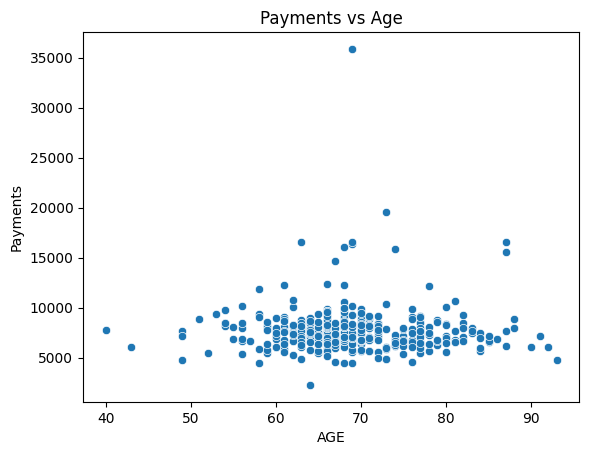

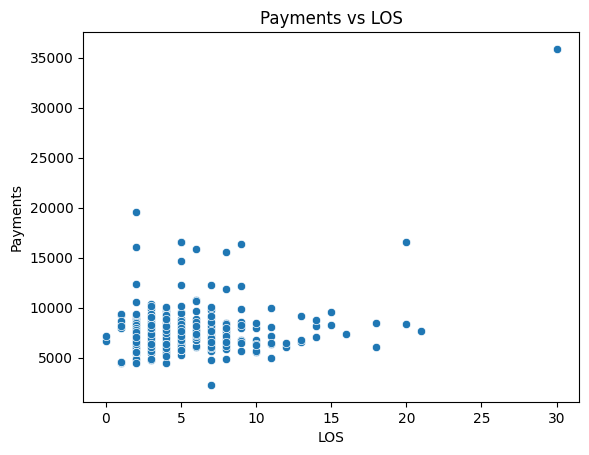

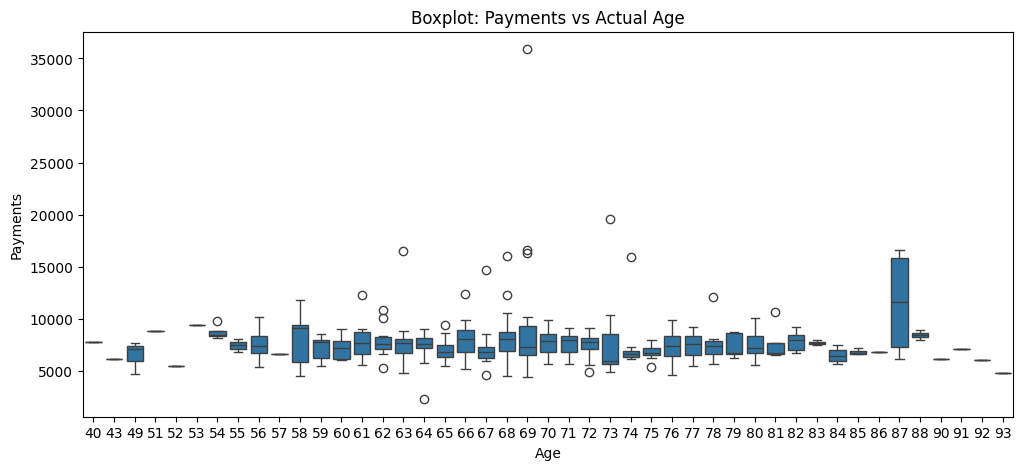

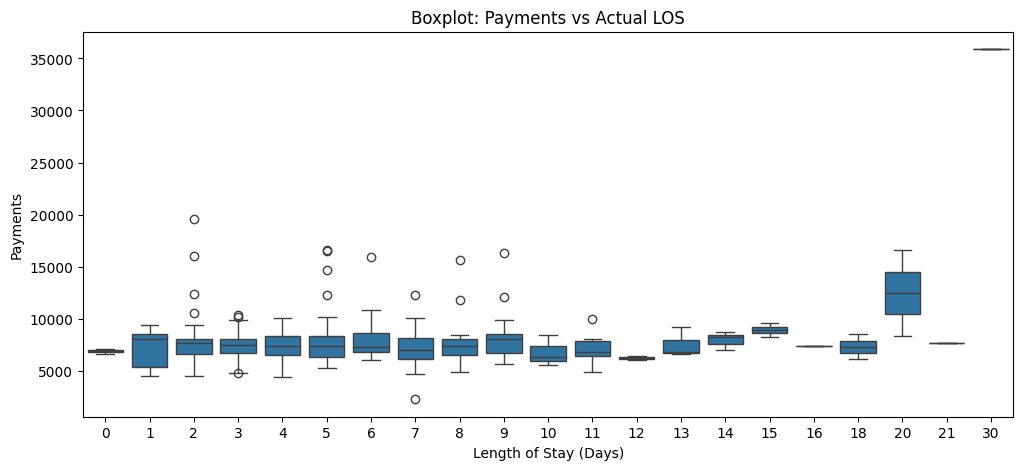

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------
# 1️⃣ Ensure numeric columns
# -------------------------------------------

df = Multi_Claim_df_350.copy()

df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')
df['Payments'] = pd.to_numeric(df['Payments'], errors='coerce')

# -------------------------------------------
# 2️⃣ Correlations (Payments vs AGE & LOS)
# -------------------------------------------

corr_age = df['Payments'].corr(df['AGE'], method='pearson')
corr_los = df['Payments'].corr(df['LOS'], method='pearson')

corr_age_spearman = df['Payments'].corr(df['AGE'], method='spearman')
corr_los_spearman = df['Payments'].corr(df['LOS'], method='spearman')

print("Pearson Corr - Payments vs Age:", corr_age)
print("Pearson Corr - Payments vs LOS:", corr_los)
print("Spearman Corr - Payments vs Age:", corr_age_spearman)
print("Spearman Corr - Payments vs LOS:", corr_los_spearman)

# -------------------------------------------
# 3️⃣ Scatter Plots
# -------------------------------------------

sns.scatterplot(x='AGE', y='Payments', data=df)
plt.title("Payments vs Age")
plt.show()

sns.scatterplot(x='LOS', y='Payments', data=df)
plt.title("Payments vs LOS")
plt.show()

# -------------------------------------------
# 4️⃣ Boxplot using actual AGE (continuous)
# -------------------------------------------

plt.figure(figsize=(12, 5))
sns.boxplot(x='AGE', y='Payments', data=df)
plt.title("Boxplot: Payments vs Actual Age")
plt.xlabel("Age")
plt.ylabel("Payments")
plt.show()

# -------------------------------------------
# 5️⃣ Boxplot using actual LOS (continuous)
# -------------------------------------------

plt.figure(figsize=(12, 5))
sns.boxplot(x='LOS', y='Payments', data=df)
plt.title("Boxplot: Payments vs Actual LOS")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Payments")
plt.show()


Outlier Based On the Payment on Age 

In [ ]:
# Function to detect outliers for each age group
def find_outliers(group):
    q1 = group['Payments'].quantile(0.25)
    q3 = group['Payments'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    # mark outliers
    return group[(group['Payments'] < lower) | (group['Payments'] > upper)]

# Apply per AGE group
outliers_df = df.groupby('AGE', group_keys=False).apply(find_outliers)

# Show outliers
print(outliers_df.info())
outliers_df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 22719 to 53152
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      22 non-null     object 
 1   PaymentType                 22 non-null     object 
 2   Payments                    22 non-null     float64
 3   Provider_ID                 22 non-null     object 
 4   HospitalName                22 non-null     object 
 5   LOS                         22 non-null     int64  
 6   ADRG                        22 non-null     object 
 7   AGE                         22 non-null     int64  
 8   PRIM_DX                     22 non-null     object 
 9   B_DRG                       22 non-null     object 
 10  InitialDeterminationStatus  22 non-null     object 
 11  IDSavings                   22 non-null     float64
 12  AdjustedSavings             22 non-null     object 
 13  B_PRIMDX_Clean              22 non-

C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_20428\3274115535.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_df = df.groupby('AGE', group_keys=False).apply(find_outliers)


,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status,is_approved,is_denied,combined_column,combined_count,total_claim,approved_claim,denied_claim,total_payment,avg_payment,max_payment,min_payment,sd_payment,avg_payment_by_comb,sd_payment_by_comb,Upper_Limt,Lower_Limt,claim_status
22719,Hum,postpay,9734.62,582453303,TANNER MEDICAL CENTER,7,190,54,J441,190,Approved,0.0,0,J441,MCC,"[J9621, J9622]",MCC,"[J9621, J9622]",2,2,No Change,No Change,No Change,No Change,True,False,"190|J441|['J9621', 'J9622']|MCC",350,350,350,0,9734.62,9734.620000,9734.62,9734.62,NaN,7734.2926,2459.008568,15111.318305,357.266895,Normal
45803,Hum,postpay,12266.40,000070850E,LUTHERAN DOWNTOWN HOSPITAL,7,190,61,J441,190,Approved,0.0,0,J441,MCC,"[J9621, J9622]",MCC,"[J9621, J9622]",2,2,No Change,No Change,No Change,No Change,True,False,"190|J441|['J9621', 'J9622']|MCC",350,350,350,0,12266.40,12266.400000,12266.40,12266.40,NaN,7734.2926,2459.008568,15111.318305,357.266895,Normal
27645,Hum,postpay,5267.82,581725656,ALLIANCEHEALTH DURANT,5,190,62,J441,190,Approved,0.0,0,J441,MCC,"[J9621, J9622]",MCC,"[J9621, J9622]",2,2,No Change,No Change,No Change,No Change,True,False,"190|J441|['J9621', 'J9622']|MCC",350,350,350,0,5267.82,5267.820000,5267.82,5267.82,NaN,7734.2926,2459.008568,15111.318305,357.266895,Normal
36809,Hum,postpay,10106.42,581973570,ATRIUM HEALTH FLOYD MEDICAL CE,7,190,62,J441,190,Approved,0.0,0,J441,MCC,"[J9621, J9622]",MCC,"[J9621, J9622]",2,2,No Change,No Change,No Change,No Change,True,False,"190|J441|['J9621', 'J9622']|MCC",350,350,350,0,61810.99,8830.141429,10123.58,6755.20,1237.411392,7734.2926,2459.008568,15111.318305,357.266895,Normal
45230,Hum,postpay,10787.65,160743905,ARNOT OGDEN MEDICAL CENTER,6,190,62,J441,190,Approved,0.0,0,J441,MCC,"[J9621, J9622]",MCC,"[J9621, J9622]",2,2,No Change,No Change,No Change,No Change,True,False,"190|J441|['J9621', 'J9622']|MCC",350,350,350,0,25028.46,8342.820000,10787.65,6399.83,2236.542785,7734.2926,2459.008568,15111.318305,357.266895,Normal


In [ ]:
# Apply per AGE group
outliers_df1 = df.groupby('LOS', group_keys=False).apply(find_outliers)
print(outliers_df1.info())
outliers_df1.head()

C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_20428\1116461790.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_df1 = df.groupby('LOS', group_keys=False).apply(find_outliers)


<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 16632 to 43843
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      19 non-null     object 
 1   PaymentType                 19 non-null     object 
 2   Payments                    19 non-null     float64
 3   Provider_ID                 19 non-null     object 
 4   HospitalName                19 non-null     object 
 5   LOS                         19 non-null     int64  
 6   ADRG                        19 non-null     object 
 7   AGE                         19 non-null     int64  
 8   PRIM_DX                     19 non-null     object 
 9   B_DRG                       19 non-null     object 
 10  InitialDeterminationStatus  19 non-null     object 
 11  IDSavings                   19 non-null     float64
 12  AdjustedSavings             19 non-null     object 
 13  B_PRIMDX_Clean              19 non-

,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status,is_approved,is_denied,combined_column,combined_count,total_claim,approved_claim,denied_claim,total_payment,avg_payment,max_payment,min_payment,sd_payment,avg_payment_by_comb,sd_payment_by_comb,Upper_Limt,Lower_Limt,claim_status
16632,Hum,postpay,10546.74,911631806,HARBORVIEW MEDICAL CENTER,2,190,68,J441,190,Approved,0.0,0,J441,MCC,"[J9621, J9622]",MCC,"[J9621, J9622]",2,2,No Change,No Change,No Change,No Change,True,False,"190|J441|['J9621', 'J9622']|MCC",350,350,350,0,10546.74,10546.740,10546.74,10546.74,NaN,7734.2926,2459.008568,15111.318305,357.266895,Normal
18691,Hum,postpay,12357.77,581911751,SGHS CAMDEN CAMPUS,2,190,66,J441,190,Approved,0.0,0,J441,MCC,"[J9621, J9622]",MCC,"[J9621, J9622]",2,2,No Change,No Change,No Change,No Change,True,False,"190|J441|['J9621', 'J9622']|MCC",350,350,350,0,12357.77,12357.770,12357.77,12357.77,NaN,7734.2926,2459.008568,15111.318305,357.266895,Normal
32650,Hum,postpay,19596.09,132655001J,HARLEM HOSPITAL CENTER,2,190,73,J441,190,Approved,0.0,0,J441,MCC,"[J9621, J9622]",MCC,"[J9621, J9622]",2,2,No Change,No Change,No Change,No Change,True,False,"190|J441|['J9621', 'J9622']|MCC",350,350,350,0,19596.09,19596.090,19596.09,19596.09,NaN,7734.2926,2459.008568,15111.318305,357.266895,Normal
37191,Hum,postpay,16039.85,000004625C,JACOBI MEDICAL CENTER,2,190,68,J441,190,Approved,0.0,0,J441,MCC,"[J9621, J9622]",MCC,"[J9621, J9622]",2,2,No Change,No Change,No Change,No Change,True,False,"190|J441|['J9621', 'J9622']|MCC",350,350,350,0,31649.23,15824.615,16039.85,15609.38,304.388256,7734.2926,2459.008568,15111.318305,357.266895,Normal
15873,Hum,postpay,10376.81,720685044,FRANKLIN PARISH HOSPITAL DBA,3,190,73,J441,190,Approved,0.0,0,J441,MCC,"[J9621, J9622]",MCC,"[J9621, J9622]",2,2,No Change,No Change,No Change,No Change,True,False,"190|J441|['J9621', 'J9622']|MCC",350,350,350,0,16991.32,8495.660,10376.81,6614.51,2660.347843,7734.2926,2459.008568,15111.318305,357.266895,Normal


#### Combination Count == 318

Pearson Corr - Payments vs Age: 0.009128402473131406
Pearson Corr - Payments vs LOS: 0.010139280659514582
Spearman Corr - Payments vs Age: 0.02913499085760586
Spearman Corr - Payments vs LOS: -0.06692139350272437


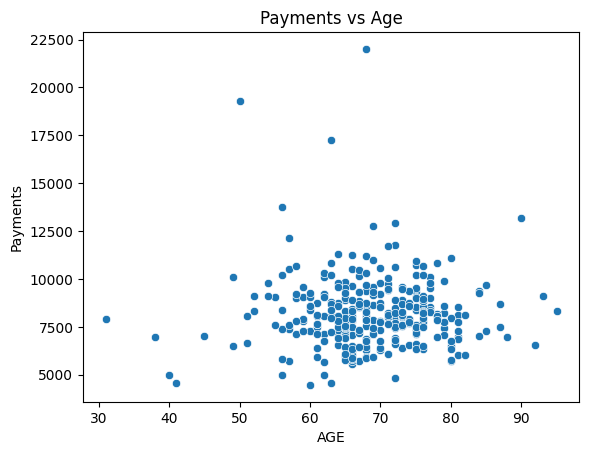

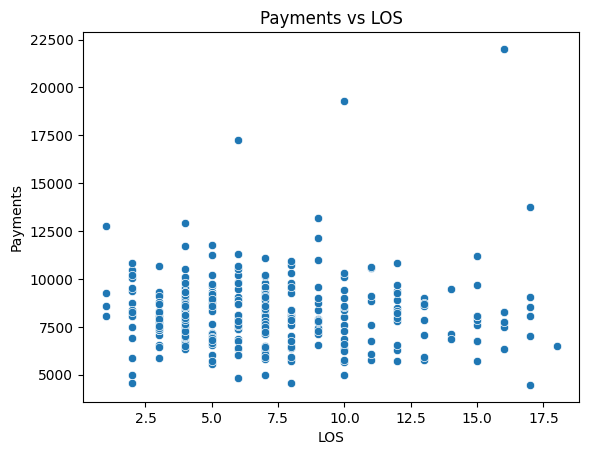

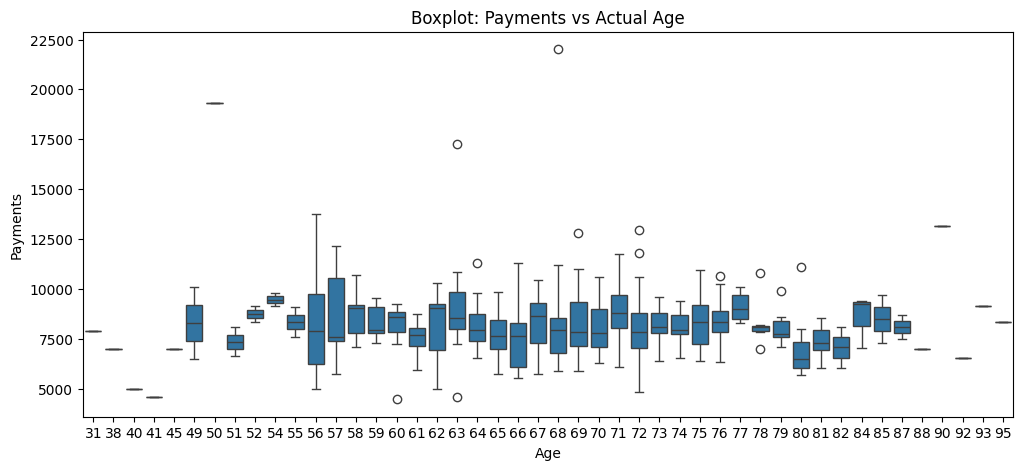

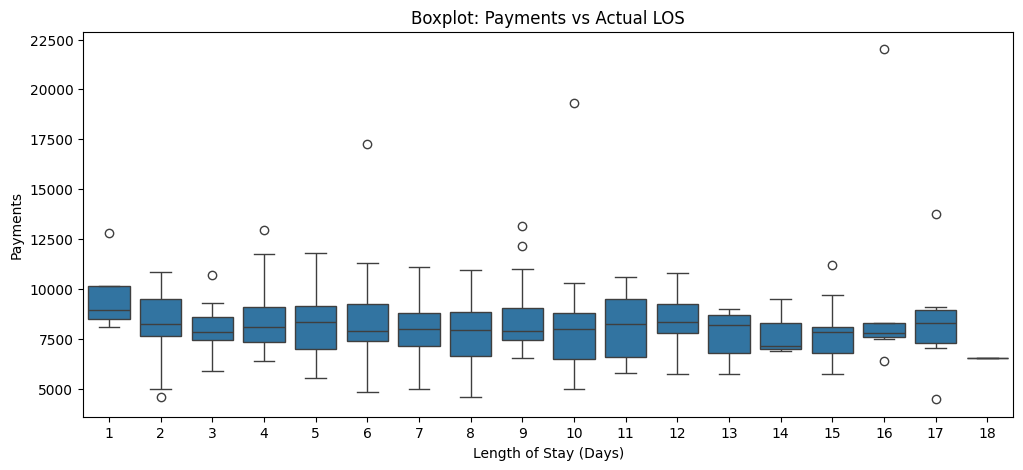

In [33]:
Multi_Claim_df_318 = Multi_Claim_df[Multi_Claim_df['combined_count']==318].copy()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------
# 1️⃣ Ensure numeric columns
# -------------------------------------------

df = Multi_Claim_df_318.copy()

df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')
df['Payments'] = pd.to_numeric(df['Payments'], errors='coerce')

# -------------------------------------------
# 2️⃣ Correlations (Payments vs AGE & LOS)
# -------------------------------------------

corr_age = df['Payments'].corr(df['AGE'], method='pearson')
corr_los = df['Payments'].corr(df['LOS'], method='pearson')

corr_age_spearman = df['Payments'].corr(df['AGE'], method='spearman')
corr_los_spearman = df['Payments'].corr(df['LOS'], method='spearman')

print("Pearson Corr - Payments vs Age:", corr_age)
print("Pearson Corr - Payments vs LOS:", corr_los)
print("Spearman Corr - Payments vs Age:", corr_age_spearman)
print("Spearman Corr - Payments vs LOS:", corr_los_spearman)

# -------------------------------------------
# 3️⃣ Scatter Plots
# -------------------------------------------

sns.scatterplot(x='AGE', y='Payments', data=df)
plt.title("Payments vs Age")
plt.show()

sns.scatterplot(x='LOS', y='Payments', data=df)
plt.title("Payments vs LOS")
plt.show()

# -------------------------------------------
# 4️⃣ Boxplot using actual AGE (continuous)
# -------------------------------------------

plt.figure(figsize=(12, 5))
sns.boxplot(x='AGE', y='Payments', data=df)
plt.title("Boxplot: Payments vs Actual Age")
plt.xlabel("Age")
plt.ylabel("Payments")
plt.show()

# -------------------------------------------
# 5️⃣ Boxplot using actual LOS (continuous)
# -------------------------------------------

plt.figure(figsize=(12, 5))
sns.boxplot(x='LOS', y='Payments', data=df)
plt.title("Boxplot: Payments vs Actual LOS")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Payments")
plt.show()


In [34]:
# Function to detect outliers for each age group
def find_outliers(group):
    q1 = group['Payments'].quantile(0.25)
    q3 = group['Payments'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    # mark outliers
    return group[(group['Payments'] < lower) | (group['Payments'] > upper)]

# Apply per AGE group
outliers_df = df.groupby('AGE', group_keys=False).apply(find_outliers)

# Show outliers
print(outliers_df.info())
outliers_df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 26427 to 40032
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      13 non-null     object 
 1   PaymentType                 13 non-null     object 
 2   Payments                    13 non-null     float64
 3   Provider_ID                 13 non-null     object 
 4   HospitalName                13 non-null     object 
 5   LOS                         13 non-null     int64  
 6   ADRG                        13 non-null     object 
 7   AGE                         13 non-null     int64  
 8   PRIM_DX                     13 non-null     object 
 9   B_DRG                       13 non-null     object 
 10  InitialDeterminationStatus  13 non-null     object 
 11  IDSavings                   13 non-null     float64
 12  AdjustedSavings             13 non-null     object 
 13  B_PRIMDX_Clean              13 non-

C:\Users\arunkumara\AppData\Local\Temp\4\ipykernel_17788\4057414770.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_df = df.groupby('AGE', group_keys=False).apply(find_outliers)


,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status,is_approved,is_denied,combined_column,combined_count,total_claim,approved_claim,denied_claim,total_payment,avg_payment,max_payment,min_payment,sd_payment,avg_payment_by_comb,sd_payment_by_comb,Upper_Limt,Lower_Limt,claim_status
26427,Hum,postpay,4464.42,550357057,WHEELING HOSPITAL INC,17,189,60,J9621,189,Approved,0.0,0,J9621,MCC,[J9622],MCC,[J9622],1,1,No Change,No Change,No Change,No Change,True,False,189|J9621|['J9622']|MCC,318,318,318,0,4464.42,4464.42,4464.42,4464.42,NaN,8217.33934,1831.064772,13710.533655,2724.145024,Normal
39799,Hum,postpay,17262.07,000210742,UNION MEDICAL CENTER,6,189,63,J9621,189,Approved,0.0,0,J9621,MCC,[J9622],MCC,[J9622],1,1,No Change,No Change,No Change,No Change,True,False,189|J9621|['J9622']|MCC,318,318,318,0,17262.07,17262.07,17262.07,17262.07,NaN,8217.33934,1831.064772,13710.533655,2724.145024,Normal
46590,Hum,postpay,4563.38,000087165H,SSM HEALTH CARE OF OKLAHOMA,2,189,63,J9621,189,Approved,0.0,0,J9621,MCC,[J9622],MCC,[J9622],1,1,No Change,No Change,No Change,No Change,True,False,189|J9621|['J9622']|MCC,318,318,318,0,11673.12,5836.56,7109.74,4563.38,1800.548423,8217.33934,1831.064772,13710.533655,2724.145024,Normal
22727,Hum,postpay,11316.78,010238522X,FRANKLIN MEMORIAL HOSPITAL,6,189,64,J9621,189,Approved,0.0,0,J9621,MCC,[J9622],MCC,[J9622],1,1,No Change,No Change,No Change,No Change,True,False,189|J9621|['J9622']|MCC,318,318,318,0,11316.78,11316.78,11316.78,11316.78,NaN,8217.33934,1831.064772,13710.533655,2724.145024,Normal
46232,Hum,postpay,22012.69,262037695D,GRADY MEMORIAL HOSPITAL CORPOR,16,189,68,J9621,189,Approved,0.0,0,J9621,MCC,[J9622],MCC,[J9622],1,1,No Change,No Change,No Change,No Change,True,False,189|J9621|['J9622']|MCC,318,318,318,0,22012.69,22012.69,22012.69,22012.69,NaN,8217.33934,1831.064772,13710.533655,2724.145024,Normal


In [35]:
# Apply per AGE group
outliers_df1 = df.groupby('LOS', group_keys=False).apply(find_outliers)
print(outliers_df1.info())
outliers_df1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 51823 to 26427
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      13 non-null     object 
 1   PaymentType                 13 non-null     object 
 2   Payments                    13 non-null     float64
 3   Provider_ID                 13 non-null     object 
 4   HospitalName                13 non-null     object 
 5   LOS                         13 non-null     int64  
 6   ADRG                        13 non-null     object 
 7   AGE                         13 non-null     int64  
 8   PRIM_DX                     13 non-null     object 
 9   B_DRG                       13 non-null     object 
 10  InitialDeterminationStatus  13 non-null     object 
 11  IDSavings                   13 non-null     float64
 12  AdjustedSavings             13 non-null     object 
 13  B_PRIMDX_Clean              13 non-

C:\Users\arunkumara\AppData\Local\Temp\4\ipykernel_17788\1116461790.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_df1 = df.groupby('LOS', group_keys=False).apply(find_outliers)


,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status,is_approved,is_denied,combined_column,combined_count,total_claim,approved_claim,denied_claim,total_payment,avg_payment,max_payment,min_payment,sd_payment,avg_payment_by_comb,sd_payment_by_comb,Upper_Limt,Lower_Limt,claim_status
51823,Hum,postpay,12779.42,832531807,CHEROKEE MEDICAL CENTER,1,189,69,J9621,189,Approved,0.0,0,J9621,MCC,[J9622],MCC,[J9622],1,1,No Change,No Change,No Change,No Change,True,False,189|J9621|['J9622']|MCC,318,318,318,0,12779.42,12779.420,12779.42,12779.42,NaN,8217.33934,1831.064772,13710.533655,2724.145024,Normal
46590,Hum,postpay,4563.38,000087165H,SSM HEALTH CARE OF OKLAHOMA,2,189,63,J9621,189,Approved,0.0,0,J9621,MCC,[J9622],MCC,[J9622],1,1,No Change,No Change,No Change,No Change,True,False,189|J9621|['J9622']|MCC,318,318,318,0,11673.12,5836.560,7109.74,4563.38,1800.548423,8217.33934,1831.064772,13710.533655,2724.145024,Normal
43239,Hum,postpay,10691.38,000028258F,ASCENSION SACRED HEART PENSACO,3,189,58,J9621,189,Approved,0.0,0,J9621,MCC,[J9622],MCC,[J9622],1,1,No Change,No Change,No Change,No Change,True,False,189|J9621|['J9622']|MCC,318,318,318,0,29957.67,9985.890,10691.38,8605.36,1195.670988,8217.33934,1831.064772,13710.533655,2724.145024,Normal
20568,Hum,postpay,12938.04,522438452,WEST KENDALL BAPTIST HOSPITAL,4,189,72,J9621,189,Approved,0.0,0,J9621,MCC,[J9622],MCC,[J9622],1,1,No Change,No Change,No Change,No Change,True,False,189|J9621|['J9622']|MCC,318,318,318,0,26095.43,13047.715,13157.39,12938.04,155.103872,8217.33934,1831.064772,13710.533655,2724.145024,Normal
39799,Hum,postpay,17262.07,000210742,UNION MEDICAL CENTER,6,189,63,J9621,189,Approved,0.0,0,J9621,MCC,[J9622],MCC,[J9622],1,1,No Change,No Change,No Change,No Change,True,False,189|J9621|['J9622']|MCC,318,318,318,0,17262.07,17262.070,17262.07,17262.07,NaN,8217.33934,1831.064772,13710.533655,2724.145024,Normal


### Change

In [7]:
cols = ["DX_Change_Status", "DX_Type_Status", "DX_Set_Change_Status","DRG_Status"]

# Keep rows where all columns are "No Change"
df5 = df_hum[~(df_hum[cols] == "No Change").all(axis=1)].copy()
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9021 entries, 33870 to 886028
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      9021 non-null   object 
 1   PaymentType                 9021 non-null   object 
 2   Payments                    9021 non-null   float64
 3   Provider_ID                 9021 non-null   object 
 4   HospitalName                9021 non-null   object 
 5   LOS                         9021 non-null   object 
 6   ADRG                        9021 non-null   object 
 7   AGE                         9021 non-null   object 
 8   PRIM_DX                     9021 non-null   object 
 9   B_DRG                       8802 non-null   object 
 10  InitialDeterminationStatus  9021 non-null   object 
 11  IDSavings                   9021 non-null   float64
 12  AdjustedSavings             9021 non-null   object 
 13  B_PRIMDX_Clean              9021

In [65]:
df5['InitialDeterminationStatus'].value_counts()

InitialDeterminationStatus
Denied      8016
Approved    1005
Name: count, dtype: int64

### Approved

In [54]:
df6 = df5[df5['InitialDeterminationStatus']=='Approved'].copy()

In [55]:
df6.head(20)

,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status
246354,Hum,postpay,7291.11,277579,RCCH TRIOS HEALTH LLC,14,689,73,N3000,690,Approved,0.0,0,N3000,MCC,"[E43, I5033, L89153]",MCC,"[I5033, L89153]",3,2,No Change,No Change,Change 689 → 690,"Change ['E43', 'I5033', 'L89153'] → ['I5033', 'L89153']"
249288,Hum,postpay,14320.87,550357050E,ST MARYS MEDICAL CENTER,11,856,75,T8143XA,857,Approved,0.0,0,T8143XA,MCC,[A419],CC,"[E871, I130, J9611, J9811, K9189, T8144XA]",1,6,No Change,Change MCC → CC,Change 856 → 857,"Change ['A419'] → ['E871', 'I130', 'J9611', 'J9811', 'K9189', 'T8144XA']"
249973,Hum,postpay,14393.80,198199,UNIVERSITY MEDICAL CENTER,19,871,72,A414,690,Approved,0.0,0,A414,MCC,"[J9690, R6521]",MCC,"[J9690, R6521]",2,2,No Change,No Change,Change 871 → 690,No Change
253194,Hum,postpay,6842.40,610444707B,BAPTIST HEALTH LOUISVILLE,4,689,69,N390,689,Approved,0.0,0,N390,MCC,"[G9341, J9621, J9622]",MCC,"[G9341, J9621]",3,2,No Change,No Change,No Change,"Change ['G9341', 'J9621', 'J9622'] → ['G9341', 'J9621']"
257840,Hum,postpay,9034.14,231352213,ST LUKES HOSPITAL,8,640,62,E871,640,Approved,0.0,0,,MCC,[N186],General,"[D631, E039, E1122, E11649, E8339, E861, F17210, F22, F79, M898X9, Z221, Z7982, Z8673]",1,13,Change E871 →,Change MCC → General,No Change,"Change ['N186'] → ['D631', 'E039', 'E1122', 'E11649', 'E8339', 'E861', 'F17210', 'F22', 'F79', 'M898X9', 'Z221', 'Z7982', 'Z8673']"
257918,Hum,postpay,5800.23,000198194,RIVERSIDE REGIONAL MEDICAL CEN,13,871,78,A4151,444,Approved,0.0,0,K810,MCC,"[G9341, I6381]",MCC,"[G9341, I6381]",2,2,Change A4151 → K810,No Change,Change 871 → 444,No Change
259645,Hum,postpay,9182.54,000062322B,HURLEY MEDICAL CENTER,3,551,65,S12501A,NaN,Approved,0.0,0,S12501A,MCC,"[A481, J168, J9601]",MCC,"[A481, J168, J9601]",3,3,No Change,No Change,Change 551 → nan,No Change
262746,Hum,postpay,13795.02,592616017M,UNIV OF MIAMI HOSP AND CLINICS,4,193,67,J180,NaN,Approved,0.0,0,J180,MCC,"[E43, N186]",MCC,"[E43, N186]",2,2,No Change,No Change,Change 193 → nan,No Change
262860,Hum,postpay,18489.03,592616017M,UNIV OF MIAMI HOSP AND CLINICS,6,377,72,K922,NaN,Approved,0.0,0,K922,MCC,[N186],MCC,[N186],1,1,No Change,No Change,Change 377 → nan,No Change
266172,Hum,postpay,10216.94,272814378,SETON MEDICAL CENTER HARKER HE,1,260,86,R001,NaN,Approved,0.0,0,R001,MCC,"[J9621, J9622]",MCC,"[J9621, J9622]",2,2,No Change,No Change,Change 260 → nan,No Change


In [67]:
df6['combined_column'] = df6[['DX_Change_Status','DX_Set_Change_Status', 'DRG_Status','DX_Type_Status']].astype(str).agg('|'.join, axis=1)
# Compute value counts
df6['combined_column'].value_counts(ascending=False).head()

combined_column
No Change|No Change|Change 871 → nan|No Change                              29
Change J9621 → |Change ['J9622'] → []|Change 189 → 191|No Change            13
No Change|No Change|Change 313 → nan|No Change                               9
Change J441 → |Change ['J9621', 'J9622'] → []|Change 190 → 191|No Change     8
No Change|No Change|Change 637 → nan|No Change                               7
Name: count, dtype: int64

the row have the more than 3 no change is approved 

In [15]:
cols = ["DX_Change_Status", "DX_Type_Status", "DX_Set_Change_Status"]

# Keep rows where all columns are "No Change"
df55 = df5[(df5[cols] == "No Change").all(axis=1)].copy()
df55.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 249973 to 885742
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      337 non-null    object 
 1   PaymentType                 337 non-null    object 
 2   Payments                    337 non-null    float64
 3   Provider_ID                 337 non-null    object 
 4   HospitalName                337 non-null    object 
 5   LOS                         337 non-null    object 
 6   ADRG                        337 non-null    object 
 7   AGE                         337 non-null    object 
 8   PRIM_DX                     337 non-null    object 
 9   B_DRG                       145 non-null    object 
 10  InitialDeterminationStatus  337 non-null    object 
 11  IDSavings                   337 non-null    float64
 12  AdjustedSavings             337 non-null    object 
 13  B_PRIMDX_Clean              337 

In [17]:
df55['InitialDeterminationStatus'].value_counts()

InitialDeterminationStatus
Approved    237
Denied      100
Name: count, dtype: int64

In [18]:
df556 = df55[df55['InitialDeterminationStatus']=='Approved'].copy()
df556.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 249973 to 885742
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      237 non-null    object 
 1   PaymentType                 237 non-null    object 
 2   Payments                    237 non-null    float64
 3   Provider_ID                 237 non-null    object 
 4   HospitalName                237 non-null    object 
 5   LOS                         237 non-null    object 
 6   ADRG                        237 non-null    object 
 7   AGE                         237 non-null    object 
 8   PRIM_DX                     237 non-null    object 
 9   B_DRG                       45 non-null     object 
 10  InitialDeterminationStatus  237 non-null    object 
 11  IDSavings                   237 non-null    float64
 12  AdjustedSavings             237 non-null    object 
 13  B_PRIMDX_Clean              237 

In [52]:
df556.head(50)

,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status
249973,Hum,postpay,14393.80,198199,UNIVERSITY MEDICAL CENTER,19,871,72,A414,690,Approved,0.0,0,A414,MCC,"[J9690, R6521]",MCC,"[J9690, R6521]",2,2,No Change,No Change,Change 871 → 690,No Change
259645,Hum,postpay,9182.54,000062322B,HURLEY MEDICAL CENTER,3,551,65,S12501A,NaN,Approved,0.0,0,S12501A,MCC,"[A481, J168, J9601]",MCC,"[A481, J168, J9601]",3,3,No Change,No Change,Change 551 → nan,No Change
262746,Hum,postpay,13795.02,592616017M,UNIV OF MIAMI HOSP AND CLINICS,4,193,67,J180,NaN,Approved,0.0,0,J180,MCC,"[E43, N186]",MCC,"[E43, N186]",2,2,No Change,No Change,Change 193 → nan,No Change
262860,Hum,postpay,18489.03,592616017M,UNIV OF MIAMI HOSP AND CLINICS,6,377,72,K922,NaN,Approved,0.0,0,K922,MCC,[N186],MCC,[N186],1,1,No Change,No Change,Change 377 → nan,No Change
266172,Hum,postpay,10216.94,272814378,SETON MEDICAL CENTER HARKER HE,1,260,86,R001,NaN,Approved,0.0,0,R001,MCC,"[J9621, J9622]",MCC,"[J9621, J9622]",2,2,No Change,No Change,Change 260 → nan,No Change
266178,Hum,postpay,7933.46,010198331,NORTHERN LIGHT MAINE COAST HOS,2,281,65,I5181,NaN,Approved,0.0,0,I5181,MCC,[I222],MCC,[I222],1,1,No Change,No Change,Change 281 → nan,No Change
266201,Hum,postpay,8986.29,860982071,WESTERN ARIZONA REGIONAL MEDIC,8,713,90,N401,NaN,Approved,0.0,0,N401,CC,"[N138, N390]",CC,"[N138, N390]",2,2,No Change,No Change,Change 713 → nan,No Change
267804,Hum,postpay,5191.78,752559845H,SHANNON MEDICAL CENTER,4,194,78,J189,NaN,Approved,0.0,0,J189,CC,"[J440, J441, J9611]",CC,"[J440, J441, J9611]",3,3,No Change,No Change,Change 194 → nan,No Change
267897,Hum,postpay,7757.84,351361243A,HENDRICKS REGIONAL HEALTH,2,190,73,J441,NaN,Approved,0.0,0,J441,MCC,"[J15211, J9621]",MCC,"[J15211, J9621]",2,2,No Change,No Change,Change 190 → nan,No Change
268047,Hum,postpay,12483.25,510103684A,CHRISTIANA CARE HEALTH SERVICE,18,377,61,K264,NaN,Approved,0.0,0,K264,MCC,[G928],MCC,[G928],1,1,No Change,No Change,Change 377 → nan,No Change


In [22]:
import pandas as pd

# ---------------------------------------
# 0️⃣ Fix datatype issues for numeric cols
# ---------------------------------------
df556["LOS"] = pd.to_numeric(df556["LOS"], errors="coerce")
df556["Payments"] = pd.to_numeric(df556["Payments"], errors="coerce")

# ---------------------------------------
# 1️⃣ Base Aggregation
# ---------------------------------------
df_group = df556.groupby(["PRIM_DX", "ADRG"]).agg(
    total_claims=("InitialDeterminationStatus", "count"),
    approved_count=("InitialDeterminationStatus", lambda x: (x == "Approved").sum()),
    denied_count=("InitialDeterminationStatus", lambda x: (x == "Denied").sum()),
    avg_LOS=("LOS", "mean"),
    #count_LOS=("LOS", "count"),
    avg_payments=("Payments", "mean"),
    max_payments=("Payments", "max"),
    min_payments=("Payments", "min"),
    #count_payments=("Payments", "count")
).reset_index()

# ---------------------------------------
# 2️⃣ % Denied
# ---------------------------------------
df_group["percentage_denied"] = (
    df_group["denied_count"] / df_group["total_claims"] * 100
).round(2)

# ---------------------------------------
# 3️⃣ DENIED METRICS (must use original dataframe)
# ---------------------------------------
denied_stats = df556[df556["InitialDeterminationStatus"] == "Denied"].groupby(
    ["PRIM_DX", "ADRG"]
).agg(
    denied_avg_LOS=("LOS", "mean"),
    #denied_count_LOS=("LOS", "count"),
    denied_avg_payments=("Payments", "mean"),
    #denied_count_payments=("Payments", "count")
).reset_index()

# ---------------------------------------
# 4️⃣ Merge denied metrics
# ---------------------------------------
df_group = df_group.merge(denied_stats, on=["PRIM_DX", "ADRG"], how="left")

# ---------------------------------------
# 5️⃣ Sorting
# ---------------------------------------
df_group = df_group.sort_values(
    by=["total_claims"],
    ascending=False
).reset_index(drop=True)

In [23]:
df_group.head(10)

,PRIM_DX,ADRG,total_claims,approved_count,denied_count,avg_LOS,avg_payments,max_payments,min_payments,percentage_denied,denied_avg_LOS,denied_avg_payments
0,A419,871,21,21,0,8.666667,13546.584762,26709.44,7150.61,0.0,NaN,NaN
1,A419,853,6,6,0,14.333333,33174.401667,39129.86,26911.81,0.0,NaN,NaN
2,R079,313,6,6,0,2.833333,9896.976667,25085.41,5180.15,0.0,NaN,NaN
3,J441,190,6,6,0,4.000000,8281.823333,10867.74,7014.42,0.0,NaN,NaN
4,A4151,871,5,5,0,13.600000,13999.876000,18137.97,8623.83,0.0,NaN,NaN
5,J189,193,4,4,0,12.500000,9070.647500,10662.71,7292.50,0.0,NaN,NaN
6,E1169,617,3,3,0,5.666667,14221.646667,14844.63,13165.47,0.0,NaN,NaN
7,E1010,637,3,3,0,5.333333,10698.840000,12405.93,8423.96,0.0,NaN,NaN
8,K254,378,3,3,0,4.333333,7165.486667,7805.62,6294.94,0.0,NaN,NaN
9,N179,683,3,3,0,3.666667,6338.630000,7456.07,4381.05,0.0,NaN,NaN


In [21]:
df556['A_DX_Set'].value_counts().head(10)

A_DX_Set
[N186]            16
[D62]              6
[J9621, J9622]     5
[E43]              4
[I5033]            3
[G9341]            3
[]                 3
[G9341, J690]      3
[E43, J9621]       2
[J9621, N186]      2
Name: count, dtype: int64

In [12]:
df556['ADRG'].value_counts()

ADRG
871     220
189      83
683      55
853      47
190      31
193      25
689      23
682      16
698      15
071      15
644      14
078      10
308       9
637       8
377       7
872       6
280       6
177       5
432       5
391       5
070       4
564       4
175       4
091       4
291       4
417       4
659       4
082       3
640       3
199       3
064       3
811       3
643       3
388       3
235       3
281       3
438       3
915       3
808       3
314       3
304       3
100       3
023       2
856       2
286       2
085       2
854       2
371       2
917       2
183       2
602       2
393       2
270       2
896       2
330       2
276       2
638       2
389       2
441       2
028       1
539       1
919       1
5403      1
7204      1
191       1
242       1
243       1
435       1
200       1
436       1
922       1
516       1
166       1
867       1
493       1
964       1
056       1
455       1
571       1
485       1
654       1
535       1
809       1

In [11]:
df556['PRIM_DX'].value_counts()

PRIM_DX
A419       177
N179        69
J9621       51
A4151       33
J441        30
J9601       19
J189        18
A4189       18
E222        15
G9341       15
N390        14
A4159       14
T83511A     12
I674        11
A4102       10
J9622        8
A4101        7
I110         7
I480         6
N3000        6
A4150        5
A414         5
I4891        4
E1010        4
I214         4
J9602        4
T83518A      4
T796XXA      4
I161         3
K8590        3
A409         3
K56609       3
G928         3
I130         3
E11621       2
I25118       2
T886XXA      2
J690         2
K7460        2
G9340        2
K921         2
J159         2
D61810       2
K7031        2
S065XAA      2
N170         2
I2510        2
J101         2
J1000        2
E1110        2
E871         2
K222         2
S270XXA      2
D649         2
I63511       2
N136         2
K8010        2
G40901       2
U071         2
I2609        2
T85590A      1
T6701XA      1
T8029XA      1
E1122        1
J942         1
K2981        1
S0

### Denied 

In [24]:
df7 = df5[df5['InitialDeterminationStatus']=='Denied'].copy()
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8016 entries, 33870 to 886024
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      8016 non-null   object 
 1   PaymentType                 8016 non-null   object 
 2   Payments                    8016 non-null   float64
 3   Provider_ID                 8016 non-null   object 
 4   HospitalName                8016 non-null   object 
 5   LOS                         8016 non-null   object 
 6   ADRG                        8016 non-null   object 
 7   AGE                         8016 non-null   object 
 8   PRIM_DX                     8016 non-null   object 
 9   B_DRG                       8016 non-null   object 
 10  InitialDeterminationStatus  8016 non-null   object 
 11  IDSavings                   8016 non-null   float64
 12  AdjustedSavings             8016 non-null   object 
 13  B_PRIMDX_Clean              8016

In [25]:
df7[df7['DRG_Status']=='No Change'].head()

,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status
768353,Hum,postpay,11951.08,550261260U,RALEIGH GENERAL HOSPITAL,6,698,71,T83511A,698,Denied,7011.11,0,T83511A,MCC,"[A419, G928, R6520]",MCC,"[A419, G928]",3,2,No Change,No Change,No Change,"Change ['A419', 'G928', 'R6520'] → ['A419', 'G928']"


In [26]:
df7['DX_Change_Status'].value_counts(ascending=False).head(10)

DX_Change_Status
No Change               2583
Change A419 → J189       400
Change J9621 → J441      218
Change A419 → N390       210
Change J9601 → J441      137
Change A419 → J690       104
Change N179 → E860        87
Change A4151 → N390       68
Change A4189 → U071       65
Change A419 → L03115      61
Name: count, dtype: int64

In [28]:
import pandas as pd

# ---------------------------------------
# 0️⃣ Fix datatype issues for numeric cols
# ---------------------------------------
df7["LOS"] = pd.to_numeric(df7["LOS"], errors="coerce")
df7["Payments"] = pd.to_numeric(df7["Payments"], errors="coerce")

# ---------------------------------------
# 1️⃣ Base Aggregation
# ---------------------------------------
df_group = df7.groupby(["DX_Change_Status"]).agg(
    total_claims=("InitialDeterminationStatus", "count"),
    approved_count=("InitialDeterminationStatus", lambda x: (x == "Approved").sum()),
    denied_count=("InitialDeterminationStatus", lambda x: (x == "Denied").sum()),
    avg_LOS=("LOS", "mean"),
    #count_LOS=("LOS", "count"),
    avg_payments=("Payments", "mean"),
    max_payments=("Payments", "max"),
    min_payments=("Payments", "min"),
    #count_payments=("Payments", "count")
).reset_index()

# ---------------------------------------
# 2️⃣ % Denied
# ---------------------------------------
df_group["percentage_denied"] = (
    df_group["denied_count"] / df_group["total_claims"] * 100
).round(2)

# ---------------------------------------
# 3️⃣ DENIED METRICS (must use original dataframe)
# ---------------------------------------
denied_stats = df7[df7["InitialDeterminationStatus"] == "Denied"].groupby(
    ["DX_Change_Status"]
).agg(
    denied_avg_LOS=("LOS", "mean"),
    #denied_count_LOS=("LOS", "count"),
    denied_avg_payments=("Payments", "mean"),
    #denied_count_payments=("Payments", "count")
).reset_index()

# ---------------------------------------
# 4️⃣ Merge denied metrics
# ---------------------------------------
df_group = df_group.merge(denied_stats, on=["DX_Change_Status"], how="left")

# ---------------------------------------
# 5️⃣ Sorting
# ---------------------------------------
df_group = df_group.sort_values(
    by=["total_claims"],
    ascending=False
).reset_index(drop=True)

In [30]:
df_group.head(15)

,DX_Change_Status,total_claims,approved_count,denied_count,avg_LOS,avg_payments,max_payments,min_payments,percentage_denied,denied_avg_LOS,denied_avg_payments
0,No Change,2583,0,2583,7.892373,12339.634100,130763.72,1649.58,100.0,7.892373,12339.634100
1,Change A419 → J189,400,0,400,9.125000,13828.163525,50450.30,3357.21,100.0,9.125000,13828.163525
2,Change J9621 → J441,218,0,218,7.022936,8447.235092,21112.22,3485.02,100.0,7.022936,8447.235092
3,Change A419 → N390,210,0,210,11.519048,12518.645667,45696.59,3517.53,100.0,11.519048,12518.645667
4,Change J9601 → J441,137,0,137,6.248175,8320.532847,14217.10,4732.92,100.0,6.248175,8320.532847
5,Change A419 → J690,104,0,104,11.153846,14291.171923,39896.01,2893.05,100.0,11.153846,14291.171923
6,Change N179 → E860,87,0,87,4.896552,6718.651034,14853.47,4092.43,100.0,4.896552,6718.651034
7,Change A4151 → N390,68,0,68,9.323529,10277.542059,32426.67,4109.74,100.0,9.323529,10277.542059
8,Change A4189 → U071,65,0,65,8.984615,15659.135846,42186.85,4998.58,100.0,8.984615,15659.135846
9,Change A419 → L03115,61,0,61,13.786885,11693.616557,36397.46,3955.79,100.0,13.786885,11693.616557


In [31]:
import pandas as pd

# ---------------------------------------
# 0️⃣ Fix datatype issues for numeric cols
# ---------------------------------------
df7["LOS"] = pd.to_numeric(df7["LOS"], errors="coerce")
df7["Payments"] = pd.to_numeric(df7["Payments"], errors="coerce")

# ---------------------------------------
# 1️⃣ Base Aggregation
# ---------------------------------------
df_group = df7.groupby(["PRIM_DX"]).agg(
    total_claims=("InitialDeterminationStatus", "count"),
    approved_count=("InitialDeterminationStatus", lambda x: (x == "Approved").sum()),
    denied_count=("InitialDeterminationStatus", lambda x: (x == "Denied").sum()),
    avg_LOS=("LOS", "mean"),
    #count_LOS=("LOS", "count"),
    avg_payments=("Payments", "mean"),
    max_payments=("Payments", "max"),
    min_payments=("Payments", "min"),
    #count_payments=("Payments", "count")
).reset_index()

# ---------------------------------------
# 2️⃣ % Denied
# ---------------------------------------
df_group["percentage_denied"] = (
    df_group["denied_count"] / df_group["total_claims"] * 100
).round(2)

# ---------------------------------------
# 3️⃣ DENIED METRICS (must use original dataframe)
# ---------------------------------------
denied_stats = df7[df7["InitialDeterminationStatus"] == "Denied"].groupby(
    ["PRIM_DX"]
).agg(
    denied_avg_LOS=("LOS", "mean"),
    #denied_count_LOS=("LOS", "count"),
    denied_avg_payments=("Payments", "mean"),
    #denied_count_payments=("Payments", "count")
).reset_index()

# ---------------------------------------
# 4️⃣ Merge denied metrics
# ---------------------------------------
df_group = df_group.merge(denied_stats, on=["PRIM_DX"], how="left")

# ---------------------------------------
# 5️⃣ Sorting
# ---------------------------------------
df_group = df_group.sort_values(
    by=["total_claims"],
    ascending=False
).reset_index(drop=True)

In [32]:
df_group.head(15)

,PRIM_DX,total_claims,approved_count,denied_count,avg_LOS,avg_payments,max_payments,min_payments,percentage_denied,denied_avg_LOS,denied_avg_payments
0,A419,2082,0,2082,11.777137,15202.587349,75200.98,2852.63,100.0,11.777137,15202.587349
1,J9601,624,0,624,5.115385,8640.490689,42988.96,2686.21,100.0,5.115385,8640.490689
2,N179,567,0,567,5.932981,7359.416367,31335.11,2979.84,100.0,5.932981,7359.416367
3,J9621,449,0,449,6.643653,8521.217483,39115.98,3485.02,100.0,6.643653,8521.217483
4,J441,326,0,326,5.788344,7510.961963,31364.29,3369.76,100.0,5.788344,7510.961963
5,A4151,251,0,251,9.729084,12344.023586,42442.73,4109.74,100.0,9.729084,12344.023586
6,J189,202,0,202,6.975248,9039.785594,30354.54,2627.17,100.0,6.975248,9039.785594
7,A4189,191,0,191,11.314136,15634.875393,72992.85,4489.21,100.0,11.314136,15634.875393
8,G9341,122,0,122,6.959016,8483.522541,29053.14,4614.64,100.0,6.959016,8483.522541
9,A4159,118,0,118,12.033898,15162.689407,43108.73,4109.74,100.0,12.033898,15162.689407


In [71]:
df7['PRIM_DX'].value_counts(ascending=False).head(10)

PRIM_DX
A419     2082
J9601     624
N179      567
J9621     449
J441      326
A4151     251
J189      202
A4189     191
G9341     122
A4159     118
Name: count, dtype: int64

In [33]:
import pandas as pd

# ---------------------------------------
# 0️⃣ Fix datatype issues for numeric cols
# ---------------------------------------
df7["LOS"] = pd.to_numeric(df7["LOS"], errors="coerce")
df7["Payments"] = pd.to_numeric(df7["Payments"], errors="coerce")

# ---------------------------------------
# 1️⃣ Base Aggregation
# ---------------------------------------
df_group = df7.groupby(["ADRG"]).agg(
    total_claims=("InitialDeterminationStatus", "count"),
    approved_count=("InitialDeterminationStatus", lambda x: (x == "Approved").sum()),
    denied_count=("InitialDeterminationStatus", lambda x: (x == "Denied").sum()),
    avg_LOS=("LOS", "mean"),
    #count_LOS=("LOS", "count"),
    avg_payments=("Payments", "mean"),
    max_payments=("Payments", "max"),
    min_payments=("Payments", "min"),
    #count_payments=("Payments", "count")
).reset_index()

# ---------------------------------------
# 2️⃣ % Denied
# ---------------------------------------
df_group["percentage_denied"] = (
    df_group["denied_count"] / df_group["total_claims"] * 100
).round(2)

# ---------------------------------------
# 3️⃣ DENIED METRICS (must use original dataframe)
# ---------------------------------------
denied_stats = df7[df7["InitialDeterminationStatus"] == "Denied"].groupby(
    ["ADRG"]
).agg(
    denied_avg_LOS=("LOS", "mean"),
    #denied_count_LOS=("LOS", "count"),
    denied_avg_payments=("Payments", "mean"),
    #denied_count_payments=("Payments", "count")
).reset_index()

# ---------------------------------------
# 4️⃣ Merge denied metrics
# ---------------------------------------
df_group = df_group.merge(denied_stats, on=["ADRG"], how="left")

# ---------------------------------------
# 5️⃣ Sorting
# ---------------------------------------
df_group = df_group.sort_values(
    by=["total_claims"],
    ascending=False
).reset_index(drop=True)

In [34]:
df_group.head(15)

,ADRG,total_claims,approved_count,denied_count,avg_LOS,avg_payments,max_payments,min_payments,percentage_denied,denied_avg_LOS,denied_avg_payments
0,871,2059,0,2059,11.322001,13062.763065,46823.98,2893.05,100.0,11.322001,13062.763065
1,189,1125,0,1125,5.706667,8507.941129,42988.96,2236.21,100.0,5.706667,8507.941129
2,872,544,0,544,7.461397,6665.209449,18755.65,2852.63,100.0,7.461397,6665.209449
3,683,447,0,447,4.284116,6311.969575,29477.81,2979.84,100.0,4.284116,6311.969575
4,853,404,0,404,19.069307,34602.688069,75200.98,9572.97,100.0,19.069307,34602.688069
5,190,366,0,366,5.770492,7444.409617,25573.34,3755.28,100.0,5.770492,7444.409617
6,193,309,0,309,7.177994,8980.083204,28074.14,2627.17,100.0,7.177994,8980.083204
7,689,154,0,154,8.720779,7799.960974,18540.34,2341.86,100.0,8.720779,7799.960974
8,682,152,0,152,11.019737,9976.166513,21626.74,4729.99,100.0,11.019737,9976.166513
9,698,150,0,150,7.320000,10968.784067,33287.11,4298.21,100.0,7.320000,10968.784067


#### A419

In [36]:
df7_7 = df7[df7['PRIM_DX']=='A419'].copy()
df7_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2082 entries, 33873 to 885965
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      2082 non-null   object 
 1   PaymentType                 2082 non-null   object 
 2   Payments                    2082 non-null   float64
 3   Provider_ID                 2082 non-null   object 
 4   HospitalName                2082 non-null   object 
 5   LOS                         2082 non-null   int64  
 6   ADRG                        2082 non-null   object 
 7   AGE                         2082 non-null   object 
 8   PRIM_DX                     2082 non-null   object 
 9   B_DRG                       2082 non-null   object 
 10  InitialDeterminationStatus  2082 non-null   object 
 11  IDSavings                   2082 non-null   float64
 12  AdjustedSavings             2082 non-null   object 
 13  B_PRIMDX_Clean              2082

In [37]:
import pandas as pd

# ---------------------------------------
# 0️⃣ Fix datatype issues for numeric cols
# ---------------------------------------
df7_7["LOS"] = pd.to_numeric(df7_7["LOS"], errors="coerce")
df7_7["Payments"] = pd.to_numeric(df7_7["Payments"], errors="coerce")

# ---------------------------------------
# 1️⃣ Base Aggregation
# ---------------------------------------
df_group = df7_7.groupby(["DRG_Status"]).agg(
    total_claims=("InitialDeterminationStatus", "count"),
    approved_count=("InitialDeterminationStatus", lambda x: (x == "Approved").sum()),
    denied_count=("InitialDeterminationStatus", lambda x: (x == "Denied").sum()),
    avg_LOS=("LOS", "mean"),
    #count_LOS=("LOS", "count"),
    avg_payments=("Payments", "mean"),
    max_payments=("Payments", "max"),
    min_payments=("Payments", "min"),
    #count_payments=("Payments", "count")
).reset_index()

# ---------------------------------------
# 2️⃣ % Denied
# ---------------------------------------
df_group["percentage_denied"] = (
    df_group["denied_count"] / df_group["total_claims"] * 100
).round(2)

# ---------------------------------------
# 3️⃣ DENIED METRICS (must use original dataframe)
# ---------------------------------------
denied_stats = df7_7[df7_7["InitialDeterminationStatus"] == "Denied"].groupby(
    ["DRG_Status"]
).agg(
    denied_avg_LOS=("LOS", "mean"),
    #denied_count_LOS=("LOS", "count"),
    denied_avg_payments=("Payments", "mean"),
    #denied_count_payments=("Payments", "count")
).reset_index()

# ---------------------------------------
# 4️⃣ Merge denied metrics
# ---------------------------------------
df_group = df_group.merge(denied_stats, on=["DRG_Status"], how="left")

# ---------------------------------------
# 5️⃣ Sorting
# ---------------------------------------
df_group = df_group.sort_values(
    by=["total_claims"],
    ascending=False
).reset_index(drop=True)

In [38]:
df_group.head(15)

,DRG_Status,total_claims,approved_count,denied_count,avg_LOS,avg_payments,max_payments,min_payments,percentage_denied,denied_avg_LOS,denied_avg_payments
0,Change 871 → 193,306,0,306,10.653595,12906.471242,35348.09,3357.21,100.0,10.653595,12906.471242
1,Change 871 → 194,172,0,172,6.656977,12294.603081,22754.91,4660.43,100.0,6.656977,12294.603081
2,Change 871 → 689,168,0,168,12.952381,13533.927738,46823.98,3990.74,100.0,12.952381,13533.927738
3,Change 871 → 177,119,0,119,12.411765,13632.111261,25480.54,5000.95,100.0,12.411765,13632.111261
4,Change 872 → 690,108,0,108,7.101852,6757.188333,17642.47,3517.53,100.0,7.101852,6757.188333
5,Change 872 → 603,76,0,76,7.855263,6556.186316,18755.65,3955.79,100.0,7.855263,6556.186316
6,Change 871 → 602,58,0,58,14.827586,13250.424483,18606.37,4389.66,100.0,14.827586,13250.424483
7,Change 871 → 690,47,0,47,11.808511,12081.680426,18008.33,5442.83,100.0,11.808511,12081.680426
8,Change 871 → 178,44,0,44,8.204545,12219.509773,17207.52,2893.05,100.0,8.204545,12219.509773
9,Change 872 → 392,36,0,36,7.638889,6244.733333,8758.61,2852.63,100.0,7.638889,6244.733333


In [73]:
df7_7['DX_Type_Status'].value_counts(ascending=False).head(10)

DX_Type_Status
No Change               1565
Change MCC → CC          445
Change MCC → General      40
Change CC → General       32
Name: count, dtype: int64

In [74]:
df7_7['DRG_Status'].value_counts(ascending=False).head(10)

DRG_Status
Change 871 → 193    306
Change 871 → 194    172
Change 871 → 689    168
Change 871 → 177    119
Change 872 → 690    108
Change 872 → 603     76
Change 871 → 602     58
Change 871 → 690     47
Change 871 → 178     44
Change 872 → 392     36
Name: count, dtype: int64

In [75]:
df7_7['DX_Set_Change_Status'].value_counts(ascending=False).head(10)

DX_Set_Change_Status
No Change                                                  430
Change ['J189', 'J9601'] → ['J9601']                        17
Change ['J189', 'J9621'] → ['J9621']                        13
Change ['G9341', 'R6521'] → ['G9341']                       10
Change ['G9341', 'R6520'] → ['G9341']                        9
Change ['R6520'] → ['E871', 'N179']                          7
Change ['I5033', 'J189', 'J9601'] → ['I5033', 'J9601']       6
Change ['G9341', 'J189'] → ['G9341']                         6
Change ['G9341', 'J9601', 'R6521'] → ['G9341', 'J9601']      6
Change ['I5033', 'J189', 'J9621'] → ['I5033', 'J9621']       5
Name: count, dtype: int64

#### Primx A419 and DRG 871

In [76]:
df7_77 = df7_7[df7_7['ADRG']=='871'].copy()
df7_77.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1387 entries, 33873 to 882338
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      1387 non-null   object 
 1   PaymentType                 1387 non-null   object 
 2   Payments                    1387 non-null   float64
 3   Provider_ID                 1387 non-null   object 
 4   HospitalName                1387 non-null   object 
 5   LOS                         1387 non-null   object 
 6   ADRG                        1387 non-null   object 
 7   AGE                         1387 non-null   object 
 8   PRIM_DX                     1387 non-null   object 
 9   B_DRG                       1387 non-null   object 
 10  InitialDeterminationStatus  1387 non-null   object 
 11  IDSavings                   1387 non-null   float64
 12  AdjustedSavings             1387 non-null   object 
 13  B_PRIMDX_Clean              1387

In [77]:
df7_77['DX_Type_Status'].value_counts(ascending=False).head(10)

DX_Type_Status
No Change               1024
Change MCC → CC          327
Change MCC → General      36
Name: count, dtype: int64

In [78]:
df7_77['DX_Set_Change_Status'].value_counts(ascending=False).head(10)

DX_Set_Change_Status
No Change                                                  261
Change ['J189', 'J9601'] → ['J9601']                        17
Change ['J189', 'J9621'] → ['J9621']                        13
Change ['G9341', 'R6521'] → ['G9341']                       10
Change ['G9341', 'R6520'] → ['G9341']                        8
Change ['G9341', 'J9601', 'R6521'] → ['G9341', 'J9601']      6
Change ['I5033', 'J189', 'J9601'] → ['I5033', 'J9601']       6
Change ['J690', 'J9601'] → ['J9601']                         5
Change ['G9341', 'J189'] → ['G9341']                         5
Change ['J189', 'J9621', 'J9622'] → ['J9621', 'J9622']       4
Name: count, dtype: int64

### Denied 

In [ ]:
df7 = df5[df5['InitialDeterminationStatus']=='Denied'].copy()
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8016 entries, 33870 to 886024
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      8016 non-null   object 
 1   PaymentType                 8016 non-null   object 
 2   Payments                    8016 non-null   float64
 3   Provider_ID                 8016 non-null   object 
 4   HospitalName                8016 non-null   object 
 5   LOS                         8016 non-null   object 
 6   ADRG                        8016 non-null   object 
 7   AGE                         8016 non-null   object 
 8   PRIM_DX                     8016 non-null   object 
 9   B_DRG                       8016 non-null   object 
 10  InitialDeterminationStatus  8016 non-null   object 
 11  IDSavings                   8016 non-null   float64
 12  AdjustedSavings             8016 non-null   object 
 13  B_PRIMDX_Clean              8016

In [ ]:
df7.head()

,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status
33870,Hum,postpay,12936.42,720408982,CHRISTUS SCHUMPERT HEALTH,12,064,77,I63521,065,Denied,6240.84,0,I63521,MCC,"[A419, R6520]",CC,"[G8194, N179]",2,2,No Change,Change MCC → CC,Change 064 → 065,"Change ['A419', 'R6520'] → ['G8194', 'N179']"
33871,Hum,postpay,7124.06,541848065,VCU HEALTH SYSTEM,4,389,72,K56609,390,Denied,1604.43,0,K56609,CC,"[E46, N390, Z681]",General,"[D638, I10, K3189, Z1152, Z79899, Z85048, Z933, Z934]",3,8,No Change,Change CC → General,Change 389 → 390,"Change ['E46', 'N390', 'Z681'] → ['D638', 'I10', 'K3189', 'Z1152', 'Z79899', 'Z85048', 'Z933', 'Z934']"
33873,Hum,postpay,13057.77,000076354B,ST ANTHONY MEDICAL CENTER,18,871,75,A419,091,Denied,1382.11,0,G928,MCC,"[G928, J690, L89153]",MCC,"[J690, L89153]",3,2,Change A419 → G928,No Change,Change 871 → 091,"Change ['G928', 'J690', 'L89153'] → ['J690', 'L89153']"
33874,Hum,postpay,12145.96,474131755F,CARONDELET ST MARYS,5,917,68,T402X1A,918,Denied,5402.31,0,T402X1A,MCC,[G928],CC,[E7220],1,1,No Change,Change MCC → CC,Change 917 → 918,Change ['G928'] → ['E7220']
33876,Hum,postpay,32240.57,000104720F,JOHNSON CITY MED CTR HOSP INC,34,853,79,A419,580,Denied,21250.39,0,L03311,MCC,"[J9601, R6520]",CC,"[B3749, I5022, L03115, L03116, L03317, N179]",2,6,Change A419 → L03311,Change MCC → CC,Change 853 → 580,"Change ['J9601', 'R6520'] → ['B3749', 'I5022', 'L03115', 'L03116', 'L03317', 'N179']"


In [ ]:
df7[df7['DRG_Status']=='No Change'].head()

,Client,PaymentType,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,PRIM_DX,B_DRG,InitialDeterminationStatus,IDSavings,AdjustedSavings,B_PRIMDX_Clean,A_DX_Type,A_DX_Set,B_DX_Type,B_DX_Set,A_DX_Count,B_DX_Count,DX_Change_Status,DX_Type_Status,DRG_Status,DX_Set_Change_Status
768353,Hum,postpay,11951.08,550261260U,RALEIGH GENERAL HOSPITAL,6,698,71,T83511A,698,Denied,7011.11,0,T83511A,MCC,"[A419, G928, R6520]",MCC,"[A419, G928]",3,2,No Change,No Change,No Change,"Change ['A419', 'G928', 'R6520'] → ['A419', 'G928']"


In [ ]:
df7['DX_Change_Status'].value_counts(ascending=False).head(10)

DX_Change_Status
No Change               2583
Change A419 → J189       400
Change J9621 → J441      218
Change A419 → N390       210
Change J9601 → J441      137
Change A419 → J690       104
Change N179 → E860        87
Change A4151 → N390       68
Change A4189 → U071       65
Change A419 → L03115      61
Name: count, dtype: int64

In [ ]:
df7['PRIM_DX'].value_counts(ascending=False).head(10)

PRIM_DX
A419     2082
J9601     624
N179      567
J9621     449
J441      326
A4151     251
J189      202
A4189     191
G9341     122
A4159     118
Name: count, dtype: int64

#### A419

In [ ]:
df7_7 = df7[df7['PRIM_DX']=='A419'].copy()
df7_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2082 entries, 33873 to 885965
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      2082 non-null   object 
 1   PaymentType                 2082 non-null   object 
 2   Payments                    2082 non-null   float64
 3   Provider_ID                 2082 non-null   object 
 4   HospitalName                2082 non-null   object 
 5   LOS                         2082 non-null   object 
 6   ADRG                        2082 non-null   object 
 7   AGE                         2082 non-null   object 
 8   PRIM_DX                     2082 non-null   object 
 9   B_DRG                       2082 non-null   object 
 10  InitialDeterminationStatus  2082 non-null   object 
 11  IDSavings                   2082 non-null   float64
 12  AdjustedSavings             2082 non-null   object 
 13  B_PRIMDX_Clean              2082

In [ ]:
df7_7['DX_Type_Status'].value_counts(ascending=False).head(10)

DX_Type_Status
No Change               1565
Change MCC → CC          445
Change MCC → General      40
Change CC → General       32
Name: count, dtype: int64

In [ ]:
df7_7['DRG_Status'].value_counts(ascending=False).head(10)

DRG_Status
Change 871 → 193    306
Change 871 → 194    172
Change 871 → 689    168
Change 871 → 177    119
Change 872 → 690    108
Change 872 → 603     76
Change 871 → 602     58
Change 871 → 690     47
Change 871 → 178     44
Change 872 → 392     36
Name: count, dtype: int64

In [ ]:
df7_7['DX_Set_Change_Status'].value_counts(ascending=False).head(10)

DX_Set_Change_Status
No Change                                                  430
Change ['J189', 'J9601'] → ['J9601']                        17
Change ['J189', 'J9621'] → ['J9621']                        13
Change ['G9341', 'R6521'] → ['G9341']                       10
Change ['G9341', 'R6520'] → ['G9341']                        9
Change ['R6520'] → ['E871', 'N179']                          7
Change ['G9341', 'J189'] → ['G9341']                         6
Change ['I5033', 'J189', 'J9601'] → ['I5033', 'J9601']       6
Change ['G9341', 'J9601', 'R6521'] → ['G9341', 'J9601']      6
Change ['I5033', 'J189', 'J9621'] → ['I5033', 'J9621']       5
Name: count, dtype: int64

#### Primx A419 and DRG 871

In [ ]:
df7_77 = df7_7[df7_7['ADRG']=='871'].copy()
df7_77.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1387 entries, 33873 to 882338
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      1387 non-null   object 
 1   PaymentType                 1387 non-null   object 
 2   Payments                    1387 non-null   float64
 3   Provider_ID                 1387 non-null   object 
 4   HospitalName                1387 non-null   object 
 5   LOS                         1387 non-null   object 
 6   ADRG                        1387 non-null   object 
 7   AGE                         1387 non-null   object 
 8   PRIM_DX                     1387 non-null   object 
 9   B_DRG                       1387 non-null   object 
 10  InitialDeterminationStatus  1387 non-null   object 
 11  IDSavings                   1387 non-null   float64
 12  AdjustedSavings             1387 non-null   object 
 13  B_PRIMDX_Clean              1387

In [ ]:
df7_77['DX_Type_Status'].value_counts(ascending=False).head(10)

DX_Type_Status
No Change               1024
Change MCC → CC          327
Change MCC → General      36
Name: count, dtype: int64

In [ ]:
df7_77['DX_Set_Change_Status'].value_counts(ascending=False).head(10)

DX_Set_Change_Status
No Change                                                  261
Change ['J189', 'J9601'] → ['J9601']                        17
Change ['J189', 'J9621'] → ['J9621']                        13
Change ['G9341', 'R6521'] → ['G9341']                       10
Change ['G9341', 'R6520'] → ['G9341']                        8
Change ['I5033', 'J189', 'J9601'] → ['I5033', 'J9601']       6
Change ['G9341', 'J9601', 'R6521'] → ['G9341', 'J9601']      6
Change ['J690', 'J9601'] → ['J9601']                         5
Change ['G9341', 'J189'] → ['G9341']                         5
Change ['J189', 'J9621', 'J9622'] → ['J9621', 'J9622']       4
Name: count, dtype: int64

# Cluster

In [6]:
import pandas as pd
import numpy as np
import re
import ast
import torch
import torch.nn as nn
import torch.nn.functional as F


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

from kmeans_pytorch import kmeans


## Preprocess

In [7]:
print("CUDA Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0))
print("Total Memory (GB):", torch.cuda.get_device_properties(0).total_memory / 1024**3)

CUDA Available: True
GPU Name: NVIDIA L40S
Total Memory (GB): 44.98785400390625


In [12]:
df_cluster = df_hum.copy()
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64922 entries, 1719 to 886078
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      64922 non-null  object 
 1   PaymentType                 64922 non-null  object 
 2   Payments                    64922 non-null  float64
 3   Provider_ID                 64922 non-null  object 
 4   HospitalName                64922 non-null  object 
 5   LOS                         64922 non-null  object 
 6   ADRG                        64922 non-null  object 
 7   AGE                         64922 non-null  object 
 8   PRIM_DX                     64922 non-null  object 
 9   B_DRG                       64703 non-null  object 
 10  InitialDeterminationStatus  64922 non-null  object 
 11  IDSavings                   64922 non-null  float64
 12  AdjustedSavings             64922 non-null  object 
 13  B_PRIMDX_Clean              6492

In [13]:
df_cluster['A_DX_Set'] = df_cluster['A_DX_Set'].apply(
    lambda x: tuple(sorted([str(i).strip().upper() for i in x])) 
              if isinstance(x, list) else tuple()
)

df_cluster['B_DX_Set'] = df_cluster['B_DX_Set'].apply(
    lambda x: tuple(sorted([str(i).strip().upper() for i in x])) 
              if isinstance(x, list) else tuple()
)

In [14]:
def compare_dx_sets(a, b):
    # Convert to string so list formatting does not matter
    a_str = str(a).strip()
    b_str = str(b).strip()

    if a_str == b_str:
        return "No Change"   # Or np.nan if you want blank
    else:
        return f"Change"

df_cluster["Prim_DX_Change_Status"] = df_cluster.apply(lambda row: compare_dx_sets(row["PRIM_DX"], row["B_PRIMDX_Clean"]),axis=1)

#df3 = df3.replace("No B_DX", "No A_DX")

df_cluster["SDX_Type_Change_Status"] = df_cluster.apply(lambda row: compare_dx_sets(row["A_DX_Type"], row["B_DX_Type"]),axis=1)

df_cluster["DRG_Change_Status"] = df_cluster.apply(
    lambda row: compare_dx_sets(row["ADRG"], row["B_DRG"]),
    axis=1
)

def compare_dx_lists(a, b):
    # Handle None or NaN
    if a is None or (isinstance(a, float) and np.isnan(a)):
        a = []
    if b is None or (isinstance(b, float) and np.isnan(b)):
        b = []
    
    # Make sure both are lists
    if not isinstance(a, list):
        a = [a]
    if not isinstance(b, list):
        b = [b]
    
    # Normalize codes
    a_clean = [str(code).upper().strip() for code in a]
    b_clean = [str(code).upper().strip() for code in b]
    
    # Compare as sets (order-insensitive)
    if set(a_clean) == set(b_clean):
        return "No Change"
    else:
        return f"Change"


# Apply to dataframe
df_cluster["SDX_Set_Change_Status"] = df_cluster.apply(
    lambda row: compare_dx_lists(row["A_DX_Set"], row["B_DX_Set"]),
    axis=1
)

df_cluster.info()



<class 'pandas.core.frame.DataFrame'>
Index: 64922 entries, 1719 to 886078
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      64922 non-null  object 
 1   PaymentType                 64922 non-null  object 
 2   Payments                    64922 non-null  float64
 3   Provider_ID                 64922 non-null  object 
 4   HospitalName                64922 non-null  object 
 5   LOS                         64922 non-null  object 
 6   ADRG                        64922 non-null  object 
 7   AGE                         64922 non-null  object 
 8   PRIM_DX                     64922 non-null  object 
 9   B_DRG                       64703 non-null  object 
 10  InitialDeterminationStatus  64922 non-null  object 
 11  IDSavings                   64922 non-null  float64
 12  AdjustedSavings             64922 non-null  object 
 13  B_PRIMDX_Clean              6492

In [15]:
def extract_unique_icd(df, col_name="dummy"):
    unique_icd = set()
    invalid_entries = []  # store invalid values with row index for inspection

    for idx, val in df[col_name].items():
        icd_list = []

        # ✅ Case 1: already a tuple
        if isinstance(val, tuple):
            icd_list = val

        # ✅ Case 2: comma-separated string
        elif isinstance(val, str):
            icd_list = tuple(val.split(","))

        # 🚫 Case 3: invalid type
        else:
            invalid_entries.append({"index": idx, "invalid_value": val})
            continue

        # 🔥 Clean + strip + uppercase each ICD code
        cleaned = [
            re.sub(r"[^A-Za-z0-9.\-]", "", str(icd).strip()).upper()
            for icd in icd_list
            if str(icd).strip()  # not empty
        ]

        unique_icd.update(cleaned)

    # ✅ Create DataFrame for valid ICDs
    unique_icd_df = pd.DataFrame(sorted(unique_icd), columns=["Unique_ICD"])
    unique_icd_df = unique_icd_df[
        unique_icd_df["Unique_ICD"].astype(str).str.strip() != ""
    ].reset_index(drop=True)

    # ⚠️ Invalid entries
    invalid_df = pd.DataFrame(invalid_entries)

    return unique_icd_df, invalid_df



# ✅ Example usage:
unique_icd_df, invalid_df = extract_unique_icd(df_cluster, "A_DX_Set")
unique_icd_df1, invalid_df1 = extract_unique_icd(df_cluster, "B_DX_Set")

# ✅ Strip spaces and get unique values (for another column like PRIM_DX)
unique_values = df_cluster['PRIM_DX'].astype(str).str.strip().str.upper().unique()
unique_values1 = df_cluster['B_PRIMDX_Clean'].astype(str).str.strip().str.upper().unique()


# ✅ Convert to a DataFrame
unique_df = pd.DataFrame(unique_values, columns=['Unique_ICD']) 
unique_df1 = pd.DataFrame(unique_values, columns=['Unique_ICD']) 

# 2️⃣ Concatenate and drop duplicates
union_df2 = pd.concat([unique_icd_df,unique_icd_df1, unique_df,unique_df1], ignore_index=True).drop_duplicates().reset_index(drop=True)

union_df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5747 entries, 0 to 5746
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unique_ICD  5747 non-null   object
dtypes: object(1)
memory usage: 45.0+ KB


## Pretrained

In [16]:
# Load dataset
pretrained_embedding = pd.read_json("hf://datasets/attuneengineering/ICD_10_Embedding_Collection/ICD_10_embedding_collection.json")
#print(pretrained_embedding.info())
#pretrained_embedding.head()

# Create new DataFrame with only the 3 columns
df_pretrained = pretrained_embedding[['id', 'embedding']].copy()
df_pretrained['id'] = df_pretrained['id'].astype(str).str.strip().str.upper()

c:\Users\arunkumara\.conda\envs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
union_df = union_df2.merge(df_pretrained,how='left',left_on='Unique_ICD',right_on='id')
# Replace NaN with list of 512 zeros
union_df['embedding'] = union_df['embedding'].apply(
    lambda x: [0.0]*512 if isinstance(x, float) and pd.isna(x) else x
)
union_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5747 entries, 0 to 5746
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unique_ICD  5747 non-null   object
 1   id          5701 non-null   object
 2   embedding   5747 non-null   object
dtypes: object(3)
memory usage: 134.8+ KB


## Model 512 Dim Emd

In [18]:
# Ensure embeddings are np.array type
union_df['embedding'] = union_df['embedding'].apply(np.array)

# Create ICD → embedding dictionary
icd_to_emb = dict(zip(union_df['Unique_ICD'], union_df['embedding']))

In [21]:
df_cluster1 = df_cluster.copy()

In [23]:
# ---------------------------------------
# Helper: return embedding or zero vector
# ---------------------------------------
def get_embedding(code, icd_to_emb, embedding_dim=512):
    if code in icd_to_emb:
        return icd_to_emb[code]
    else:
        return np.zeros(embedding_dim)

# ---------------------------------------
# Map SDX list → list of embeddings
# ---------------------------------------
def map_icd_embeddings(icd_list, icd_to_emb, embedding_dim=512):
    # Convert tuple → list
    icd_list = list(icd_list)

    # Return list of embeddings (each 512-dim)
    return [
        get_embedding(c, icd_to_emb, embedding_dim)
        for c in icd_list
    ]

embedding_dim = 512

# ---------------------------------------
# Apply to dataframe
# ---------------------------------------
df_cluster1['A_DX_Set_embeddings'] = df_cluster1['A_DX_Set'].apply(
    lambda codes: map_icd_embeddings(codes, icd_to_emb, embedding_dim)
)

#df_cluster1['B_DX_Set_embeddings'] = df_cluster1['B_DX_Set'].apply(
   # lambda codes: map_icd_embeddings(codes, icd_to_emb, embedding_dim)
#)

df_cluster1['A_PRIM_DX_emb'] = df_cluster1['PRIM_DX'].apply(
    lambda code: get_embedding(code, icd_to_emb, embedding_dim)
)

#df_cluster1['B_PRIM_DX_emb'] = df_cluster1['B_PRIMDX_Clean'].apply(
    #lambda code: get_embedding(code, icd_to_emb, embedding_dim)
#)

#print(df_cluster1.info())
#df_cluster1.head(1)


### Pooling

In [24]:
class QueryAttentionPooling(nn.Module):
    def __init__(self, embedding_dim=512):
        super().__init__()
        self.query = nn.Parameter(torch.randn(embedding_dim))

    def forward(self, x):
        """
        x: tensor shape (N_codes, embedding_dim)
        returns: pooled vector (embedding_dim,)
        """
        if x.ndim == 1:
            return x

        q = F.normalize(self.query, dim=0)   # (D,)
        x_norm = F.normalize(x, dim=1)       # (N, D)

        scores = torch.matmul(x_norm, q)      # (N,)
        weights = F.softmax(scores, dim=0)    # (N,)

        pooled = torch.sum(x * weights.unsqueeze(1), dim=0)
        return pooled

att_layer = QueryAttentionPooling(embedding_dim=512)

In [25]:
def pool_sdx_attention(emb_list):
    if len(emb_list) == 0:
        return np.zeros(512)

    x = torch.tensor(np.vstack(emb_list), dtype=torch.float32)
    pooled = att_layer(x).detach().numpy()
    return pooled

df_cluster1['A_DX_agg_emb'] = df_cluster1['A_DX_Set_embeddings'].apply(pool_sdx_attention)
#df_cluster1['B_DX_agg_emb'] = df_cluster1['B_DX_Set_embeddings'].apply(pool_sdx_attention)


In [26]:
df_cluster1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64922 entries, 1719 to 886078
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client                      64922 non-null  object 
 1   PaymentType                 64922 non-null  object 
 2   Payments                    64922 non-null  float64
 3   Provider_ID                 64922 non-null  object 
 4   HospitalName                64922 non-null  object 
 5   LOS                         64922 non-null  object 
 6   ADRG                        64922 non-null  object 
 7   AGE                         64922 non-null  object 
 8   PRIM_DX                     64922 non-null  object 
 9   B_DRG                       64703 non-null  object 
 10  InitialDeterminationStatus  64922 non-null  object 
 11  IDSavings                   64922 non-null  float64
 12  AdjustedSavings             64922 non-null  object 
 13  B_PRIMDX_Clean              6492

### Model Initilazation

In [27]:
df_cluster_model = df_cluster1.copy()

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import torch
from kmeans_pytorch import kmeans

# -----------------------------
# 1️⃣ Define features
# -----------------------------
cat_features = [
    "Provider_ID", "ADRG" 
]

num_features = ["Payments", "LOS", "AGE", "IDSavings"]

emb_features = [ "A_PRIM_DX_emb", "A_DX_agg_emb"]

# -----------------------------
# 2️⃣ Convert embeddings to numeric columns
# -----------------------------
for emb_col, prefix in zip(
    emb_features,
    [ "A_PRIM", "A_SDX"]
):
    emb_array = np.vstack(df_cluster_model[emb_col].values)  # stack list of arrays
    for i in range(emb_array.shape[1]):
        df_cluster_model[f"{prefix}_emb_{i}"] = emb_array[:, i]

# -----------------------------
# 3️⃣ Prepare numeric + embedding columns
# -----------------------------
# Dynamically get all embedding columns
emb_cols = []
for prefix in ["A_PRIM", "A_SDX"]:
    cols = [c for c in df_cluster_model.columns if c.startswith(f"{prefix}_emb_")]
    emb_cols += cols

num_emb_cols = num_features + emb_cols

# Scale numeric + embeddings
scaler = StandardScaler()
X_numeric = scaler.fit_transform(df_cluster_model[num_emb_cols].values)

# -----------------------------
# 4️⃣ One-hot encode categorical features
# -----------------------------
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = ohe.fit_transform(df_cluster_model[cat_features])

# -----------------------------
# 5️⃣ Combine numeric + categorical features
# -----------------------------
X_full = np.hstack([X_numeric, X_cat])

# -----------------------------
# 6️⃣ Move data to GPU tensor
# -----------------------------
X_tensor = torch.tensor(X_full, dtype=torch.float32).cuda()

C:\Users\arunkumara\AppData\Local\Temp\4\ipykernel_28660\4256271305.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cluster_model[f"{prefix}_emb_{i}"] = emb_array[:, i]
C:\Users\arunkumara\AppData\Local\Temp\4\ipykernel_28660\4256271305.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cluster_model[f"{prefix}_emb_{i}"] = emb_array[:, i]
C:\Users\arunkumara\AppData\Local\Temp\4\ipykernel_28660\4256271305.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

running k-means on cuda:0..


[running kmeans]: 18it [00:32,  1.81s/it, center_shift=0.000019, iteration=18, tol=0.000100]


k=2, inertia=63158528.00
running k-means on cuda:0..


[running kmeans]: 18it [00:28,  1.59s/it, center_shift=0.000011, iteration=18, tol=0.000100]


k=3, inertia=60680752.00
running k-means on cuda:0..


[running kmeans]: 21it [00:38,  1.85s/it, center_shift=0.000004, iteration=21, tol=0.000100]


k=4, inertia=60622064.00
running k-means on cuda:0..


[running kmeans]: 34it [01:43,  3.06s/it, center_shift=0.000034, iteration=34, tol=0.000100]


k=5, inertia=57887924.00
running k-means on cuda:0..


[running kmeans]: 47it [03:03,  3.90s/it, center_shift=0.000085, iteration=47, tol=0.000100]


k=6, inertia=54803656.00
running k-means on cuda:0..


[running kmeans]: 53it [02:19,  2.64s/it, center_shift=0.000000, iteration=53, tol=0.000100]


k=7, inertia=53435136.00
running k-means on cuda:0..


[running kmeans]: 40it [02:01,  3.04s/it, center_shift=0.000000, iteration=40, tol=0.000100]


k=8, inertia=51790480.00
running k-means on cuda:0..


[running kmeans]: 78it [05:06,  3.93s/it, center_shift=0.000037, iteration=78, tol=0.000100]


k=9, inertia=51695752.00
running k-means on cuda:0..


[running kmeans]: 42it [02:17,  3.28s/it, center_shift=0.000044, iteration=42, tol=0.000100]


k=10, inertia=50732440.00
running k-means on cuda:0..


[running kmeans]: 64it [03:46,  3.53s/it, center_shift=0.000000, iteration=64, tol=0.000100]


k=11, inertia=49648072.00
running k-means on cuda:0..


[running kmeans]: 37it [02:20,  3.79s/it, center_shift=0.000000, iteration=37, tol=0.000100]


k=12, inertia=49334968.00
running k-means on cuda:0..


[running kmeans]: 58it [03:51,  3.98s/it, center_shift=0.000000, iteration=58, tol=0.000100]


k=13, inertia=49605512.00
running k-means on cuda:0..


[running kmeans]: 55it [03:49,  4.17s/it, center_shift=0.000065, iteration=55, tol=0.000100]


k=14, inertia=49592756.00


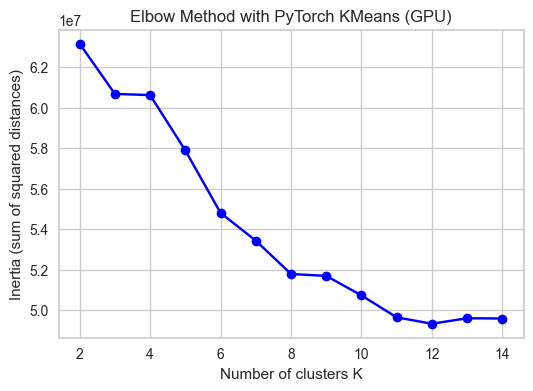

In [30]:
import torch
from kmeans_pytorch import kmeans
import matplotlib.pyplot as plt

# X_tensor should be your data tensor on GPU
# e.g., X_tensor = torch.tensor(X_scaled, dtype=torch.float32).cuda()

Ks = range(2,15)   # Try k from 2 to 10
inertias = []

for k in Ks:
    # Run KMeans on GPU
    cluster_ids, cluster_centers = kmeans(
        X=X_tensor, 
        num_clusters=k, 
        distance='euclidean', 
        device=torch.device('cuda:0')
    )
    
    # Move cluster_centers to GPU if it's on CPU
    cluster_centers = cluster_centers.to(X_tensor.device)
    
    # Compute inertia manually: sum of squared distances to cluster center
    distances = torch.norm(X_tensor - cluster_centers[cluster_ids], dim=1) ** 2
    inertia = distances.sum().item()
    inertias.append(inertia)
    print(f"k={k}, inertia={inertia:.2f}")

# Plot Elbow
plt.figure(figsize=(6,4))
plt.plot(Ks, inertias, 'o-', color='blue')
plt.xlabel("Number of clusters K")
plt.ylabel("Inertia (sum of squared distances)")
plt.title("Elbow Method with PyTorch KMeans (GPU)")
plt.show()


### Fit the model

In [31]:
# -----------------------------
# 7️⃣ Print the optimal number of clusters (from Elbow)
# -----------------------------
best_k = Ks[np.argmin(inertias)]  # Get the k with the lowest inertia
print(f"\n✅ Optimal number of clusters (Elbow): {best_k}")


✅ Optimal number of clusters (Elbow): 12


In [32]:
# -----------------------------
# 7️⃣ Run KMeans on GPU
# -----------------------------
num_clusters = 10
cluster_ids, cluster_centers = kmeans(
    X=X_tensor,
    num_clusters=num_clusters,
    distance='euclidean',
    device=torch.device('cuda:0')
)

print("Cluster IDs shape:", cluster_ids.shape)
print("Cluster centers shape:", cluster_centers.shape)

df_cluster_model['cluster'] = cluster_ids
df_cluster_model['cluster'].value_counts()



running k-means on cuda:0..


[running kmeans]: 102it [05:30,  3.24s/it, center_shift=0.000068, iteration=102, tol=0.000100]
C:\Users\arunkumara\AppData\Local\Temp\4\ipykernel_28660\3432070948.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cluster_model['cluster'] = cluster_ids


Cluster IDs shape: torch.Size([64922])
Cluster centers shape: torch.Size([10, 5263])


cluster
2    11502
6    10234
1     9889
9     7614
7     6247
5     5444
0     4710
4     4265
8     3364
3     1653
Name: count, dtype: int64

In [ ]:
"""import torch

torch.save({
    "cluster_centers": cluster_centers.cpu(),   # save to CPU (safer)
    "num_clusters": num_clusters
}, "Hum_kmeans_gpu_model.pt")

print("Model saved!")

# load the saed model
saved = torch.load("kmeans_gpu_model.pt")

cluster_centers_loaded = saved["cluster_centers"].to("cuda:0")
num_clusters_loaded = saved["num_clusters"]

print("Model loaded!")

"""

Model saved!


In [33]:
# ---------------------------------------------------------------
# 1️⃣ Keep only your required columns
# ---------------------------------------------------------------
keep_cols = [
     "Provider_ID", "LOS", "AGE","Payments", "InitialDeterminationStatus", "IDSavings",
    "ADRG","B_DRG","PRIM_DX", "B_PRIMDX_Clean","A_DX_Set","A_DX_Type","B_DX_Set",
    "B_DX_Type","DRG_Change_Status","Prim_DX_Change_Status",
      "SDX_Set_Change_Status","SDX_Type_Change_Status","cluster"

]

df_cluster_model_final = df_cluster_model[keep_cols].copy()

In [34]:
approval_counts = df_cluster_model_final.groupby(['cluster', 'InitialDeterminationStatus']).size().unstack(fill_value=0)
print(approval_counts)

InitialDeterminationStatus  Approved  Denied
cluster                                     
0                               4593     117
1                               9125     764
2                               9618    1884
3                               1529     124
4                               3692     573
5                               5141     303
6                               9909     325
7                               5768     479
8                               3001     363
9                               4530    3084


## Summary Cluster

In [109]:
pip install Counter

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for Counter: filename=counter-1.0.0-py3-none-any.whl size=5486 sha256=fa4abf9f3962e8aeae26f09dca804e724146594ddf76d170ae8a5f1ba70d3bec
  Stored in directory: c:\users\arunkumara\appdata\local\pip\cache\wheels\04\74\15\ca37c78a9593c79051a2c9a22e2a81f241fd8ff5b8c945f2bc
Successfully built Counter
Note: you may need to restart the kernel to use updated packages.


In [42]:
# ---------------------------------------------------------------
# 🔍 CLUSTER DESCRIPTION ANALYSIS (UPDATED FOR TUPLE SDx)
# ---------------------------------------------------------------
from collections import Counter

df_cluster_model["LOS"] = pd.to_numeric(df_cluster_model["LOS"], errors="coerce")
df_cluster_model["AGE"] = pd.to_numeric(df_cluster_model["AGE"], errors="coerce")
df_cluster_model["Payments"] = pd.to_numeric(df_cluster_model["Payments"], errors="coerce")
df_cluster_model["IDSavings"] = pd.to_numeric(df_cluster_model["IDSavings"], errors="coerce")


single_cat_cols = (
    "ADRG","PRIM_DX","A_DX_Type","InitialDeterminationStatus",
    "IDSavings","Provider_ID","LOS","AGE","Payments"
)

s_dx_col = "A_DX_Set"   # SDx tuple column

for i in range(10):
    cluster_data = df_cluster_model[df_cluster_model["cluster"] == i]
    total_rows = len(cluster_data)

    print(f"\n{'='*60}")
    print(f"🧩 Cluster {i} Summary  ({total_rows} rows)")
    print(f"{'='*60}")

    # -------------------------------------------------------------------
    # 🔹 1. ALL CATEGORICAL / SINGLE-VALUE COLUMNS
    # -------------------------------------------------------------------
    for col in single_cat_cols:
        if col in cluster_data.columns:
            top_vals = cluster_data[col].value_counts().head(5).to_dict()
            print(f"Top {col}: {top_vals}")
        else:
            print(f"⚠️ {col} column not found.")

    # -------------------------------------------------------------------
    # 🔹 2. SDx (A_DX_Set) — NOW USING TUPLE SUPPORT
    # -------------------------------------------------------------------
    if s_dx_col in cluster_data.columns:
        sdx_list = [
            code for sublist in cluster_data[s_dx_col]
            if isinstance(sublist, (list, tuple))     # <-- FIXED HERE
            for code in sublist
        ]
        top_sdx = dict(Counter(sdx_list).most_common(5))
        print("Top SDx Codes:", top_sdx)
    else:
        print("⚠️ A_DX_Set column not found.")

    # -------------------------------------------------------------------
    # 🔹 3. % of Total Claims
    # -------------------------------------------------------------------
    cluster_pct = round((total_rows / len(df_cluster_model)) * 100, 2)
    print("Percentage of total claims:", f"{cluster_pct}%")

    # -------------------------------------------------------------------
    # 🔹 4. Approval / Denied Breakdown
    # -------------------------------------------------------------------
    if "InitialDeterminationStatus" in cluster_data.columns:

        approved_count = (cluster_data["InitialDeterminationStatus"] == "Approved").sum()
        denied_count = (cluster_data["InitialDeterminationStatus"] == "Denied").sum()

        approved_pct = round((approved_count / total_rows) * 100, 2)
        denied_pct = round((denied_count / total_rows) * 100, 2)

        print(f"Approved Claims: {approved_count} ({approved_pct}%)")
        print(f"Denied Claims: {denied_count} ({denied_pct}%)")

    # -------------------------------------------------------------------
    # 🔹 5. Payment Stats
    # -------------------------------------------------------------------
    if "Payments" in cluster_data.columns:
        print("Avg Payment:", round(cluster_data["Payments"].mean(), 2))
        print("Min Payment:", round(cluster_data["Payments"].min(), 2))
        print("Max Payment:", round(cluster_data["Payments"].max(), 2))

    # -------------------------------------------------------------------
    # 🔹 6. Savings (Denied Only)
    # -------------------------------------------------------------------
    if "IDSavings" in cluster_data.columns:
        denied_only = cluster_data[cluster_data["InitialDeterminationStatus"] == "Denied"]

        if len(denied_only) > 0:
            print("Avg Savings (Denied Only):", round(denied_only["IDSavings"].mean(), 2))
        else:
            print("Avg Savings (Denied Only): No denied claims")

    # -------------------------------------------------------------------
    # 🔹 7. LOS & AGE Metrics
    # -------------------------------------------------------------------
    if "LOS" in cluster_data.columns:
        print("Avg LOS:", round(cluster_data["LOS"].mean(), 2))
        #print("LOS Count:", cluster_data["LOS"].count())

        """# LOS count on denied
        if len(denied_only) > 0:
            print("LOS Count (Denied Only):", denied_only["LOS"].count())
        else:
            print("LOS Count (Denied Only): 0")"""

    if "AGE" in cluster_data.columns:
        print("Avg AGE:", round(cluster_data["AGE"].mean(), 2))
        #print("AGE Count:", cluster_data["AGE"].count())

        # AGE count on denied
        """if len(denied_only) > 0:
            print("AGE Count (Denied Only):", denied_only["AGE"].count())
        else:
            print("AGE Count (Denied Only): 0")"""



🧩 Cluster 0 Summary  (4710 rows)
Top ADRG: {'377': 331, '640': 328, '193': 300, '304': 225, '308': 185}
Top PRIM_DX: {'J189': 236, 'E8770': 149, 'I161': 120, 'I214': 115, 'N390': 105}
Top A_DX_Type: {'MCC': 4693, 'CC': 15, 'No A_DX': 2}
Top InitialDeterminationStatus: {'Approved': 4593, 'Denied': 117}
Top IDSavings: {0.0: 4594, 2030.57: 1, 3644.7: 1, 11834.6: 1, 4463.41: 1}
Top Provider_ID: {'000021832C': 46, '582149128A': 43, '311340739D': 41, '000047750D': 40, '001824627A': 37}
Top LOS: {3: 670, 4: 617, 2: 604, 5: 496, 1: 356}
Top AGE: {68: 194, 67: 187, 66: 181, 69: 153, 72: 152}
Top Payments: {12026.41: 3, 10921.36: 3, 8537.79: 3, 12601.23: 3, 9910.42: 2}
Top SDx Codes: {'N186': 4695, 'G9341': 152, 'I5033': 77, 'I21A1': 74, 'J9601': 63}
Percentage of total claims: 7.25%
Approved Claims: 4593 (97.52%)
Denied Claims: 117 (2.48%)
Avg Payment: 14093.66
Min Payment: 1600.0
Max Payment: 119190.0
Avg Savings (Denied Only): 4807.74
Avg LOS: 6.08
Avg AGE: 64.26

🧩 Cluster 1 Summary  (9889 

# Predictive Model

In [36]:
approval_counts = df_cluster_model_final.groupby(['cluster', 'InitialDeterminationStatus']).size().unstack(fill_value=0)
print(approval_counts)

InitialDeterminationStatus  Approved  Denied
cluster                                     
0                               4593     117
1                               9125     764
2                               9618    1884
3                               1529     124
4                               3692     573
5                               5141     303
6                               9909     325
7                               5768     479
8                               3001     363
9                               4530    3084


In [37]:
df_cluster_model_predictive = df_cluster_model.copy()

In [40]:
df_cluster_model_predictive.to_pickle("df_hum_cluster_model_predictive.pkl")
#df = pd.read_pickle("df_hum_cluster_model_predictive.pkl")





🚀 TRAINING & EVALUATION FOR CLUSTER 0
[LightGBM] [Info] Number of positive: 3674, number of negative: 94
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.196930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153636
[LightGBM] [Info] Number of data points in the train set: 3768, number of used features: 1052
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498907 -> initscore=-0.004373
[LightGBM] [Info] Start training from score -0.004373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

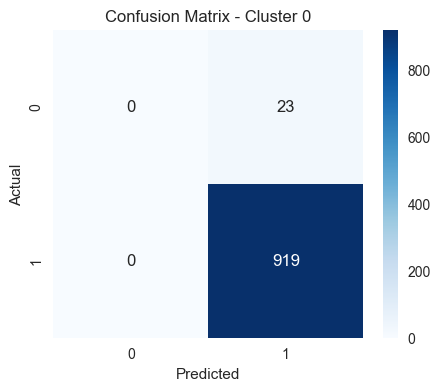



🚀 TRAINING & EVALUATION FOR CLUSTER 1
[LightGBM] [Info] Number of positive: 7300, number of negative: 611
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 258892
[LightGBM] [Info] Number of data points in the train set: 7911, number of used features: 1076
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500082 -> initscore=0.000327
[LightGBM] [Info] Start training from score 0.000327
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

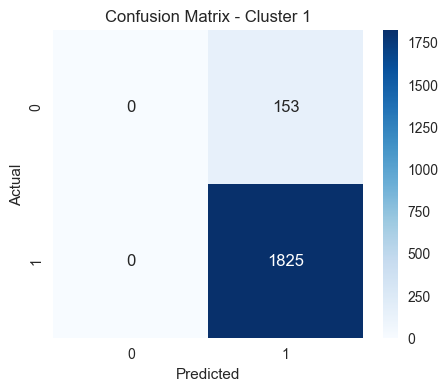



🚀 TRAINING & EVALUATION FOR CLUSTER 2
[LightGBM] [Info] Number of positive: 7694, number of negative: 1507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 246545
[LightGBM] [Info] Number of data points in the train set: 9201, number of used features: 1051
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500020 -> initscore=0.000081
[LightGBM] [Info] Start training from score 0.000081
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

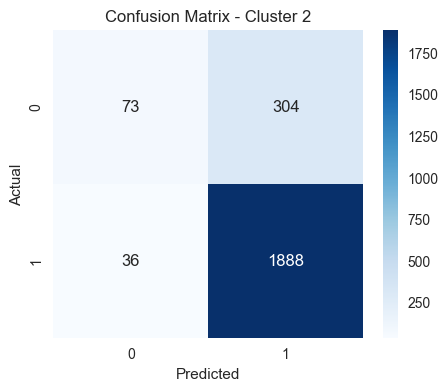



🚀 TRAINING & EVALUATION FOR CLUSTER 3
[LightGBM] [Info] Number of positive: 1223, number of negative: 99
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 143751
[LightGBM] [Info] Number of data points in the train set: 1322, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500464 -> initscore=0.001855
[LightGBM] [Info] Start training from score 0.001855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

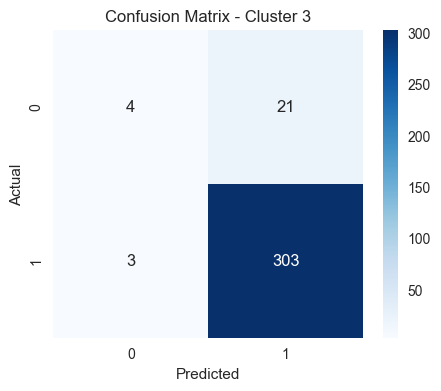



🚀 TRAINING & EVALUATION FOR CLUSTER 4


[running kmeans]: 11it [1:02:39, 341.73s/it, center_shift=1.006339, iteration=11, tol=0.000100]


[LightGBM] [Info] Number of positive: 2954, number of negative: 458
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 138338
[LightGBM] [Info] Number of data points in the train set: 3412, number of used features: 1030
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500252 -> initscore=0.001008
[LightGBM] [Info] Start training from score 0.001008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

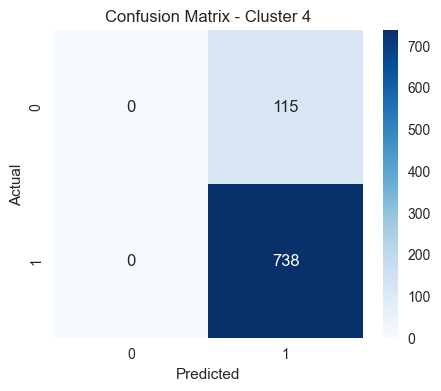



🚀 TRAINING & EVALUATION FOR CLUSTER 5
[LightGBM] [Info] Number of positive: 4113, number of negative: 242
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071679 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 219967
[LightGBM] [Info] Number of data points in the train set: 4355, number of used features: 1037
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500425 -> initscore=0.001700
[LightGBM] [Info] Start training from score 0.001700
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

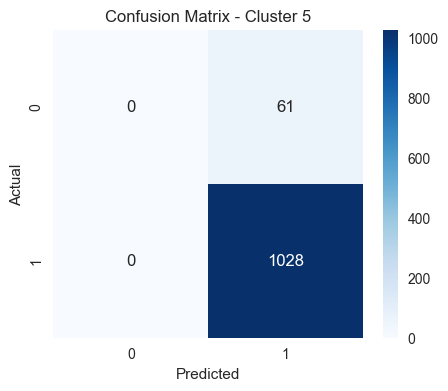



🚀 TRAINING & EVALUATION FOR CLUSTER 6
[LightGBM] [Info] Number of positive: 7927, number of negative: 260
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260919
[LightGBM] [Info] Number of data points in the train set: 8187, number of used features: 1070
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499994 -> initscore=-0.000025
[LightGBM] [Info] Start training from score -0.000025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

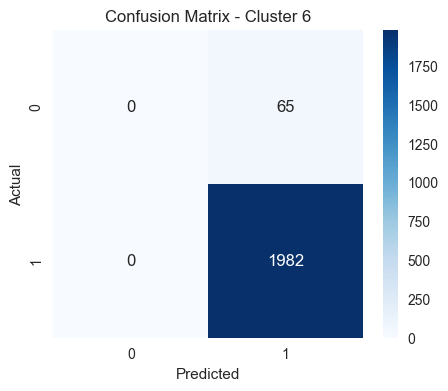



🚀 TRAINING & EVALUATION FOR CLUSTER 7
[LightGBM] [Info] Number of positive: 4614, number of negative: 383
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 258875
[LightGBM] [Info] Number of data points in the train set: 4997, number of used features: 1052
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500109 -> initscore=0.000435
[LightGBM] [Info] Start training from score 0.000435
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

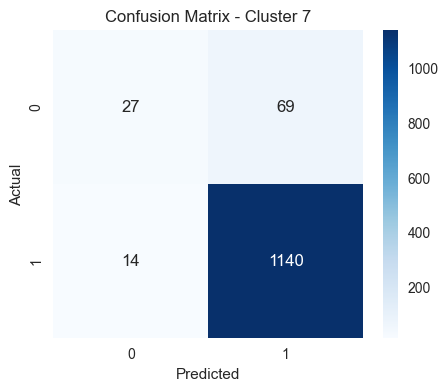



🚀 TRAINING & EVALUATION FOR CLUSTER 8
[LightGBM] [Info] Number of positive: 2401, number of negative: 290
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255241
[LightGBM] [Info] Number of data points in the train set: 2691, number of used features: 1044
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500365 -> initscore=0.001462
[LightGBM] [Info] Start training from score 0.001462
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

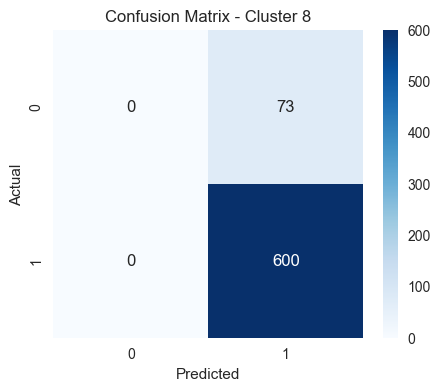



🚀 TRAINING & EVALUATION FOR CLUSTER 9
[LightGBM] [Info] Number of positive: 3624, number of negative: 2467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 145319
[LightGBM] [Info] Number of data points in the train set: 6091, number of used features: 1036
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500020 -> initscore=0.000081
[LightGBM] [Info] Start training from score 0.000081
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

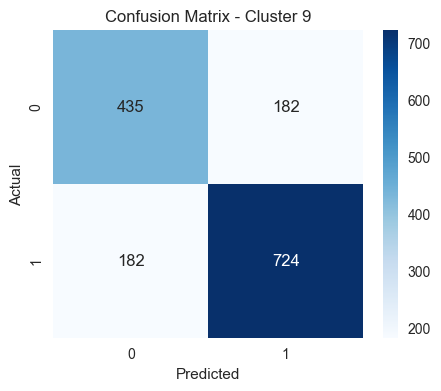



🎉 Final Predictive Shape: (64922, 1061)


In [43]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import FeatureHasher
from scipy import sparse
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from lightgbm import early_stopping



import seaborn as sns
from scipy import sparse
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve,
)
import matplotlib.pyplot as plt
from lightgbm import early_stopping
from sklearn.feature_extraction import FeatureHasher
import warnings
warnings.filterwarnings("ignore")


def fix_emb(col, dim=512):
    """Fix embedding vector dimension."""
    fixed = []
    for emb in col:
        arr = np.asarray(emb, dtype='float32')
        if arr.ndim != 1 or arr.shape[0] != dim:
            arr = np.zeros(dim, dtype='float32')
        fixed.append(arr)
    return np.vstack(fixed)


all_results = []
clusters = sorted(df_cluster_model['cluster'].unique())

for cl in clusters:
    print(f"\n\n==============================================")
    print(f"🚀 TRAINING & EVALUATION FOR CLUSTER {cl}")
    print("==============================================")

    df_ml = df_cluster_model[df_cluster_model['cluster'] == cl].copy()

    # -----------------------------
    # Target
    # -----------------------------
    df_ml["Status_binary"] = df_ml["InitialDeterminationStatus"].str.strip().str.lower().map({
        "approved": 1, "denied": 0
    })

    # -----------------------------
    # Numeric
    # -----------------------------
    num_features = ['Payments', 'AGE', 'LOS']
    df_ml[num_features] = df_ml[num_features].apply(pd.to_numeric, errors='coerce').fillna(0.0)
    X_num_dense = df_ml[num_features].astype('float32').values

    # -----------------------------
    # Categorical Hashed
    # -----------------------------
    cat_features = [
        'ADRG','Provider_ID'
    ]
    cat_rows = df_ml[cat_features].astype(str).values.tolist()
    hasher = FeatureHasher(n_features=1000, input_type="string")
    X_cat_sparse = hasher.transform(cat_rows)

    # -----------------------------
    # Embeddings
    # -----------------------------
    X_aprim = fix_emb(df_ml['A_PRIM_DX_emb'])
    #X_bprim = fix_emb(df_ml['B_PRIM_DX_emb'])
    X_asdx  = fix_emb(df_ml['A_DX_agg_emb'])
    #X_bsdx  = fix_emb(df_ml['B_DX_agg_emb'])

    X_dense = np.hstack([X_num_dense, X_aprim, X_asdx])
    X_dense_sparse = sparse.csr_matrix(X_dense)

    X_full = sparse.hstack([X_dense_sparse, X_cat_sparse]).tocsr()

    # -----------------------------
    # Class weight
    # -----------------------------
    class_counts = df_ml['Status_binary'].value_counts()
    cw = {0:1, 1:(class_counts[0]/class_counts[1]) }
    df_ml['final_weight'] = df_ml['Status_binary'].map(cw)

    # -----------------------------
    # Split
    # -----------------------------
    X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
        X_full,
        df_ml['Status_binary'],
        df_ml['final_weight'],
        test_size=0.2,
        random_state=42,
        stratify=df_ml['Status_binary']
    )

    train_idx = y_train.index
    test_idx  = y_test.index

    # -----------------------------
    # LightGBM Training
    # -----------------------------
    params = {
        "objective":"binary",
        "boosting_type":"gbdt",
        "metric":"auc",
        "learning_rate":0.02,
        "num_leaves":28,
        "max_depth":4,
        "colsample_bytree":0.8,
        "subsample":0.8,
        "reg_alpha":2,
        "reg_lambda":5,
        "min_child_samples":50,
        "random_state":42
    }

    train_data = lgb.Dataset(X_train, label=y_train, weight=w_train)
    valid_data = lgb.Dataset(X_test,  label=y_test,  weight=w_test)

    model = lgb.train(
        params,
        train_data,
        valid_sets=[train_data, valid_data],
        num_boost_round=500,
        callbacks=[early_stopping(30)]
    )

    # -----------------------------
    # Predict Probability
    # -----------------------------
    y_prob = model.predict(X_test)

    # -----------------------------
    # Best Threshold (F1)
    # -----------------------------
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

    best_thr = thresholds[np.argmax(f1_scores)]
    best_f1 = np.max(f1_scores)

    print(f"\n🔹 Best Threshold = {best_thr:.4f}")
    print(f"🔹 Best F1 Score  = {best_f1:.4f}")

    # -----------------------------
    # Final Predictions
    # -----------------------------
    y_pred = (y_prob >= best_thr).astype(int)

    # -----------------------------
    # Full Metrics
    # -----------------------------
    auc = roc_auc_score(y_test, y_prob)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)

    print("\n--- PERFORMANCE (OPTIMIZED THRESHOLD) ---")
    print(f"AUC:       {auc:.4f}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred))

    # -----------------------------
    # CONFUSION MATRIX
    # -----------------------------
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - Cluster {cl}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # -----------------------------
    # Save Predictions back to df
    # -----------------------------
    df_ml["Prob_Approved"] = np.nan
    df_ml["Pred_Label"]    = np.nan

    df_ml.loc[train_idx, "Prob_Approved"] = model.predict(X_train)
    df_ml.loc[test_idx,  "Prob_Approved"] = y_prob

    df_ml.loc[train_idx, "Pred_Label"] = (model.predict(X_train) >= best_thr).astype(int)
    df_ml.loc[test_idx,  "Pred_Label"] = y_pred

    df_ml["Confidence_%"] = df_ml["Prob_Approved"] * 100

    all_results.append(df_ml)

# ---------------------------------------
# MERGE ALL CLUSTERS FINAL OUTPUT
# ---------------------------------------
df_cluster_model_final_predictive = pd.concat(all_results).sort_index()
print("\n\n🎉 Final Predictive Shape:", df_cluster_model_final_predictive.shape)



In [54]:
keep_cols = [
    "Client","Payments","Provider_ID","HospitalName","LOS",
    "ADRG","AGE","PRIM_DX","A_DX_Set","A_DX_Type","InitialDeterminationStatus","IDSavings",
    "AdjustedSavings",
    "cluster",
    "Pred_Label","Confidence_%"
]
df_cluster_Predictive_Confidence = df_cluster_model_final_predictive[keep_cols]
#df_cluster_Predictive_Confidence["Prob_Approved"] = df_cluster_Predictive_Confidence["Prob_Approved"].round(2)
df_cluster_Predictive_Confidence["Confidence_%"] = df_cluster_Predictive_Confidence["Confidence_%"].round(2)

df_cluster_Predictive_Confidence.head(10)


,Client,Payments,Provider_ID,HospitalName,LOS,ADRG,AGE,PRIM_DX,A_DX_Set,A_DX_Type,InitialDeterminationStatus,IDSavings,AdjustedSavings,cluster,Pred_Label,Confidence_%
1719,Hum,4277.47,593458145N,TAMPA GENERAL HOSPITAL,6,8613,60,G893,"(A419,)",MCC,Approved,0.0,0,6,1.0,48.05
1720,Hum,9642.73,592616017M,UNIV OF MIAMI HOSP AND CLINICS,8,6953,40,Z5111,"(D61810,)",MCC,Approved,0.0,0,6,1.0,51.88
1721,Hum,7815.43,000045770H,NOVANT HEALTH PRESBYTERIAN MED,9,189,76,J9601,"(E1110, I2609, I5023, J9602)",MCC,Approved,0.0,0,2,1.0,66.84
1722,Hum,15539.61,001825011C,SPARTANBURG REGIONAL MEDICAL C,16,539,63,M4626,"(G061, K6812)",MCC,Approved,0.0,0,7,1.0,93.61
1723,Hum,9020.75,381428164,MCLAREN OAKLAND,7,682,79,I120,"(N186,)",MCC,Approved,0.0,0,0,1.0,50.37
1724,Hum,14704.33,853777599B,NOVANT NEW HANOVER REGIONAL ME,17,064,69,I6340,"(E43, G9341)",MCC,Approved,0.0,0,8,1.0,47.00
1725,Hum,10356.88,853777599B,NOVANT NEW HANOVER REGIONAL ME,14,391,79,K5720,"(E43, J9621, J9622, K651)",MCC,Approved,0.0,0,6,1.0,50.62
1726,Hum,9074.53,636000271A,DCH REGIONAL MEDICAL CENTER,19,193,62,J159,"(I5023, J9601)",MCC,Approved,0.0,0,2,1.0,88.47
20232,Hum,5242.35,000021832C,DEACONESS HOSPITAL INC,5,871,53,A4151,"(K659, L89154, N186, R6521)",MCC,Approved,0.0,0,9,1.0,86.06
20233,Hum,8203.35,000198601,CHANDLER REGIONAL MEDICAL,5,375,69,C161,"(B380, E222)",CC,Approved,0.0,0,6,1.0,50.07




🚀 TRAINING & EVALUATION FOR CLUSTER 0
[LightGBM] [Info] Number of positive: 3674, number of negative: 94
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.094132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 153636
[LightGBM] [Info] Number of data points in the train set: 3768, number of used features: 1052
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498907 -> initscore=-0.004373
[LightGBM] [Info] Start training from score -0.004373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

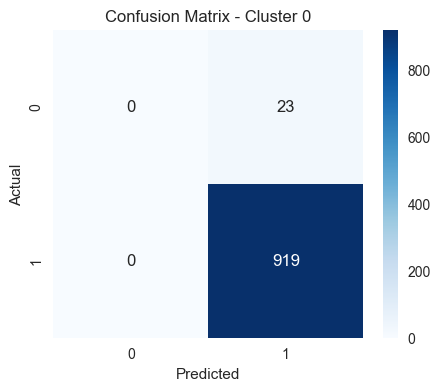



🚀 TRAINING & EVALUATION FOR CLUSTER 1
[LightGBM] [Info] Number of positive: 7300, number of negative: 611
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.119773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 258892
[LightGBM] [Info] Number of data points in the train set: 7911, number of used features: 1076
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500082 -> initscore=0.000327
[LightGBM] [Info] Start training from score 0.000327
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

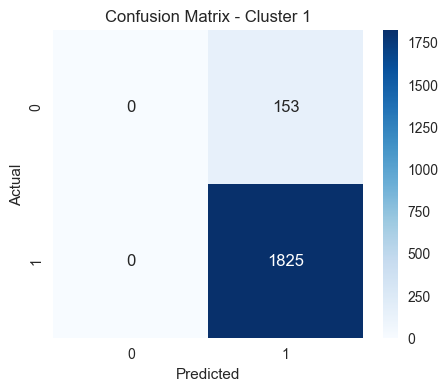



🚀 TRAINING & EVALUATION FOR CLUSTER 2
[LightGBM] [Info] Number of positive: 7694, number of negative: 1507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.230481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 246545
[LightGBM] [Info] Number of data points in the train set: 9201, number of used features: 1051
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500020 -> initscore=0.000081
[LightGBM] [Info] Start training from score 0.000081
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

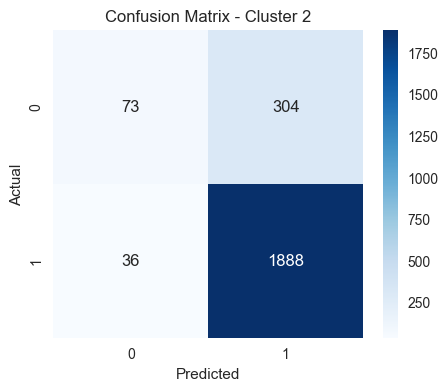



🚀 TRAINING & EVALUATION FOR CLUSTER 3
[LightGBM] [Info] Number of positive: 1223, number of negative: 99
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 143751
[LightGBM] [Info] Number of data points in the train set: 1322, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500464 -> initscore=0.001855
[LightGBM] [Info] Start training from score 0.001855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

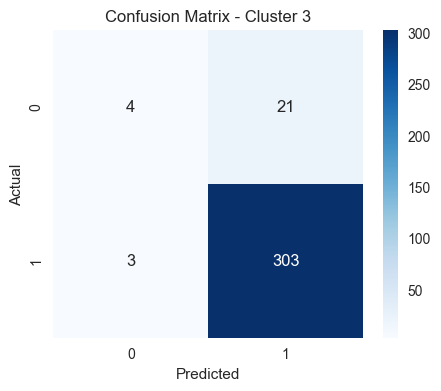



🚀 TRAINING & EVALUATION FOR CLUSTER 4
[LightGBM] [Info] Number of positive: 2954, number of negative: 458
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 138338
[LightGBM] [Info] Number of data points in the train set: 3412, number of used features: 1030
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500252 -> initscore=0.001008
[LightGBM] [Info] Start training from score 0.001008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

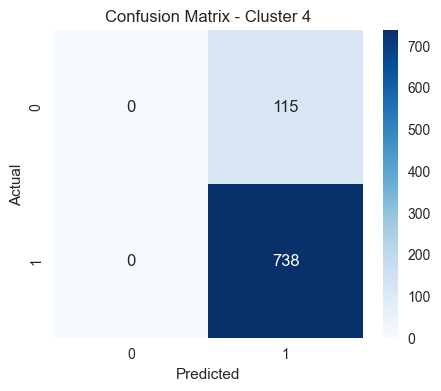



🚀 TRAINING & EVALUATION FOR CLUSTER 5
[LightGBM] [Info] Number of positive: 4113, number of negative: 242
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 219967
[LightGBM] [Info] Number of data points in the train set: 4355, number of used features: 1037
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500425 -> initscore=0.001700
[LightGBM] [Info] Start training from score 0.001700
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

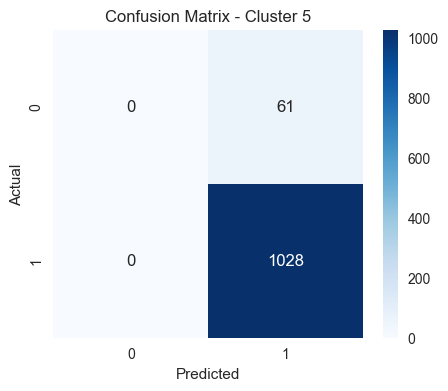



🚀 TRAINING & EVALUATION FOR CLUSTER 6
[LightGBM] [Info] Number of positive: 7927, number of negative: 260
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.121411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260919
[LightGBM] [Info] Number of data points in the train set: 8187, number of used features: 1070
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499994 -> initscore=-0.000025
[LightGBM] [Info] Start training from score -0.000025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

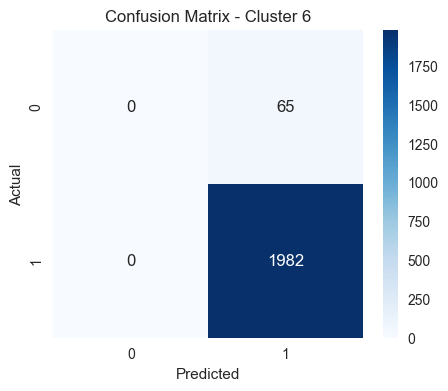



🚀 TRAINING & EVALUATION FOR CLUSTER 7
[LightGBM] [Info] Number of positive: 4614, number of negative: 383
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 258875
[LightGBM] [Info] Number of data points in the train set: 4997, number of used features: 1052
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500109 -> initscore=0.000435
[LightGBM] [Info] Start training from score 0.000435
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

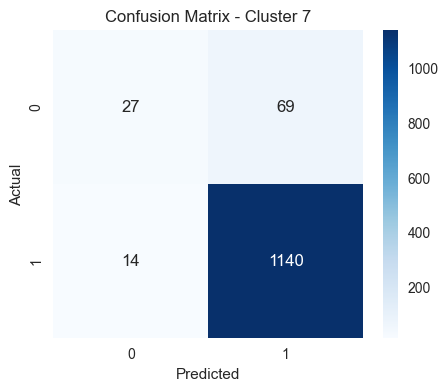



🚀 TRAINING & EVALUATION FOR CLUSTER 8
[LightGBM] [Info] Number of positive: 2401, number of negative: 290
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255241
[LightGBM] [Info] Number of data points in the train set: 2691, number of used features: 1044
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500365 -> initscore=0.001462
[LightGBM] [Info] Start training from score 0.001462
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

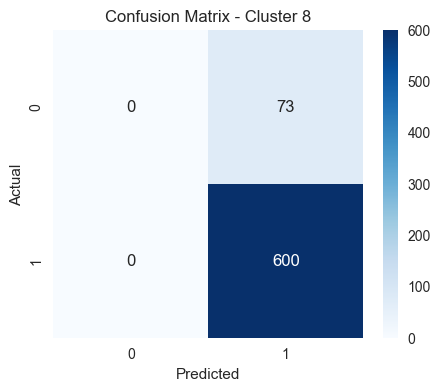



🚀 TRAINING & EVALUATION FOR CLUSTER 9
[LightGBM] [Info] Number of positive: 3624, number of negative: 2467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 145319
[LightGBM] [Info] Number of data points in the train set: 6091, number of used features: 1036
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500020 -> initscore=0.000081
[LightGBM] [Info] Start training from score 0.000081
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

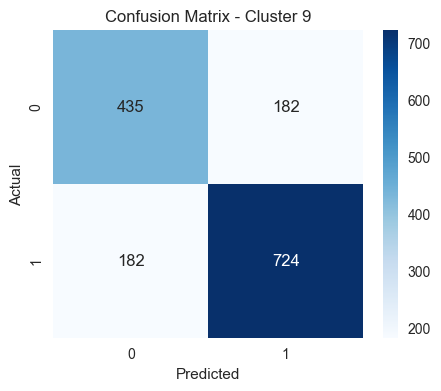



🎉 Final Predictive Shape: (64922, 1061)


📌 Cluster Summary Table:
   Cluster  Total_Rows  Approved_Count  Denied_Count  Approved_%   Denied_%  \
0        0        4710            4593           117   97.515924   2.484076   
1        1        9889            9125           764   92.274244   7.725756   
2        2       11502            9618          1884   83.620240  16.379760   
3        3        1653            1529           124   92.498488   7.501512   
4        4        4265            3692           573   86.565064  13.434936   
5        5        5444            5141           303   94.434240   5.565760   
6        6       10234            9909           325   96.824311   3.175689   
7        7        6247            5768           479   92.332320   7.667680   
8        8        3364            3001           363   89.209275  10.790725   
9        9        7614            4530          3084   59.495666  40.504334   

   Train_Rows  Test_Rows  Train_Accuracy  Test_Accuracy  Prec

In [55]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import FeatureHasher
from scipy import sparse
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_recall_curve, roc_auc_score, accuracy_score,
    precision_score, recall_score, f1_score, confusion_matrix,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import early_stopping
import warnings
warnings.filterwarnings("ignore")


def fix_emb(col, dim=512):
    """Fix embedding vector dimension."""
    fixed = []
    for emb in col:
        arr = np.asarray(emb, dtype='float32')
        if arr.ndim != 1 or arr.shape[0] != dim:
            arr = np.zeros(dim, dtype='float32')
        fixed.append(arr)
    return np.vstack(fixed)


all_results = []
all_cluster_summary = []   # ⭐ summary list

clusters = sorted(df_cluster_model['cluster'].unique())

for cl in clusters:
    print(f"\n\n==============================================")
    print(f"🚀 TRAINING & EVALUATION FOR CLUSTER {cl}")
    print("==============================================")

    df_ml = df_cluster_model[df_cluster_model['cluster'] == cl].copy()

    # -----------------------------
    # Target
    # -----------------------------
    df_ml["Status_binary"] = df_ml["InitialDeterminationStatus"].str.strip().str.lower().map({
        "approved": 1, "denied": 0
    })

    # -----------------------------
    # Numeric
    # -----------------------------
    num_features = ['Payments', 'AGE', 'LOS']
    df_ml[num_features] = df_ml[num_features].apply(pd.to_numeric, errors='coerce').fillna(0.0)
    X_num_dense = df_ml[num_features].astype('float32').values

    # -----------------------------
    # Categorical Hashed
    # -----------------------------
    cat_features = ['ADRG', 'Provider_ID']
    cat_rows = df_ml[cat_features].astype(str).values.tolist()
    hasher = FeatureHasher(n_features=1000, input_type="string")
    X_cat_sparse = hasher.transform(cat_rows)

    # -----------------------------
    # Embeddings
    # -----------------------------
    X_aprim = fix_emb(df_ml['A_PRIM_DX_emb'])
    X_asdx  = fix_emb(df_ml['A_DX_agg_emb'])

    X_dense = np.hstack([X_num_dense, X_aprim, X_asdx])
    X_dense_sparse = sparse.csr_matrix(X_dense)

    X_full = sparse.hstack([X_dense_sparse, X_cat_sparse]).tocsr()

    # -----------------------------
    # Class weight
    # -----------------------------
    class_counts = df_ml['Status_binary'].value_counts()
    cw = {0:1, 1:(class_counts[0]/class_counts[1]) }
    df_ml['final_weight'] = df_ml['Status_binary'].map(cw)

    # -----------------------------
    # Split
    # -----------------------------
    X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
        X_full,
        df_ml['Status_binary'],
        df_ml['final_weight'],
        test_size=0.2,
        random_state=42,
        stratify=df_ml['Status_binary']
    )

    train_idx = y_train.index
    test_idx  = y_test.index

    # -----------------------------
    # LightGBM Training
    # -----------------------------
    params = {
        "objective":"binary",
        "boosting_type":"gbdt",
        "metric":"auc",
        "learning_rate":0.02,
        "num_leaves":28,
        "max_depth":4,
        "colsample_bytree":0.8,
        "subsample":0.8,
        "reg_alpha":2,
        "reg_lambda":5,
        "min_child_samples":50,
        "random_state":42
    }

    train_data = lgb.Dataset(X_train, label=y_train, weight=w_train)
    valid_data = lgb.Dataset(X_test,  label=y_test,  weight=w_test)

    model = lgb.train(
        params,
        train_data,
        valid_sets=[train_data, valid_data],
        num_boost_round=500,
        callbacks=[early_stopping(30)]
    )

    # -----------------------------
    # Predict Probability
    # -----------------------------
    y_prob = model.predict(X_test)

    # -----------------------------
    # Best Threshold (F1)
    # -----------------------------
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

    best_thr = thresholds[np.argmax(f1_scores)]
    best_f1 = np.max(f1_scores)

    print(f"\n🔹 Best Threshold = {best_thr:.4f}")
    print(f"🔹 Best F1 Score  = {best_f1:.4f}")

    # -----------------------------
    # Final Predictions
    # -----------------------------
    y_pred = (y_prob >= best_thr).astype(int)

    # -----------------------------
    # Final Metrics
    # -----------------------------
    auc = roc_auc_score(y_test, y_prob)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)

    print("\n--- PERFORMANCE (OPTIMIZED THRESHOLD) ---")
    print(f"AUC:       {auc:.4f}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred))

    # -----------------------------
    # Confusion Matrix Plot
    # -----------------------------
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - Cluster {cl}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # -----------------------------
    # Save Back Predictions
    # -----------------------------
    df_ml["Prob_Approved"] = np.nan
    df_ml["Pred_Label"]    = np.nan

    df_ml.loc[train_idx, "Prob_Approved"] = model.predict(X_train)
    df_ml.loc[test_idx,  "Prob_Approved"] = y_prob

    df_ml.loc[train_idx, "Pred_Label"] = (model.predict(X_train) >= best_thr).astype(int)
    df_ml.loc[test_idx,  "Pred_Label"] = y_pred

    df_ml["Confidence_%"] = df_ml["Prob_Approved"] * 100

    # ===========================================================
    # ⭐ CLUSTER SUMMARY STATISTICS
    # ===========================================================
    total_rows = len(df_ml)
    approved_count = df_ml['Status_binary'].sum()
    denied_count = total_rows - approved_count

    approved_pct = (approved_count / total_rows) * 100
    denied_pct = (denied_count / total_rows) * 100

    train_count = len(train_idx)
    test_count = len(test_idx)

    # Train accuracy
    y_train_prob = model.predict(X_train)
    y_train_pred = (y_train_prob >= best_thr).astype(int)
    train_acc = accuracy_score(y_train, y_train_pred)

    # Summary row
    cluster_summary = {
        "Cluster": cl,
        "Total_Rows": total_rows,
        "Approved_Count": approved_count,
        "Denied_Count": denied_count,
        "Approved_%": approved_pct,
        "Denied_%": denied_pct,
        "Train_Rows": train_count,
        "Test_Rows": test_count,
        "Train_Accuracy": train_acc,
        "Test_Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1_Score": f1,
        "AUC": auc
    }

    all_cluster_summary.append(cluster_summary)

    # Save ML output
    all_results.append(df_ml)


# ---------------------------------------
# MERGE ALL CLUSTERS FINAL OUTPUT
# ---------------------------------------
df_cluster_model_final_predictive = pd.concat(all_results).sort_index()
print("\n\n🎉 Final Predictive Shape:", df_cluster_model_final_predictive.shape)

# ---------------------------------------
# FINAL SUMMARY TABLE
# ---------------------------------------
df_cluster_summary = pd.DataFrame(all_cluster_summary)
print("\n\n📌 Cluster Summary Table:")
print(df_cluster_summary)


In [57]:
df_cluster_summary.head(10)

,Cluster,Total_Rows,Approved_Count,Denied_Count,Approved_%,Denied_%,Train_Rows,Test_Rows,Train_Accuracy,Test_Accuracy,Precision,Recall,F1_Score,AUC
0,0,4710,4593,117,97.515924,2.484076,3768,942,0.975053,0.975584,0.975584,1.000000,0.987641,0.748522
1,1,9889,9125,764,92.274244,7.725756,7911,1978,0.922766,0.922649,0.922649,1.000000,0.959769,0.844829
2,2,11502,9618,1884,83.620240,16.379760,9201,2301,0.866754,0.852238,0.861314,0.981289,0.917396,0.784987
3,3,1653,1529,124,92.498488,7.501512,1322,331,0.925113,0.927492,0.935185,0.990196,0.961905,0.726993
4,4,4265,3692,573,86.565064,13.434936,3412,853,0.866061,0.865182,0.865182,1.000000,0.927718,0.589219
5,5,5444,5141,303,94.434240,5.565760,4355,1089,0.944432,0.943985,0.943985,1.000000,0.971186,0.721200
6,6,10234,9909,325,96.824311,3.175689,8187,2047,0.968242,0.968246,0.968246,1.000000,0.983867,0.607832
7,7,6247,5768,479,92.332320,7.667680,4997,1250,0.942566,0.933600,0.942928,0.987868,0.964875,0.862968
8,8,3364,3001,363,89.209275,10.790725,2691,673,0.892233,0.891530,0.891530,1.000000,0.942655,0.725833
9,9,7614,4530,3084,59.495666,40.504334,6091,1523,0.812018,0.760998,0.799117,0.799117,0.799117,0.821902


In [153]:
df_cluster_Predictive_Confidence.to_pickle("df_hum_cluster_model_predictive_Confidence.pkl")
#df = pd.read_pickle("df_hum_cluster_model_predictive_Confidence.pkl")



# Others

### Clsuter = 0

In [137]:
df_cluster_model_predictive_0 = df_cluster_model_predictive[df_cluster_model_predictive['cluster']==0].copy()
df_cluster_model_predictive_0.shape

(5656, 2083)

In [138]:
from sklearn.feature_extraction import FeatureHasher

df_ml = df_cluster_model_predictive_0.copy()

df_ml["Status_binary"] = df_ml["InitialDeterminationStatus"].str.strip().str.lower().map({
    "approved": 1,
    "denied": 0
})
# ---------------------------------------------------
# 1. Numeric (dense)
# ---------------------------------------------------
num_features = ['Payments', 'AGE', 'LOS']
df_ml[num_features] = df_ml[num_features].apply(pd.to_numeric, errors='coerce').fillna(0.0)
X_num_dense = df_ml[num_features].astype('float32').values

# ---------------------------------------------------
# 2. Categorical (sparse hashing)
# ---------------------------------------------------
cat_features = ['ADRG',  'Provider_ID',"B_DRG",
    "Prim_DX_Change_Status", "SDX_Type_Change_Status",
    "DRG_Change_Status", "SDX_Set_Change_Status" ]

cat_rows = df_ml[cat_features].astype(str).values.tolist()

hasher = FeatureHasher(n_features=1000, input_type="string")
X_cat_sparse = hasher.transform(cat_rows)  # sparse

# ---------------------------------------------------
# 3. Embeddings (dense)
# ---------------------------------------------------
def fix_emb(col, dim=512):
    fixed = []
    for emb in col:
        arr = np.asarray(emb, dtype='float32')
        if arr.ndim != 1 or arr.shape[0] != dim:
            arr = np.zeros(dim, dtype='float32')
        fixed.append(arr)
    return np.vstack(fixed)

X_aprim_dense = fix_emb(df_ml['A_PRIM_DX_emb'])
X_bprim_dense = fix_emb(df_ml['B_PRIM_DX_emb'])
X_asdx_dense  = fix_emb(df_ml['A_DX_agg_emb'])
X_bsdx_dense  = fix_emb(df_ml['B_DX_agg_emb'])

# Dense block
X_dense = np.hstack([X_num_dense, X_aprim_dense,X_bprim_dense, X_asdx_dense,X_bsdx_dense])

print("Sparse:", X_cat_sparse.shape)
print("Dense :", X_dense.shape)


Sparse: (5656, 1000)
Dense : (5656, 2051)


In [ ]:
from scipy import sparse
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve,
)
import matplotlib.pyplot as plt
from lightgbm import early_stopping
from sklearn.feature_extraction import FeatureHasher


# ---------------------------------------------------------
# 1. CLASS WEIGHT (to fix 70-30 imbalance)
# ---------------------------------------------------------
class_counts = df_ml['Status_binary'].value_counts()

class_weight = {
    0: 1.8,
    1: (class_counts[0] / class_counts[1]) - 0.08
}

df_ml['sample_weight'] = df_ml['Status_binary'].map(class_weight)

print("Class Weights:", class_weight)


# ---------------------------------------------------------
# 2. COMBINE BOTH WEIGHTS  (BEST METHOD)
# ---------------------------------------------------------
df_ml['final_weight'] = df_ml['sample_weight']

# -----------------------------
# 0. Combine features
# -----------------------------
X_dense_sparse = sparse.csr_matrix(X_dense)
X_full = sparse.hstack([X_dense_sparse, X_cat_sparse]).tocsr()

print("Full feature shape:", X_full.shape)

# ---------------------------------------------------------
# 3. TRAIN-TEST SPLIT  (use final_weight)
# ---------------------------------------------------------
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X_full,
    df_ml['Status_binary'],
    df_ml['final_weight'],         # combined weight
    test_size=0.2,
    random_state=42,
    stratify=df_ml['Status_binary']
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


# ---------------------------------------------------------
# 4. LIGHTGBM DATASETS
# ---------------------------------------------------------
train_data = lgb.Dataset(
    X_train,
    label=y_train,
    weight=w_train,
    free_raw_data=False
)

valid_data = lgb.Dataset(
    X_test,
    label=y_test,
    weight=w_test,
    free_raw_data=False
)

Class Weights: {0: 1.8, 1: np.float64(0.057112987535182944)}
Full feature shape: (5656, 3051)
Train size: (4524, 3051)
Test size: (1132, 3051)


In [140]:
params = {
    "objective": "binary",
    "boosting_type":"gbdt",
    "metric": "auc",
    "learning_rate": 0.02,
    "num_leaves": 28,
    "max_depth": 4,
    "colsample_bytree":0.8,
    "subsample":0.8,
    "reg_alpha":2,          # L1 regularization
    "reg_lambda":5,         # L2 regularization
    "min_child_samples":50, # Prevents small leaf overfit
    "random_state":42
  
}

model = lgb.train(
    params=params,
    train_set=train_data,
    valid_sets=[train_data, valid_data],
    valid_names=['train', 'valid'],
    num_boost_round=500,
    callbacks=[early_stopping(stopping_rounds=30)]

)


[LightGBM] [Info] Number of positive: 3978, number of negative: 546
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.477220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 436615
[LightGBM] [Info] Number of data points in the train set: 4524, number of used features: 2071
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.187766 -> initscore=-1.464595
[LightGBM] [Info] Start training from score -1.464595
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light


🔹 Best Threshold: 0.1316
🔹 Best F1-score: 0.9935

--- MODEL PERFORMANCE (Optimized Threshold) ---
AUC:       0.9948
Accuracy:  0.9885
Precision: 0.9970
Recall:    0.9900
F1 Score:  0.9935

--- Classification Report (Optimized Threshold) ---
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       136
           1       1.00      0.99      0.99       996

    accuracy                           0.99      1132
   macro avg       0.96      0.98      0.97      1132
weighted avg       0.99      0.99      0.99      1132



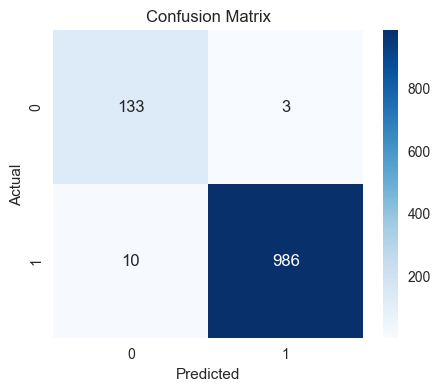

In [ ]:
import seaborn as sns
from scipy import sparse
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve,
)
import matplotlib.pyplot as plt
from lightgbm import early_stopping
from sklearn.feature_extraction import FeatureHasher
# ---------------------------------------------------------
# 7. PREDICTIONS (probabilities only)
# ---------------------------------------------------------
y_prob = model.predict(X_test)


# ---------------------------------------------------------
# 8. FIND BEST THRESHOLD (based on F1-score)
# ---------------------------------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_thr = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print("\n🔹 Best Threshold:", round(best_thr, 4))
print("🔹 Best F1-score:", round(best_f1, 4))


# ---------------------------------------------------------
# 9. FINAL PREDICTIONS USING BEST THRESHOLD
# ---------------------------------------------------------
y_pred = (y_prob >= best_thr).astype(int)


# ---------------------------------------------------------
# 10. METRICS (using optimized threshold)
# ---------------------------------------------------------
auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- MODEL PERFORMANCE (Optimized Threshold) ---")
print(f"AUC:       {auc:.4f}")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# ---------------------------------------------------------
# 13. CLASSIFICATION REPORT
# ---------------------------------------------------------
print("\n--- Classification Report (Optimized Threshold) ---")
print(classification_report(y_test, y_pred))

# ---------------------------------------------------------
# 11. CONFUSION MATRIX 
# ---------------------------------------------------------

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Map Confidence Score 

### Clsuter = 1

In [132]:
df_cluster_model_predictive_1 = df_cluster_model_predictive[df_cluster_model_predictive['cluster']==1].copy()
df_cluster_model_predictive_1.shape

(5283, 2083)

In [133]:
from sklearn.feature_extraction import FeatureHasher

df_ml = df_cluster_model_predictive_1.copy()

df_ml["Status_binary"] = df_ml["InitialDeterminationStatus"].str.strip().str.lower().map({
    "approved": 1,
    "denied": 0
})
# ---------------------------------------------------
# 1. Numeric (dense)
# ---------------------------------------------------
num_features = ['Payments', 'AGE', 'LOS']
df_ml[num_features] = df_ml[num_features].apply(pd.to_numeric, errors='coerce').fillna(0.0)
X_num_dense = df_ml[num_features].astype('float32').values

# ---------------------------------------------------
# 2. Categorical (sparse hashing)
# ---------------------------------------------------
cat_features = ['ADRG',  'Provider_ID',"B_DRG",
    "Prim_DX_Change_Status", "SDX_Type_Change_Status",
    "DRG_Change_Status", "SDX_Set_Change_Status" ]

cat_rows = df_ml[cat_features].astype(str).values.tolist()

hasher = FeatureHasher(n_features=1000, input_type="string")
X_cat_sparse = hasher.transform(cat_rows)  # sparse

# ---------------------------------------------------
# 3. Embeddings (dense)
# ---------------------------------------------------
def fix_emb(col, dim=512):
    fixed = []
    for emb in col:
        arr = np.asarray(emb, dtype='float32')
        if arr.ndim != 1 or arr.shape[0] != dim:
            arr = np.zeros(dim, dtype='float32')
        fixed.append(arr)
    return np.vstack(fixed)

X_aprim_dense = fix_emb(df_ml['A_PRIM_DX_emb'])
X_bprim_dense = fix_emb(df_ml['B_PRIM_DX_emb'])
X_asdx_dense  = fix_emb(df_ml['A_DX_agg_emb'])
X_bsdx_dense  = fix_emb(df_ml['B_DX_agg_emb'])

# Dense block
X_dense = np.hstack([X_num_dense, X_aprim_dense,X_bprim_dense, X_asdx_dense,X_bsdx_dense])

print("Sparse:", X_cat_sparse.shape)
print("Dense :", X_dense.shape)


Sparse: (5283, 1000)
Dense : (5283, 2051)


In [134]:
from scipy import sparse
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve,
)
import matplotlib.pyplot as plt
from lightgbm import early_stopping


# ---------------------------------------------------------
# 1. CLASS WEIGHT (to fix 70-30 imbalance)
# ---------------------------------------------------------
class_counts = df_ml['Status_binary'].value_counts()

class_weight = {
    0: 1.8,
    1: (class_counts[0] / class_counts[1]) - 0.08
}

df_ml['sample_weight'] = df_ml['Status_binary'].map(class_weight)

print("Class Weights:", class_weight)


# ---------------------------------------------------------
# 2. COMBINE BOTH WEIGHTS  (BEST METHOD)
# ---------------------------------------------------------
df_ml['final_weight'] = df_ml['sample_weight']

# -----------------------------
# 0. Combine features
# -----------------------------
X_dense_sparse = sparse.csr_matrix(X_dense)
X_full = sparse.hstack([X_dense_sparse, X_cat_sparse]).tocsr()

print("Full feature shape:", X_full.shape)

# ---------------------------------------------------------
# 3. TRAIN-TEST SPLIT  (use final_weight)
# ---------------------------------------------------------
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X_full,
    df_ml['Status_binary'],
    df_ml['final_weight'],         # combined weight
    test_size=0.2,
    random_state=42,
    stratify=df_ml['Status_binary']
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


# ---------------------------------------------------------
# 4. LIGHTGBM DATASETS
# ---------------------------------------------------------
train_data = lgb.Dataset(
    X_train,
    label=y_train,
    weight=w_train,
    free_raw_data=False
)

valid_data = lgb.Dataset(
    X_test,
    label=y_test,
    weight=w_test,
    free_raw_data=False
)

Class Weights: {0: 1.8, 1: np.float64(0.042370936902485654)}
Full feature shape: (5283, 3051)
Train size: (4226, 3051)
Test size: (1057, 3051)


In [135]:
params = {
    "objective": "binary",
    "boosting_type":"gbdt",
    "metric": "auc",
    "learning_rate": 0.02,
    "num_leaves": 28,
    "max_depth": 4,
    "colsample_bytree":0.8,
    "subsample":0.8,
    "reg_alpha":2,          # L1 regularization
    "reg_lambda":5,         # L2 regularization
    "min_child_samples":50, # Prevents small leaf overfit
    "random_state":42
  
}

model = lgb.train(
    params=params,
    train_set=train_data,
    valid_sets=[train_data, valid_data],
    valid_names=['train', 'valid'],
    num_boost_round=500,
    callbacks=[early_stopping(stopping_rounds=30)]

)


[LightGBM] [Info] Number of positive: 3765, number of negative: 461
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.827120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 404960
[LightGBM] [Info] Number of data points in the train set: 4226, number of used features: 2074
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161248 -> initscore=-1.648974
[LightGBM] [Info] Start training from score -1.648974
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 


🔹 Best Threshold: 0.4729
🔹 Best F1-score: 0.9931

--- MODEL PERFORMANCE (Optimized Threshold) ---
AUC:       0.9946
Accuracy:  0.9877
Precision: 1.0000
Recall:    0.9862
F1 Score:  0.9931

--- Classification Report (Optimized Threshold) ---
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       115
           1       1.00      0.99      0.99       942

    accuracy                           0.99      1057
   macro avg       0.95      0.99      0.97      1057
weighted avg       0.99      0.99      0.99      1057



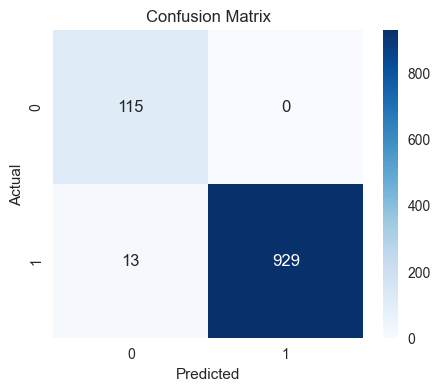

In [136]:
import seaborn as sns
# ---------------------------------------------------------
# 7. PREDICTIONS (probabilities only)
# ---------------------------------------------------------
y_prob = model.predict(X_test)


# ---------------------------------------------------------
# 8. FIND BEST THRESHOLD (based on F1-score)
# ---------------------------------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_thr = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print("\n🔹 Best Threshold:", round(best_thr, 4))
print("🔹 Best F1-score:", round(best_f1, 4))


# ---------------------------------------------------------
# 9. FINAL PREDICTIONS USING BEST THRESHOLD
# ---------------------------------------------------------
y_pred = (y_prob >= best_thr).astype(int)


# ---------------------------------------------------------
# 10. METRICS (using optimized threshold)
# ---------------------------------------------------------
auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- MODEL PERFORMANCE (Optimized Threshold) ---")
print(f"AUC:       {auc:.4f}")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# ---------------------------------------------------------
# 13. CLASSIFICATION REPORT
# ---------------------------------------------------------
print("\n--- Classification Report (Optimized Threshold) ---")
print(classification_report(y_test, y_pred))

# ---------------------------------------------------------
# 11. CONFUSION MATRIX 
# ---------------------------------------------------------

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Clsuter = 2

In [124]:
df_cluster_model_predictive_2 = df_cluster_model_predictive[df_cluster_model_predictive['cluster']==2].copy()
df_cluster_model_predictive_2.shape

(6859, 2083)

In [119]:
from sklearn.feature_extraction import FeatureHasher

df_ml = df_cluster_model_predictive_2.copy()

df_ml["Status_binary"] = df_ml["InitialDeterminationStatus"].str.strip().str.lower().map({
    "approved": 1,
    "denied": 0
})
# ---------------------------------------------------
# 1. Numeric (dense)
# ---------------------------------------------------
num_features = ['Payments', 'AGE', 'LOS']
df_ml[num_features] = df_ml[num_features].apply(pd.to_numeric, errors='coerce').fillna(0.0)
X_num_dense = df_ml[num_features].astype('float32').values

# ---------------------------------------------------
# 2. Categorical (sparse hashing)
# ---------------------------------------------------
cat_features = ['ADRG',  'Provider_ID',"B_DRG",
    "Prim_DX_Change_Status", "SDX_Type_Change_Status",
    "DRG_Change_Status", "SDX_Set_Change_Status" ]

cat_rows = df_ml[cat_features].astype(str).values.tolist()

hasher = FeatureHasher(n_features=1000, input_type="string")
X_cat_sparse = hasher.transform(cat_rows)  # sparse

# ---------------------------------------------------
# 3. Embeddings (dense)
# ---------------------------------------------------
def fix_emb(col, dim=512):
    fixed = []
    for emb in col:
        arr = np.asarray(emb, dtype='float32')
        if arr.ndim != 1 or arr.shape[0] != dim:
            arr = np.zeros(dim, dtype='float32')
        fixed.append(arr)
    return np.vstack(fixed)

X_aprim_dense = fix_emb(df_ml['A_PRIM_DX_emb'])
X_bprim_dense = fix_emb(df_ml['B_PRIM_DX_emb'])
X_asdx_dense  = fix_emb(df_ml['A_DX_agg_emb'])
X_bsdx_dense  = fix_emb(df_ml['B_DX_agg_emb'])

# Dense block
X_dense = np.hstack([X_num_dense, X_aprim_dense,X_bprim_dense, X_asdx_dense,X_bsdx_dense])

print("Sparse:", X_cat_sparse.shape)
print("Dense :", X_dense.shape)


Sparse: (6859, 1000)
Dense : (6859, 2051)


In [120]:
from scipy import sparse
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve,
)
import matplotlib.pyplot as plt
from lightgbm import early_stopping


# ---------------------------------------------------------
# 1. CLASS WEIGHT (to fix 70-30 imbalance)
# ---------------------------------------------------------
class_counts = df_ml['Status_binary'].value_counts()

class_weight = {
    0: 1.8,
    1: (class_counts[0] / class_counts[1]) - 0.08
}

df_ml['sample_weight'] = df_ml['Status_binary'].map(class_weight)

print("Class Weights:", class_weight)


# ---------------------------------------------------------
# 2. COMBINE BOTH WEIGHTS  (BEST METHOD)
# ---------------------------------------------------------
df_ml['final_weight'] = df_ml['sample_weight']

# -----------------------------
# 0. Combine features
# -----------------------------
X_dense_sparse = sparse.csr_matrix(X_dense)
X_full = sparse.hstack([X_dense_sparse, X_cat_sparse]).tocsr()

print("Full feature shape:", X_full.shape)

# ---------------------------------------------------------
# 3. TRAIN-TEST SPLIT  (use final_weight)
# ---------------------------------------------------------
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X_full,
    df_ml['Status_binary'],
    df_ml['final_weight'],         # combined weight
    test_size=0.2,
    random_state=42,
    stratify=df_ml['Status_binary']
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


# ---------------------------------------------------------
# 4. LIGHTGBM DATASETS
# ---------------------------------------------------------
train_data = lgb.Dataset(
    X_train,
    label=y_train,
    weight=w_train,
    free_raw_data=False
)

valid_data = lgb.Dataset(
    X_test,
    label=y_test,
    weight=w_test,
    free_raw_data=False
)

Class Weights: {0: 1.8, 1: np.float64(0.4438835814263497)}
Full feature shape: (6859, 3051)
Train size: (5487, 3051)
Test size: (1372, 3051)


In [121]:
params = {
    "objective": "binary",
    "boosting_type":"gbdt",
    "metric": "auc",
    "learning_rate": 0.02,
    "num_leaves": 28,
    "max_depth": 4,
    "colsample_bytree":0.8,
    "subsample":0.8,
    "reg_alpha":2,          # L1 regularization
    "reg_lambda":5,         # L2 regularization
    "min_child_samples":50, # Prevents small leaf overfit
    "random_state":42
  
}

model = lgb.train(
    params=params,
    train_set=train_data,
    valid_sets=[train_data, valid_data],
    valid_names=['train', 'valid'],
    num_boost_round=500,
    callbacks=[early_stopping(stopping_rounds=30)]

)


[LightGBM] [Info] Number of positive: 3601, number of negative: 1886
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.099950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 295515
[LightGBM] [Info] Number of data points in the train set: 5487, number of used features: 1560
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.320119 -> initscore=-0.753226
[LightGBM] [Info] Start training from score -0.753226
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:


🔹 Best Threshold: 0.3807
🔹 Best F1-score: 0.9927

--- MODEL PERFORMANCE (Optimized Threshold) ---
AUC:       0.9943
Accuracy:  0.9905
Precision: 0.9989
Recall:    0.9867
F1 Score:  0.9927

--- Classification Report (Optimized Threshold) ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       472
           1       1.00      0.99      0.99       900

    accuracy                           0.99      1372
   macro avg       0.99      0.99      0.99      1372
weighted avg       0.99      0.99      0.99      1372



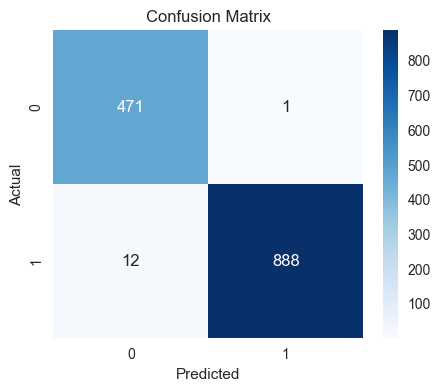

In [122]:
import seaborn as sns
# ---------------------------------------------------------
# 7. PREDICTIONS (probabilities only)
# ---------------------------------------------------------
y_prob = model.predict(X_test)


# ---------------------------------------------------------
# 8. FIND BEST THRESHOLD (based on F1-score)
# ---------------------------------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_thr = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print("\n🔹 Best Threshold:", round(best_thr, 4))
print("🔹 Best F1-score:", round(best_f1, 4))


# ---------------------------------------------------------
# 9. FINAL PREDICTIONS USING BEST THRESHOLD
# ---------------------------------------------------------
y_pred = (y_prob >= best_thr).astype(int)


# ---------------------------------------------------------
# 10. METRICS (using optimized threshold)
# ---------------------------------------------------------
auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- MODEL PERFORMANCE (Optimized Threshold) ---")
print(f"AUC:       {auc:.4f}")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# ---------------------------------------------------------
# 13. CLASSIFICATION REPORT
# ---------------------------------------------------------
print("\n--- Classification Report (Optimized Threshold) ---")
print(classification_report(y_test, y_pred))

# ---------------------------------------------------------
# 11. CONFUSION MATRIX 
# ---------------------------------------------------------

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Clsuter = 3

In [ ]:
df_cluster_model_predictive_3 = df_cluster_model_predictive[df_cluster_model_predictive['cluster']==3].copy()
df_cluster_model_predictive_0.shape

(5656, 2083)

In [ ]:
from sklearn.feature_extraction import FeatureHasher

df_ml = df_cluster_model_predictive_0.copy()

df_ml["Status_binary"] = df_ml["InitialDeterminationStatus"].str.strip().str.lower().map({
    "approved": 1,
    "denied": 0
})
# ---------------------------------------------------
# 1. Numeric (dense)
# ---------------------------------------------------
num_features = ['Payments', 'AGE', 'LOS']
df_ml[num_features] = df_ml[num_features].apply(pd.to_numeric, errors='coerce').fillna(0.0)
X_num_dense = df_ml[num_features].astype('float32').values

# ---------------------------------------------------
# 2. Categorical (sparse hashing)
# ---------------------------------------------------
cat_features = ['ADRG',  'Provider_ID',"B_DRG",
    "Prim_DX_Change_Status", "SDX_Type_Change_Status",
    "DRG_Change_Status", "SDX_Set_Change_Status" ]

cat_rows = df_ml[cat_features].astype(str).values.tolist()

hasher = FeatureHasher(n_features=1000, input_type="string")
X_cat_sparse = hasher.transform(cat_rows)  # sparse

# ---------------------------------------------------
# 3. Embeddings (dense)
# ---------------------------------------------------
def fix_emb(col, dim=512):
    fixed = []
    for emb in col:
        arr = np.asarray(emb, dtype='float32')
        if arr.ndim != 1 or arr.shape[0] != dim:
            arr = np.zeros(dim, dtype='float32')
        fixed.append(arr)
    return np.vstack(fixed)

X_aprim_dense = fix_emb(df_ml['A_PRIM_DX_emb'])
X_bprim_dense = fix_emb(df_ml['B_PRIM_DX_emb'])
X_asdx_dense  = fix_emb(df_ml['A_DX_agg_emb'])
X_bsdx_dense  = fix_emb(df_ml['B_DX_agg_emb'])

# Dense block
X_dense = np.hstack([X_num_dense, X_aprim_dense,X_bprim_dense, X_asdx_dense,X_bsdx_dense])

print("Sparse:", X_cat_sparse.shape)
print("Dense :", X_dense.shape)


Sparse: (5656, 1000)
Dense : (5656, 2051)


In [ ]:
from scipy import sparse
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve,
)
import matplotlib.pyplot as plt
from lightgbm import early_stopping


# ---------------------------------------------------------
# 1. CLASS WEIGHT (to fix 70-30 imbalance)
# ---------------------------------------------------------
class_counts = df_ml['Status_binary'].value_counts()

class_weight = {
    0: 1.8,
    1: (class_counts[0] / class_counts[1]) - 0.08
}

df_ml['sample_weight'] = df_ml['Status_binary'].map(class_weight)

print("Class Weights:", class_weight)


# ---------------------------------------------------------
# 2. COMBINE BOTH WEIGHTS  (BEST METHOD)
# ---------------------------------------------------------
df_ml['final_weight'] = df_ml['sample_weight']

# -----------------------------
# 0. Combine features
# -----------------------------
X_dense_sparse = sparse.csr_matrix(X_dense)
X_full = sparse.hstack([X_dense_sparse, X_cat_sparse]).tocsr()

print("Full feature shape:", X_full.shape)

# ---------------------------------------------------------
# 3. TRAIN-TEST SPLIT  (use final_weight)
# ---------------------------------------------------------
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X_full,
    df_ml['Status_binary'],
    df_ml['final_weight'],         # combined weight
    test_size=0.2,
    random_state=42,
    stratify=df_ml['Status_binary']
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


# ---------------------------------------------------------
# 4. LIGHTGBM DATASETS
# ---------------------------------------------------------
train_data = lgb.Dataset(
    X_train,
    label=y_train,
    weight=w_train,
    free_raw_data=False
)

valid_data = lgb.Dataset(
    X_test,
    label=y_test,
    weight=w_test,
    free_raw_data=False
)

Class Weights: {0: 1.8, 1: np.float64(0.057112987535182944)}
Full feature shape: (5656, 3051)
Train size: (4524, 3051)
Test size: (1132, 3051)


In [ ]:
params = {
    "objective": "binary",
    "boosting_type":"gbdt",
    "metric": "auc",
    "learning_rate": 0.02,
    "num_leaves": 28,
    "max_depth": 4,
    "colsample_bytree":0.8,
    "subsample":0.8,
    "reg_alpha":2,          # L1 regularization
    "reg_lambda":5,         # L2 regularization
    "min_child_samples":50, # Prevents small leaf overfit
    "random_state":42
  
}

model = lgb.train(
    params=params,
    train_set=train_data,
    valid_sets=[train_data, valid_data],
    valid_names=['train', 'valid'],
    num_boost_round=500,
    callbacks=[early_stopping(stopping_rounds=30)]

)


[LightGBM] [Info] Number of positive: 3978, number of negative: 546
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.729452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 436615
[LightGBM] [Info] Number of data points in the train set: 4524, number of used features: 2071
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.187766 -> initscore=-1.464595
[LightGBM] [Info] Start training from score -1.464595
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 


🔹 Best Threshold: 0.1316
🔹 Best F1-score: 0.9935

--- MODEL PERFORMANCE (Optimized Threshold) ---
AUC:       0.9948
Accuracy:  0.9885
Precision: 0.9970
Recall:    0.9900
F1 Score:  0.9935

--- Classification Report (Optimized Threshold) ---
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       136
           1       1.00      0.99      0.99       996

    accuracy                           0.99      1132
   macro avg       0.96      0.98      0.97      1132
weighted avg       0.99      0.99      0.99      1132



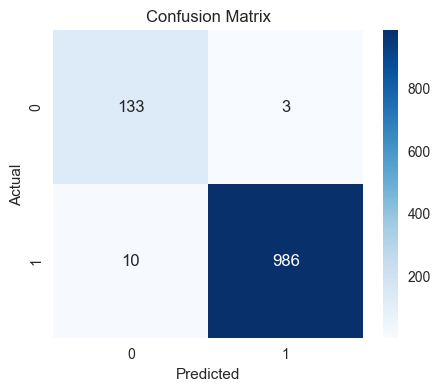

In [ ]:
import seaborn as sns
# ---------------------------------------------------------
# 7. PREDICTIONS (probabilities only)
# ---------------------------------------------------------
y_prob = model.predict(X_test)


# ---------------------------------------------------------
# 8. FIND BEST THRESHOLD (based on F1-score)
# ---------------------------------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_thr = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print("\n🔹 Best Threshold:", round(best_thr, 4))
print("🔹 Best F1-score:", round(best_f1, 4))


# ---------------------------------------------------------
# 9. FINAL PREDICTIONS USING BEST THRESHOLD
# ---------------------------------------------------------
y_pred = (y_prob >= best_thr).astype(int)


# ---------------------------------------------------------
# 10. METRICS (using optimized threshold)
# ---------------------------------------------------------
auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- MODEL PERFORMANCE (Optimized Threshold) ---")
print(f"AUC:       {auc:.4f}")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# ---------------------------------------------------------
# 13. CLASSIFICATION REPORT
# ---------------------------------------------------------
print("\n--- Classification Report (Optimized Threshold) ---")
print(classification_report(y_test, y_pred))

# ---------------------------------------------------------
# 11. CONFUSION MATRIX 
# ---------------------------------------------------------

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Clsuter = 0

In [ ]:
df_cluster_model_predictive_0 = df_cluster_model_predictive[df_cluster_model_predictive['cluster']==0].copy()
df_cluster_model_predictive_0.shape

(5656, 2083)

In [ ]:
from sklearn.feature_extraction import FeatureHasher

df_ml = df_cluster_model_predictive_0.copy()

df_ml["Status_binary"] = df_ml["InitialDeterminationStatus"].str.strip().str.lower().map({
    "approved": 1,
    "denied": 0
})
# ---------------------------------------------------
# 1. Numeric (dense)
# ---------------------------------------------------
num_features = ['Payments', 'AGE', 'LOS']
df_ml[num_features] = df_ml[num_features].apply(pd.to_numeric, errors='coerce').fillna(0.0)
X_num_dense = df_ml[num_features].astype('float32').values

# ---------------------------------------------------
# 2. Categorical (sparse hashing)
# ---------------------------------------------------
cat_features = ['ADRG',  'Provider_ID',"B_DRG",
    "Prim_DX_Change_Status", "SDX_Type_Change_Status",
    "DRG_Change_Status", "SDX_Set_Change_Status" ]

cat_rows = df_ml[cat_features].astype(str).values.tolist()

hasher = FeatureHasher(n_features=1000, input_type="string")
X_cat_sparse = hasher.transform(cat_rows)  # sparse

# ---------------------------------------------------
# 3. Embeddings (dense)
# ---------------------------------------------------
def fix_emb(col, dim=512):
    fixed = []
    for emb in col:
        arr = np.asarray(emb, dtype='float32')
        if arr.ndim != 1 or arr.shape[0] != dim:
            arr = np.zeros(dim, dtype='float32')
        fixed.append(arr)
    return np.vstack(fixed)

X_aprim_dense = fix_emb(df_ml['A_PRIM_DX_emb'])
X_bprim_dense = fix_emb(df_ml['B_PRIM_DX_emb'])
X_asdx_dense  = fix_emb(df_ml['A_DX_agg_emb'])
X_bsdx_dense  = fix_emb(df_ml['B_DX_agg_emb'])

# Dense block
X_dense = np.hstack([X_num_dense, X_aprim_dense,X_bprim_dense, X_asdx_dense,X_bsdx_dense])

print("Sparse:", X_cat_sparse.shape)
print("Dense :", X_dense.shape)


Sparse: (5656, 1000)
Dense : (5656, 2051)


In [ ]:
from scipy import sparse
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve,
)
import matplotlib.pyplot as plt
from lightgbm import early_stopping


# ---------------------------------------------------------
# 1. CLASS WEIGHT (to fix 70-30 imbalance)
# ---------------------------------------------------------
class_counts = df_ml['Status_binary'].value_counts()

class_weight = {
    0: 1.8,
    1: (class_counts[0] / class_counts[1]) - 0.08
}

df_ml['sample_weight'] = df_ml['Status_binary'].map(class_weight)

print("Class Weights:", class_weight)


# ---------------------------------------------------------
# 2. COMBINE BOTH WEIGHTS  (BEST METHOD)
# ---------------------------------------------------------
df_ml['final_weight'] = df_ml['sample_weight']

# -----------------------------
# 0. Combine features
# -----------------------------
X_dense_sparse = sparse.csr_matrix(X_dense)
X_full = sparse.hstack([X_dense_sparse, X_cat_sparse]).tocsr()

print("Full feature shape:", X_full.shape)

# ---------------------------------------------------------
# 3. TRAIN-TEST SPLIT  (use final_weight)
# ---------------------------------------------------------
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X_full,
    df_ml['Status_binary'],
    df_ml['final_weight'],         # combined weight
    test_size=0.2,
    random_state=42,
    stratify=df_ml['Status_binary']
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


# ---------------------------------------------------------
# 4. LIGHTGBM DATASETS
# ---------------------------------------------------------
train_data = lgb.Dataset(
    X_train,
    label=y_train,
    weight=w_train,
    free_raw_data=False
)

valid_data = lgb.Dataset(
    X_test,
    label=y_test,
    weight=w_test,
    free_raw_data=False
)

Class Weights: {0: 1.8, 1: np.float64(0.057112987535182944)}
Full feature shape: (5656, 3051)
Train size: (4524, 3051)
Test size: (1132, 3051)


In [ ]:
params = {
    "objective": "binary",
    "boosting_type":"gbdt",
    "metric": "auc",
    "learning_rate": 0.02,
    "num_leaves": 28,
    "max_depth": 4,
    "colsample_bytree":0.8,
    "subsample":0.8,
    "reg_alpha":2,          # L1 regularization
    "reg_lambda":5,         # L2 regularization
    "min_child_samples":50, # Prevents small leaf overfit
    "random_state":42
  
}

model = lgb.train(
    params=params,
    train_set=train_data,
    valid_sets=[train_data, valid_data],
    valid_names=['train', 'valid'],
    num_boost_round=500,
    callbacks=[early_stopping(stopping_rounds=30)]

)


[LightGBM] [Info] Number of positive: 3978, number of negative: 546
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.729452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 436615
[LightGBM] [Info] Number of data points in the train set: 4524, number of used features: 2071
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.187766 -> initscore=-1.464595
[LightGBM] [Info] Start training from score -1.464595
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 


🔹 Best Threshold: 0.1316
🔹 Best F1-score: 0.9935

--- MODEL PERFORMANCE (Optimized Threshold) ---
AUC:       0.9948
Accuracy:  0.9885
Precision: 0.9970
Recall:    0.9900
F1 Score:  0.9935

--- Classification Report (Optimized Threshold) ---
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       136
           1       1.00      0.99      0.99       996

    accuracy                           0.99      1132
   macro avg       0.96      0.98      0.97      1132
weighted avg       0.99      0.99      0.99      1132



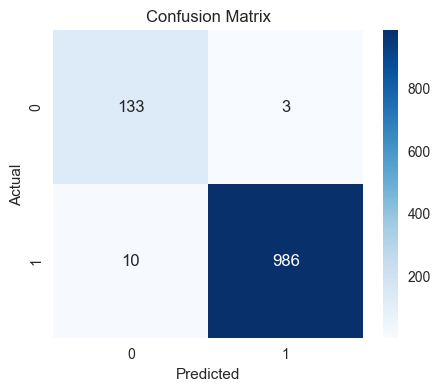

In [ ]:
import seaborn as sns
# ---------------------------------------------------------
# 7. PREDICTIONS (probabilities only)
# ---------------------------------------------------------
y_prob = model.predict(X_test)


# ---------------------------------------------------------
# 8. FIND BEST THRESHOLD (based on F1-score)
# ---------------------------------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_thr = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print("\n🔹 Best Threshold:", round(best_thr, 4))
print("🔹 Best F1-score:", round(best_f1, 4))


# ---------------------------------------------------------
# 9. FINAL PREDICTIONS USING BEST THRESHOLD
# ---------------------------------------------------------
y_pred = (y_prob >= best_thr).astype(int)


# ---------------------------------------------------------
# 10. METRICS (using optimized threshold)
# ---------------------------------------------------------
auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- MODEL PERFORMANCE (Optimized Threshold) ---")
print(f"AUC:       {auc:.4f}")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# ---------------------------------------------------------
# 13. CLASSIFICATION REPORT
# ---------------------------------------------------------
print("\n--- Classification Report (Optimized Threshold) ---")
print(classification_report(y_test, y_pred))

# ---------------------------------------------------------
# 11. CONFUSION MATRIX 
# ---------------------------------------------------------

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
### Clsuter = 0
df_cluster_model_predictive_0 = df_cluster_model_predictive[df_cluster_model_predictive['cluster']==0].copy()
df_cluster_model_predictive_0.shape
from sklearn.feature_extraction import FeatureHasher

df_ml = df_cluster_model_predictive_0.copy()

df_ml["Status_binary"] = df_ml["InitialDeterminationStatus"].str.strip().str.lower().map({
    "approved": 1,
    "denied": 0
})
# ---------------------------------------------------
# 1. Numeric (dense)
# ---------------------------------------------------
num_features = ['Payments', 'AGE', 'LOS']
df_ml[num_features] = df_ml[num_features].apply(pd.to_numeric, errors='coerce').fillna(0.0)
X_num_dense = df_ml[num_features].astype('float32').values

# ---------------------------------------------------
# 2. Categorical (sparse hashing)
# ---------------------------------------------------
cat_features = ['ADRG',  'Provider_ID',"B_DRG",
    "Prim_DX_Change_Status", "SDX_Type_Change_Status",
    "DRG_Change_Status", "SDX_Set_Change_Status" ]

cat_rows = df_ml[cat_features].astype(str).values.tolist()

hasher = FeatureHasher(n_features=1000, input_type="string")
X_cat_sparse = hasher.transform(cat_rows)  # sparse

# ---------------------------------------------------
# 3. Embeddings (dense)
# ---------------------------------------------------
def fix_emb(col, dim=512):
    fixed = []
    for emb in col:
        arr = np.asarray(emb, dtype='float32')
        if arr.ndim != 1 or arr.shape[0] != dim:
            arr = np.zeros(dim, dtype='float32')
        fixed.append(arr)
    return np.vstack(fixed)

X_aprim_dense = fix_emb(df_ml['A_PRIM_DX_emb'])
X_bprim_dense = fix_emb(df_ml['B_PRIM_DX_emb'])
X_asdx_dense  = fix_emb(df_ml['A_DX_agg_emb'])
X_bsdx_dense  = fix_emb(df_ml['B_DX_agg_emb'])

# Dense block
X_dense = np.hstack([X_num_dense, X_aprim_dense,X_bprim_dense, X_asdx_dense,X_bsdx_dense])

print("Sparse:", X_cat_sparse.shape)
print("Dense :", X_dense.shape)

from scipy import sparse
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve,
)
import matplotlib.pyplot as plt
from lightgbm import early_stopping


# ---------------------------------------------------------
# 1. CLASS WEIGHT (to fix 70-30 imbalance)
# ---------------------------------------------------------
class_counts = df_ml['Status_binary'].value_counts()

class_weight = {
    0: 1.8,
    1: (class_counts[0] / class_counts[1]) - 0.08
}

df_ml['sample_weight'] = df_ml['Status_binary'].map(class_weight)

print("Class Weights:", class_weight)


# ---------------------------------------------------------
# 2. COMBINE BOTH WEIGHTS  (BEST METHOD)
# ---------------------------------------------------------
df_ml['final_weight'] = df_ml['sample_weight']

# -----------------------------
# 0. Combine features
# -----------------------------
X_dense_sparse = sparse.csr_matrix(X_dense)
X_full = sparse.hstack([X_dense_sparse, X_cat_sparse]).tocsr()

print("Full feature shape:", X_full.shape)

# ---------------------------------------------------------
# 3. TRAIN-TEST SPLIT  (use final_weight)
# ---------------------------------------------------------
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X_full,
    df_ml['Status_binary'],
    df_ml['final_weight'],         # combined weight
    test_size=0.2,
    random_state=42,
    stratify=df_ml['Status_binary']
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


# ---------------------------------------------------------
# 4. LIGHTGBM DATASETS
# ---------------------------------------------------------
train_data = lgb.Dataset(
    X_train,
    label=y_train,
    weight=w_train,
    free_raw_data=False
)

valid_data = lgb.Dataset(
    X_test,
    label=y_test,
    weight=w_test,
    free_raw_data=False
)
params = {
    "objective": "binary",
    "boosting_type":"gbdt",
    "metric": "auc",
    "learning_rate": 0.02,
    "num_leaves": 28,
    "max_depth": 4,
    "colsample_bytree":0.8,
    "subsample":0.8,
    "reg_alpha":2,          # L1 regularization
    "reg_lambda":5,         # L2 regularization
    "min_child_samples":50, # Prevents small leaf overfit
    "random_state":42
  
}

model = lgb.train(
    params=params,
    train_set=train_data,
    valid_sets=[train_data, valid_data],
    valid_names=['train', 'valid'],
    num_boost_round=500,
    callbacks=[early_stopping(stopping_rounds=30)]

)

import seaborn as sns
# ---------------------------------------------------------
# 7. PREDICTIONS (probabilities only)
# ---------------------------------------------------------
y_prob = model.predict(X_test)


# ---------------------------------------------------------
# 8. FIND BEST THRESHOLD (based on F1-score)
# ---------------------------------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_thr = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print("\n🔹 Best Threshold:", round(best_thr, 4))
print("🔹 Best F1-score:", round(best_f1, 4))


# ---------------------------------------------------------
# 9. FINAL PREDICTIONS USING BEST THRESHOLD
# ---------------------------------------------------------
y_pred = (y_prob >= best_thr).astype(int)


# ---------------------------------------------------------
# 10. METRICS (using optimized threshold)
# ---------------------------------------------------------
auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- MODEL PERFORMANCE (Optimized Threshold) ---")
print(f"AUC:       {auc:.4f}")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# ---------------------------------------------------------
# 13. CLASSIFICATION REPORT
# ---------------------------------------------------------
print("\n--- Classification Report (Optimized Threshold) ---")
print(classification_report(y_test, y_pred))

# ---------------------------------------------------------
# 11. CONFUSION MATRIX 
# ---------------------------------------------------------

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()